In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scvi
import torch
from scipy import stats
from adjustText import adjust_text  # pip install adjustText


In [2]:
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [3]:
adata = sc.read('annotated.h5ad')
adata.obs

samples condition location  n_genes  n_genes_by_counts  \
711_AAACCCAAGTCGGGAT-1     711     Tumor    Right      707                707   
711_AAACCCACAGAGGAAA-1     711     Tumor    Right      838                838   
711_AAACCCACATGATAGA-1     711     Tumor    Right      435                435   
711_AAACCCAGTCTCGCGA-1     711     Tumor    Right      579                579   
711_AAACGAAGTTATCTTC-1     711     Tumor    Right     1384               1384   
...                        ...       ...      ...      ...                ...   
706_TTTGGTTCAAACACCT-1     706     Tumor     Left     1815               1815   
706_TTTGGTTCAACGGGTA-1     706     Tumor     Left      909                909   
706_TTTGGTTTCTATCGCC-1     706     Tumor     Left     4658               4658   
706_TTTGTTGCATCAGCGC-1     706     Tumor     Left      374                374   
706_TTTGTTGGTTCCTTGC-1     706     Tumor     Left     1875               1875   

                        log1p_n_genes_by_counts  total_counts  \
711_AAACCCAAGTCGGGAT-1                 6.562444        1396.0   
711_AAACCCACAGAGGAAA-1                 6.732211        1504.0   
711_AAACCCACATGATAGA-1                 6.077642         613.0   
711_AAACCCAGTCTCGCGA-1                 6.363028         860.0   
711_AAACGAAGTTATCTTC-1                 7.233455        2629.0   
...                                         ...           ...   
706_TTTGGTTCAAACACCT-1                 7.504392        4944.0   
706_TTTGGTTCAACGGGTA-1                 6.813445        3528.0   
706_TTTGGTTTCTATCGCC-1                 8.446556       23600.0   
706_TTTGTTGCATCAGCGC-1                 5.926926         686.0   
706_TTTGTTGGTTCCTTGC-1                 7.536897        4189.0   

                        log1p_total_counts  pct_counts_in_top_20_genes  \
711_AAACCCAAGTCGGGAT-1            7.242083                   26.862464   
711_AAACCCACAGAGGAAA-1            7.316548                   23.803191   
711_AAACCCACATGATAGA-1            6.419995                   17.781403   
711_AAACCCAGTCTCGCGA-1            6.758094                   23.255814   
711_AAACGAAGTTATCTTC-1            7.874739                   19.246862   
...                                    ...                         ...   
706_TTTGGTTCAAACACCT-1            8.506132                   21.318770   
706_TTTGGTTCAACGGGTA-1            8.168770                   34.722222   
706_TTTGGTTTCTATCGCC-1           10.069044                   17.559322   
706_TTTGTTGCATCAGCGC-1            6.532334                   23.032070   
706_TTTGTTGGTTCCTTGC-1            8.340456                   22.177131   

                        pct_counts_mt  pct_counts_ribo  pct_counts_hb  \
711_AAACCCAAGTCGGGAT-1      10.100286        25.716331       0.000000   
711_AAACCCACAGAGGAAA-1       9.441490        13.962767       0.000000   
711_AAACCCACATGATAGA-1       0.815661        18.270800       0.000000   
711_AAACCCAGTCTCGCGA-1      15.465117         6.395349       0.000000   
711_AAACGAAGTTATCTTC-1       8.178015        15.405098       0.000000   
...                               ...              ...            ...   
706_TTTGGTTCAAACACCT-1       1.961974        21.318771       0.020227   
706_TTTGGTTCAACGGGTA-1       0.368481        25.368483       0.000000   
706_TTTGGTTTCTATCGCC-1       3.237288        18.135593       0.004237   
706_TTTGTTGCATCAGCGC-1      10.932944        33.236153       0.000000   
706_TTTGTTGGTTCCTTGC-1       6.182860        12.628312       0.000000   

                                        low_label  low_score  _scvi_batch  \
711_AAACCCAAGTCGGGAT-1  T follicular helper cells   0.103311            0   
711_AAACCCACAGAGGAAA-1                    Unknown   0.236022            0   
711_AAACCCACATGATAGA-1                    Unknown   0.400460            0   
711_AAACCCAGTCTCGCGA-1               Tip-like ECs   0.966648            0   
711_AAACGAAGTTATCTTC-1        gamma delta T cells   0.993837            0   
...                                      

In [4]:
    
    print("\nCell type distribution:")
    print(adata.obs['Cell_Type'].value_counts())
    
    print("\nSample distribution:")
    print(adata.obs['location'].value_counts())  # 'left' or 'right'
    
    print("\nTumor vs Normal distribution:")
    print(adata.obs['condition'].value_counts())  # 'tumor' or 'normal'


Cell type distribution:
Cell_Type
CD4+ T Cells                    17357
B Cells                         10774
CD8+ T cells                     6676
Regulatory T Cells               3907
CMS3                             3876
Helper 17 T cells                2377
Dendritic cells                  2105
CMS2                             1792
Spp1+                            1634
Follicular helper T cells        1486
Gamma delta T cells              1336
NK cells                         1320
Stromal 2                         897
Mast cells                        642
Tip-like ECs                      610
Pericytes                         457
Mature Enterocytes type 2         326
Plasma Cells                      240
Plasmacytoid Dendritic Cells       89
Stromal 3                          65
Enteric glia cells                 49
Name: count, dtype: int64

Sample distribution:
location
Left     32344
Right    25671
Name: count, dtype: int64

Tumor vs Normal distribution:
condition
Tumor     436

# DE

In [6]:
# level 1 : tumor only subsettig

In [5]:
adata_tumor =adata.copy()
adata_tumor = adata_tumor[adata_tumor.obs['condition'] == 'Tumor'].copy()
adata_tumor

AnnData object with n_obs × n_vars = 43640 × 14469
    obs: 'samples', 'condition', 'location', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'low_label', 'low_score', '_scvi_batch', '_scvi_labels', 'overcluster', 'low_major', 'Cell_Type'
    var: 'n_cells'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'log1p', 'low_major_colors', 'neighbors', 'overcluster', 'rank_genes_groups', 'umap'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [6]:

# Assuming you have:
# - adata: your AnnData object
# - adata.obs['cell_type']: cluster/cell type annotations
# - adata.obs['location']: 'left' or 'right' CRC labels

# Method 1: Loop through each cell type
# =====================================
cell_types = adata.obs['Cell_Type'].unique()
deg_results = {}

for cell_type in cell_types:
    print(f"Analyzing {cell_type}...")
    
    # Subset to only this cell type
    adata_subset = adata_tumor[adata_tumor.obs['Cell_Type'] == cell_type].copy()
    
    # Run DEG analysis comparing left vs right
    sc.tl.rank_genes_groups(
        adata_subset,
        groupby='location',  # your column with left/right labels
        groups=['Left'],  # test left vs rest (which is right)
        reference='Right',  # or use 'rest'
        method='wilcoxon',  # or 't-test', 'logreg', 't-test_overestim_var'
        key_added=f'deg_{cell_type}'
    )
    
    # Extract results
    deg_results[cell_type] = sc.get.rank_genes_groups_df(
        adata_subset, 
        group='Left',
        key=f'deg_{cell_type}'
    )
    
    # Add cell type column for later
    deg_results[cell_type]['Cell_Type'] = cell_type

# Combine all results
all_degs = pd.concat(deg_results.values(), ignore_index=True)

# Filter by your criteria (like the paper)
significant_degs = all_degs[
    (all_degs['pvals_adj'] < 0.05) & 
    (abs(all_degs['logfoldchanges']) > 0.5)
]

# Save results
significant_degs.to_csv('left_vs_right_DEGs_by_celltype.csv', index=False)

Analyzing CD4+ T Cells...
Analyzing CMS3...
Analyzing Tip-like ECs...
Analyzing CD8+ T cells...
Analyzing B Cells...
Analyzing Spp1+...
Analyzing Mast cells...
Analyzing Stromal 2...
Analyzing CMS2...
Analyzing Regulatory T Cells...
Analyzing Pericytes...
Analyzing Dendritic cells...
Analyzing Gamma delta T cells...
Analyzing Helper 17 T cells...
Analyzing Mature Enterocytes type 2...
Analyzing NK cells...
Analyzing Plasma Cells...
Analyzing Stromal 3...
Analyzing Plasmacytoid Dendritic Cells...
Analyzing Follicular helper T cells...
Analyzing Enteric glia cells...


In [7]:
cd4_sig=significant_degs[significant_degs.Cell_Type=='CD4+ T Cells'].copy()

In [8]:
significant_degs[significant_degs.names=='CD55']

names     scores  logfoldchanges         pvals     pvals_adj  \
72317   CD55 -11.255211       -0.559066  2.183038e-29  4.211517e-27   
115849  CD55   4.503277        1.035426  6.691370e-06  4.769332e-04   
202453  CD55  -4.216886       -0.767737  2.476995e-05  9.166148e-04   

                Cell_Type  
72317             B Cells  
115849               CMS2  
202453  Helper 17 T cells

In [9]:
cd4_sig

names     scores  logfoldchanges          pvals      pvals_adj  \
0         JUN  53.895744        2.472156   0.000000e+00   0.000000e+00   
1      DNAJB1  43.407085        1.923316   0.000000e+00   0.000000e+00   
2      HSPA1B  39.030704        2.048947   0.000000e+00   0.000000e+00   
3      HSPA1A  38.714531        2.180826   0.000000e+00   0.000000e+00   
4       HSPA8  36.470257        1.138997  3.285160e-291  5.941623e-288   
...       ...        ...             ...            ...            ...   
14464   RPL39 -32.406582       -0.546197  2.216958e-230  2.673097e-227   
14465   RPS21 -32.851372       -0.549458  1.088833e-236  1.432212e-233   
14466   RPS27 -37.788315       -0.598697   0.000000e+00   0.000000e+00   
14467   RPS29 -40.417984       -1.111532   0.000000e+00   0.000000e+00   
14468   RPS26 -43.273952       -1.575984   0.000000e+00   0.000000e+00   

          Cell_Type  
0      CD4+ T Cells  
1      CD4+ T Cells  
2      CD4+ T Cells  
3      CD4+ T Cells  
4      CD4+ T Cells  
...             ...  
14464  CD4+ T Cells  
14465  CD4+ T Cells  
14466  CD4+ T Cells  
14467  CD4+ T Cells  
14468  CD4+ T Cells  

[569 rows x 6 columns]

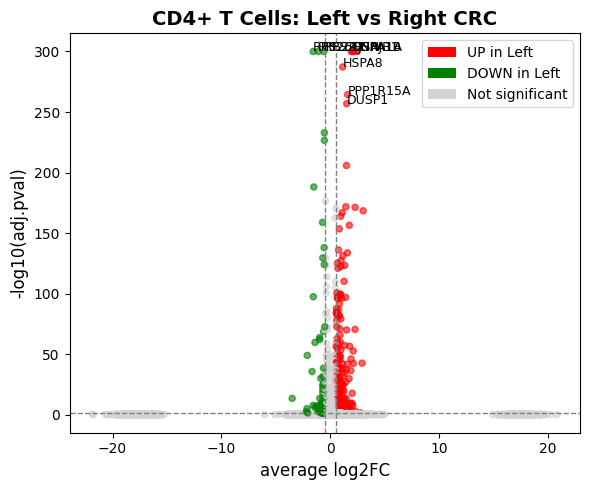

CD4+ T Cells: 464 UP in left, 105 DOWN in left


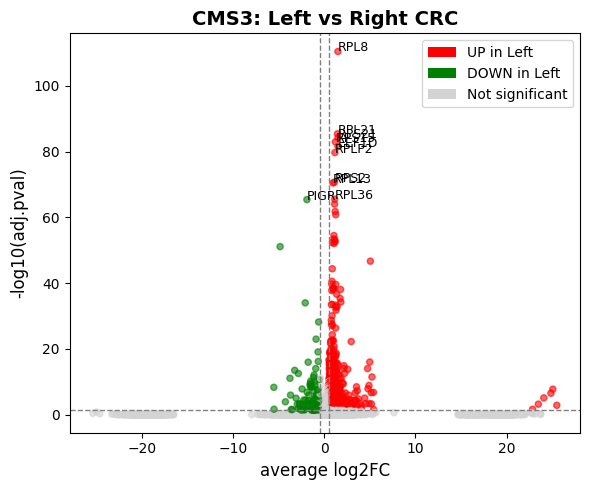

CMS3: 1063 UP in left, 133 DOWN in left


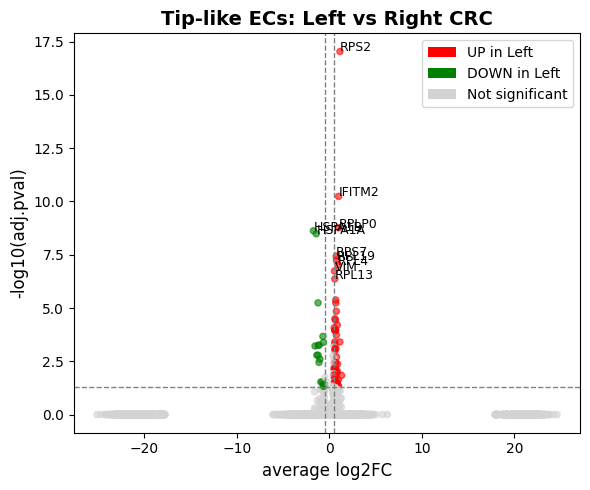

Tip-like ECs: 61 UP in left, 17 DOWN in left


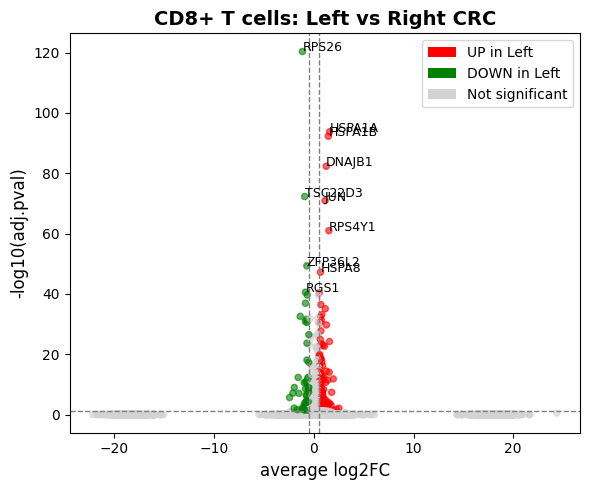

CD8+ T cells: 302 UP in left, 54 DOWN in left


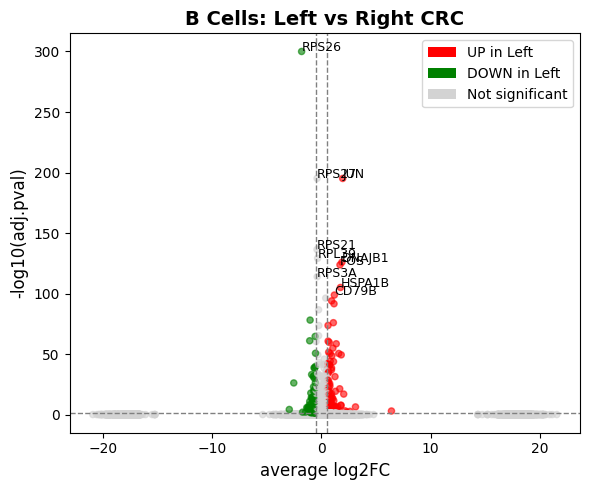

B Cells: 301 UP in left, 96 DOWN in left


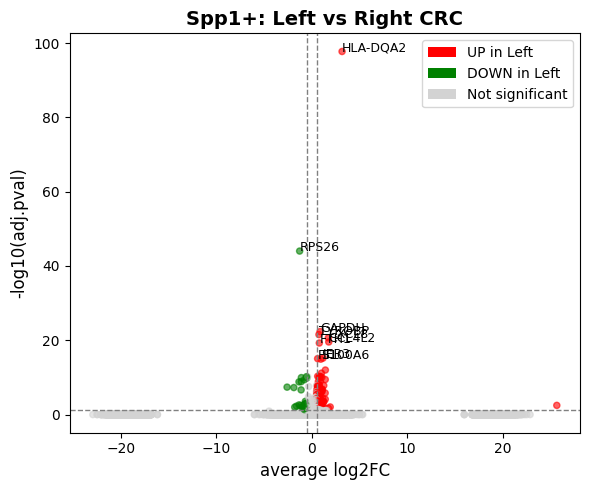

Spp1+: 128 UP in left, 24 DOWN in left


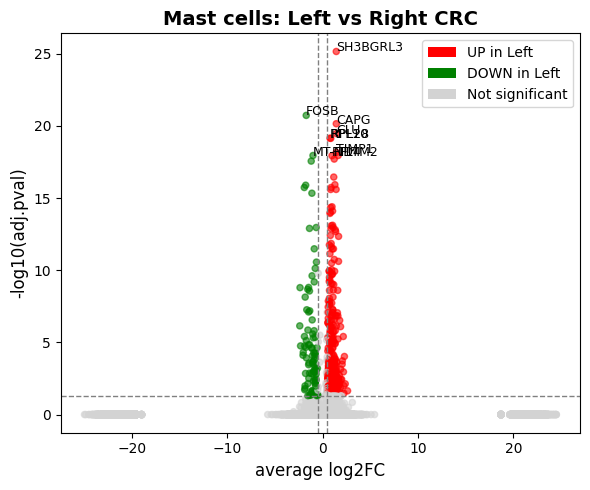

Mast cells: 367 UP in left, 91 DOWN in left


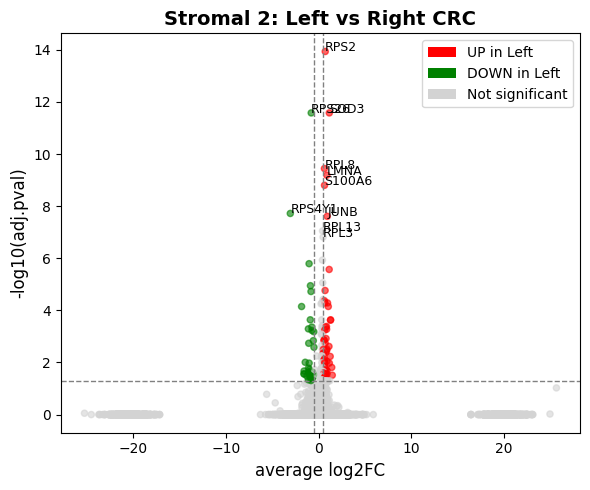

Stromal 2: 60 UP in left, 35 DOWN in left


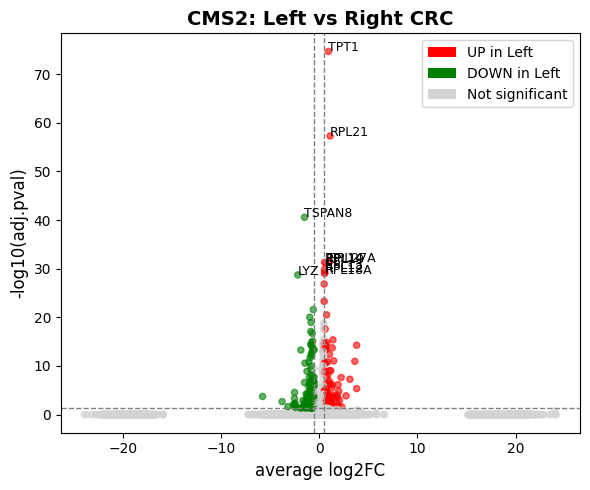

CMS2: 122 UP in left, 224 DOWN in left


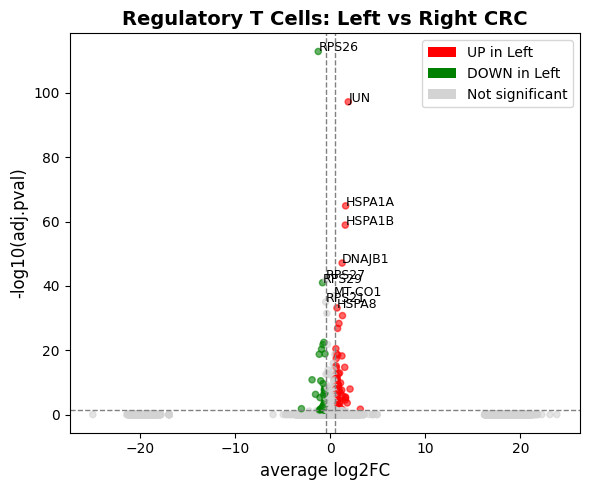

Regulatory T Cells: 112 UP in left, 42 DOWN in left


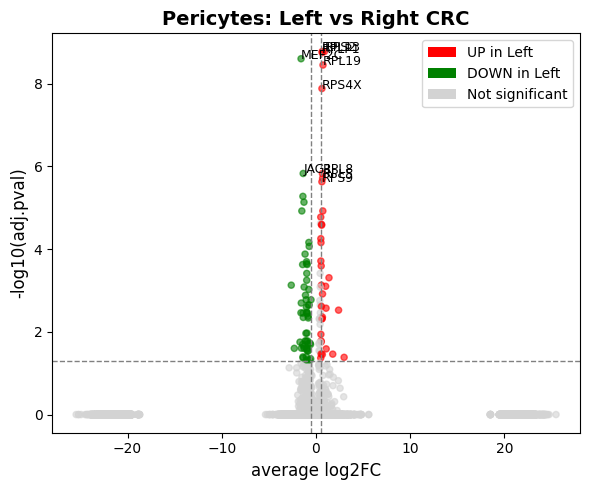

Pericytes: 35 UP in left, 56 DOWN in left


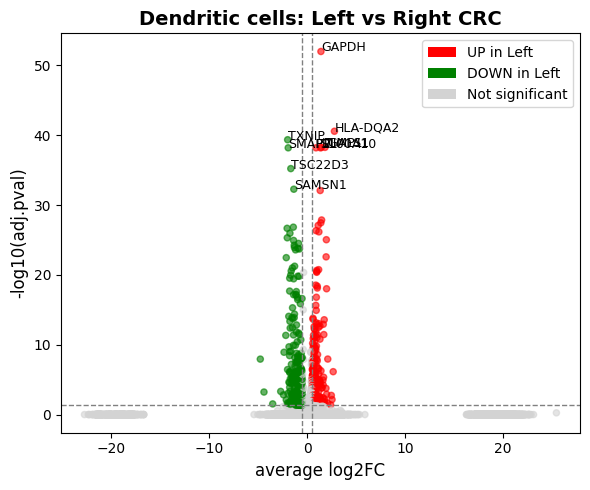

Dendritic cells: 198 UP in left, 300 DOWN in left


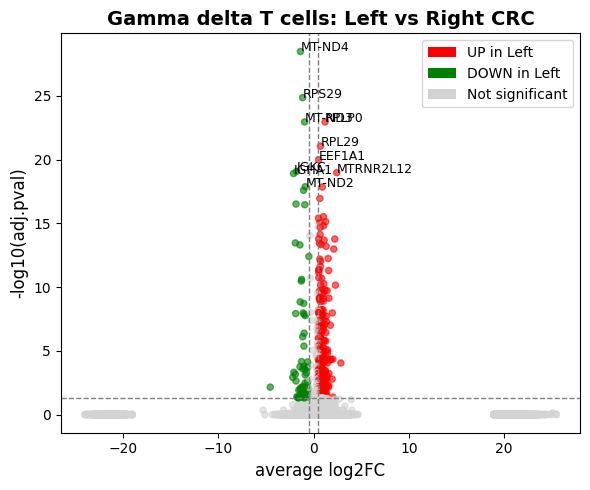

Gamma delta T cells: 359 UP in left, 70 DOWN in left


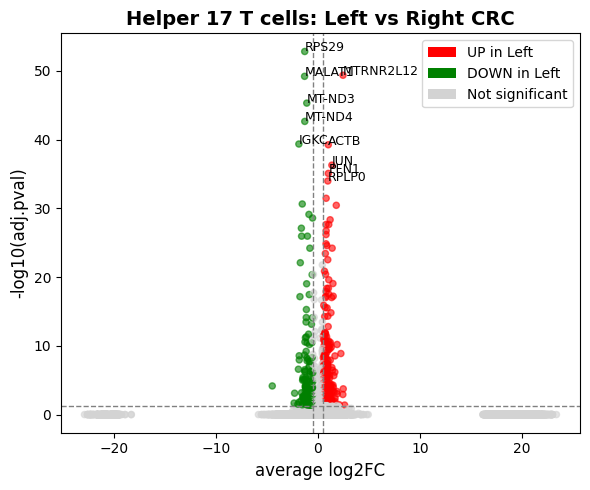

Helper 17 T cells: 374 UP in left, 150 DOWN in left


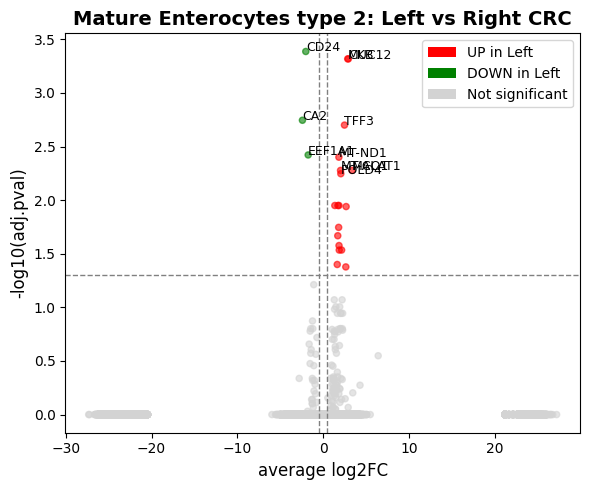

Mature Enterocytes type 2: 18 UP in left, 3 DOWN in left


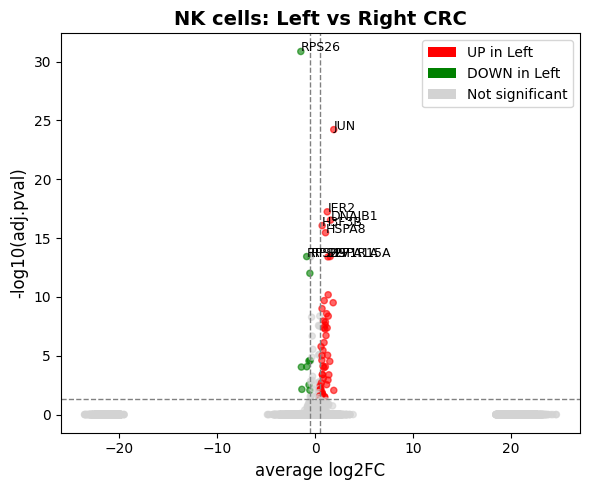

NK cells: 53 UP in left, 10 DOWN in left


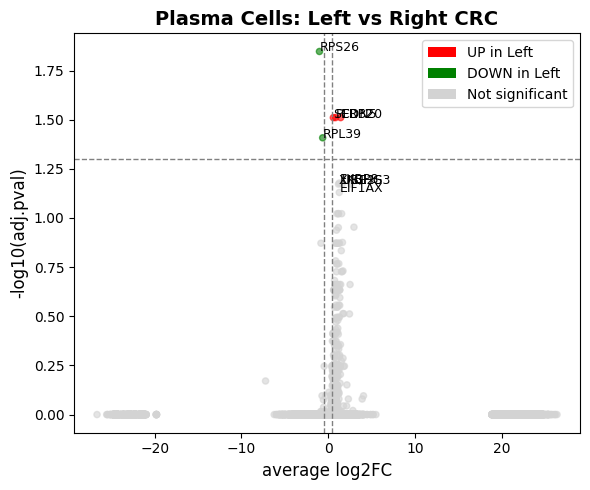

Plasma Cells: 3 UP in left, 2 DOWN in left


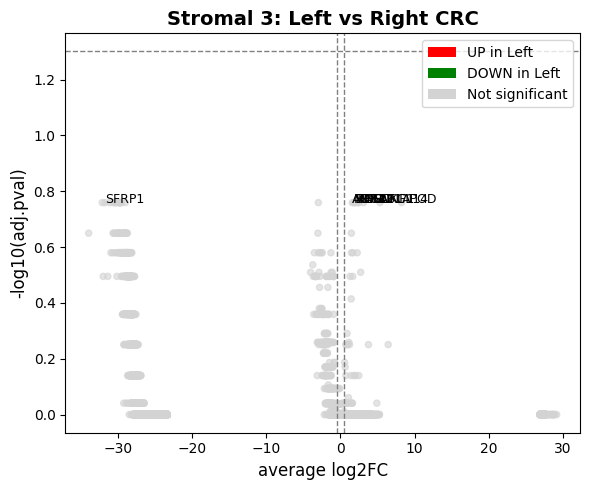

Stromal 3: 0 UP in left, 0 DOWN in left


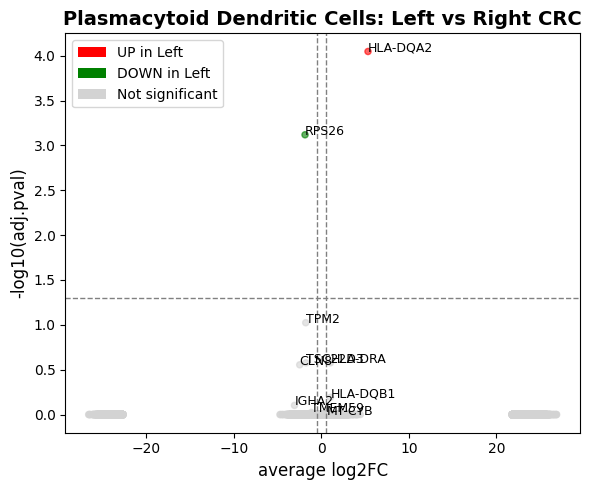

Plasmacytoid Dendritic Cells: 1 UP in left, 1 DOWN in left


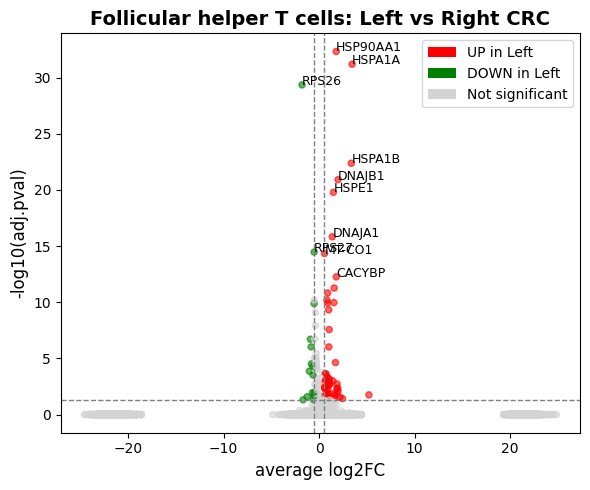

Follicular helper T cells: 69 UP in left, 15 DOWN in left


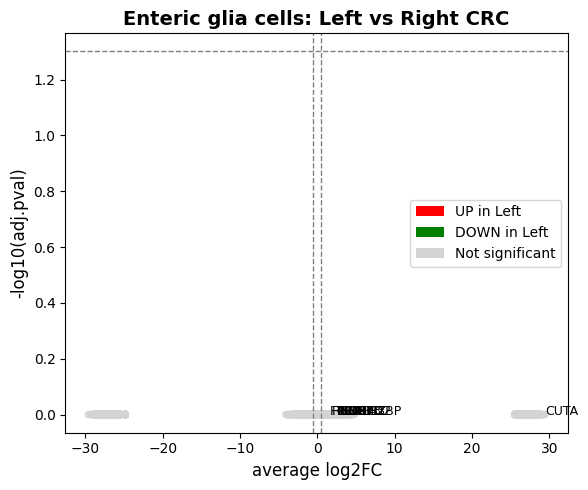

Enteric glia cells: 0 UP in left, 0 DOWN in left


In [10]:
## the next one is valid for volcano plot
# Create individual volcano plot for each cell type
for cell_type in cell_types:
    fig, ax = plt.subplots(figsize=(6, 5))
    
    # Get DEGs for this cell type
    ct_degs = all_degs[all_degs['Cell_Type'] == cell_type].copy()
    
    if len(ct_degs) == 0:
        print(f"No DEGs found for {cell_type}")
        plt.close()
        continue
    
    # Calculate -log10(pval)
    ct_degs['-log10_pval'] = -np.log10(ct_degs['pvals_adj'] + 1e-300)
    
    # Color by significance
    colors = []
    for _, row in ct_degs.iterrows():
        if row['pvals_adj'] < 0.05 and abs(row['logfoldchanges']) > 0.5:
            if row['logfoldchanges'] > 0:
                colors.append('red')  # UP in left
            else:
                colors.append('green')  # DOWN in left (UP in right)
        else:
            colors.append('lightgray')
    
    # Volcano plot
    ax.scatter(
        ct_degs['logfoldchanges'],
        ct_degs['-log10_pval'],
        c=colors,
        alpha=0.6,
        s=20
    )
    
    # Label top genes (increase to 10 for individual plots)
    top_genes = ct_degs.nlargest(10, '-log10_pval')
    for _, gene in top_genes.iterrows():
        ax.text(
            gene['logfoldchanges'],
            gene['-log10_pval'],
            gene['names'],
            fontsize=9
        )
    
    # Formatting
    ax.axhline(y=-np.log10(0.05), color='gray', linestyle='--', linewidth=1)
    ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=1)
    ax.axvline(x=-0.5, color='gray', linestyle='--', linewidth=1)
    ax.set_xlabel('average log2FC', fontsize=12)
    ax.set_ylabel('-log10(adj.pval)', fontsize=12)
    ax.set_title(f'{cell_type}: Left vs Right CRC', fontsize=14, fontweight='bold')
    
    # Add legend
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='red', label='UP in Left'),
        Patch(facecolor='green', label='DOWN in Left'),
        Patch(facecolor='lightgray', label='Not significant')
    ]
    ax.legend(handles=legend_elements, loc='best')
    
    plt.tight_layout()
    plt.savefig(f'volcano_{cell_type.replace(" ", "_").replace("/", "_")}.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    
    # Print summary
    n_up = sum([1 for c in colors if c == 'red'])
    n_down = sum([1 for c in colors if c == 'green'])
    print(f"{cell_type}: {n_up} UP in left, {n_down} DOWN in left")

In [26]:
#!pip install adjustText

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


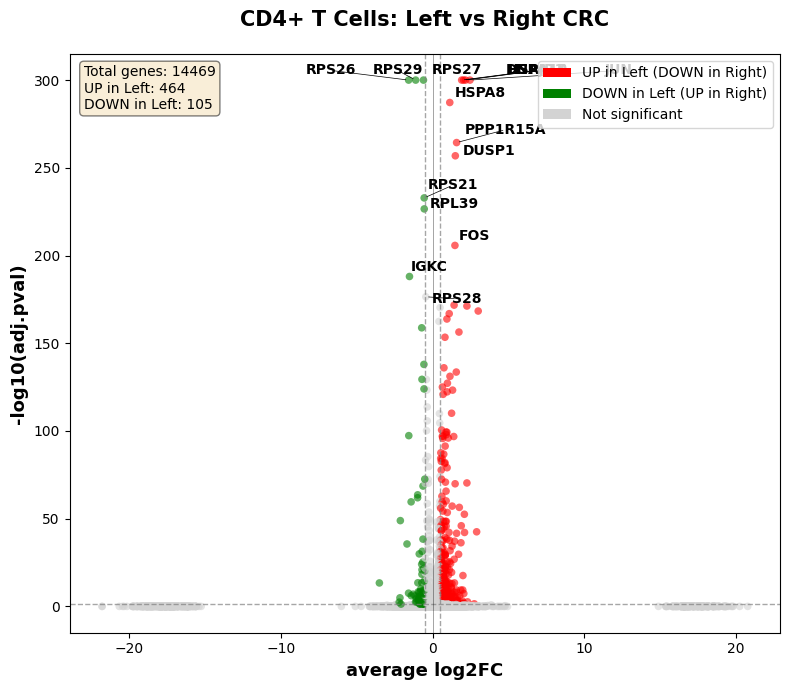


CD4+ T Cells:
  UP in Left (DOWN in Right): 464
  DOWN in Left (UP in Right): 105


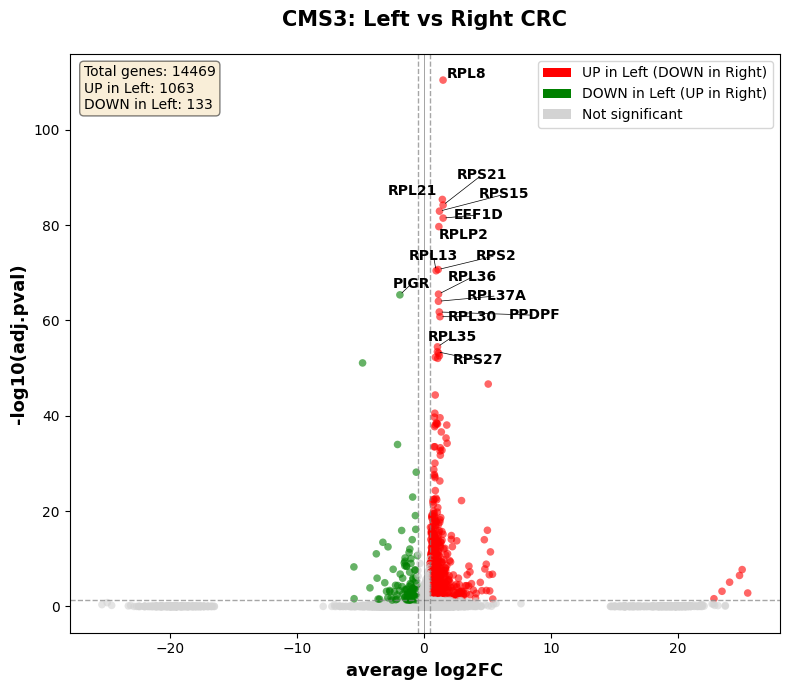


CMS3:
  UP in Left (DOWN in Right): 1063
  DOWN in Left (UP in Right): 133


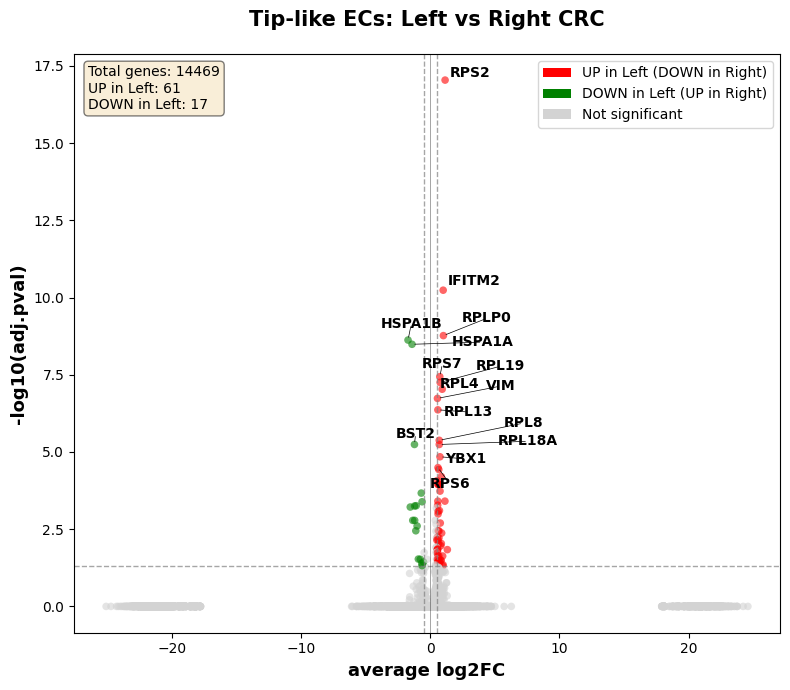


Tip-like ECs:
  UP in Left (DOWN in Right): 61
  DOWN in Left (UP in Right): 17


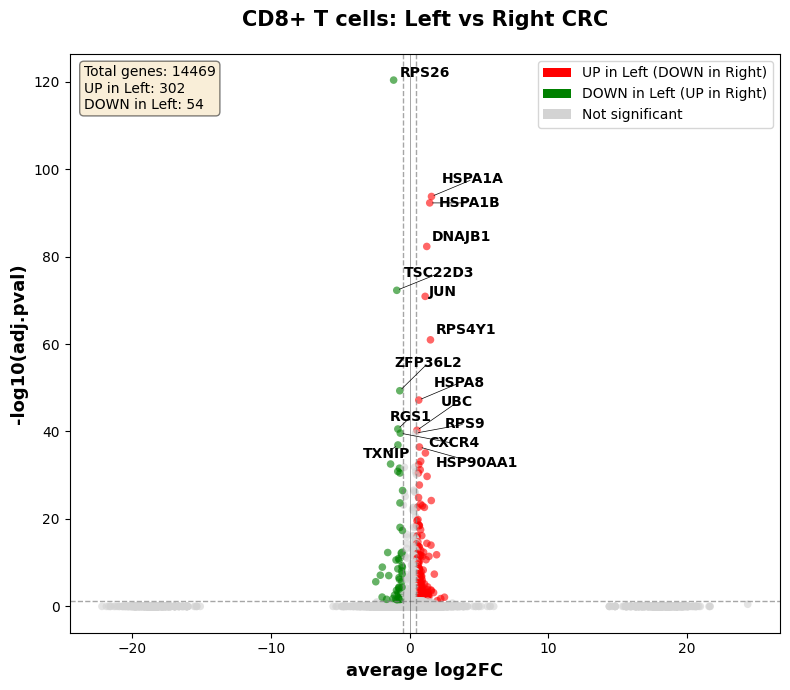


CD8+ T cells:
  UP in Left (DOWN in Right): 302
  DOWN in Left (UP in Right): 54


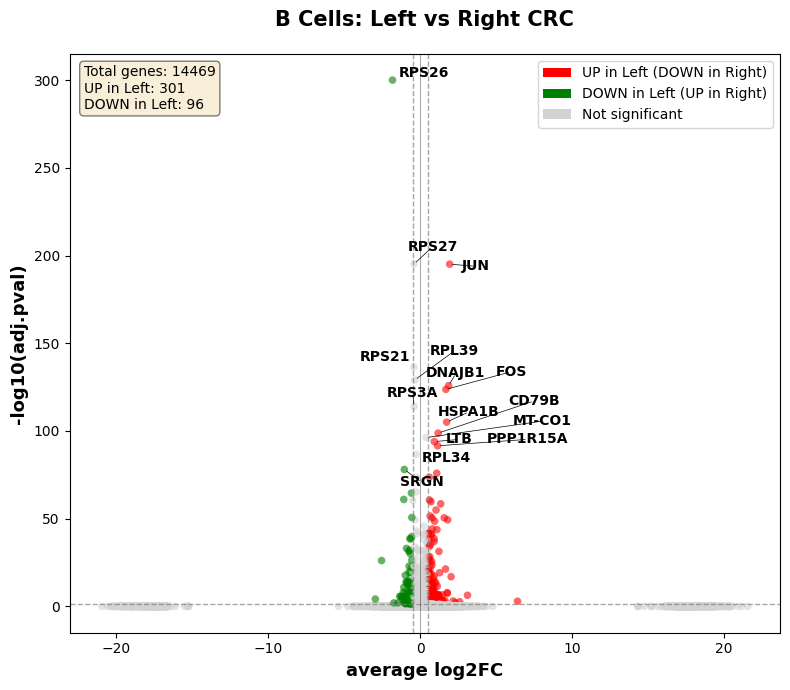


B Cells:
  UP in Left (DOWN in Right): 301
  DOWN in Left (UP in Right): 96


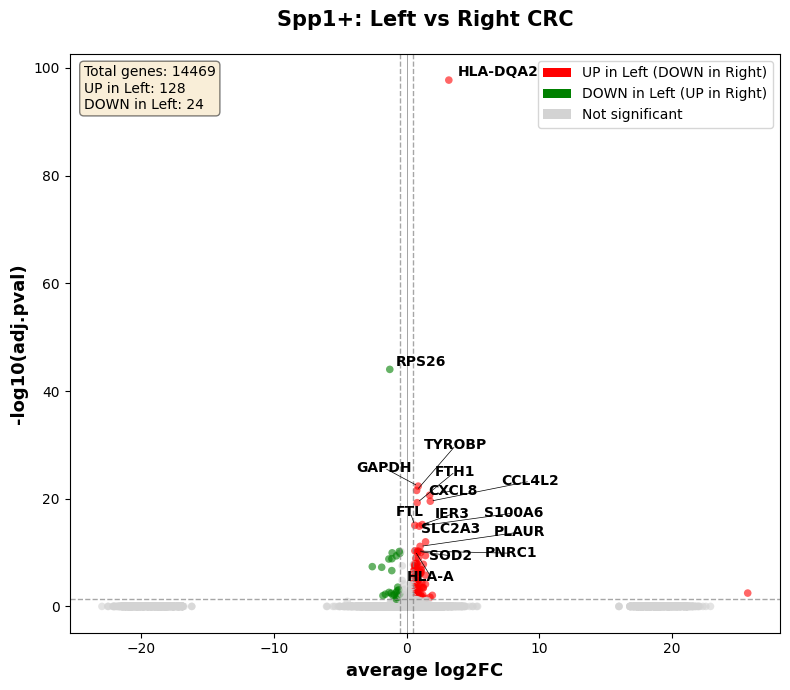


Spp1+:
  UP in Left (DOWN in Right): 128
  DOWN in Left (UP in Right): 24


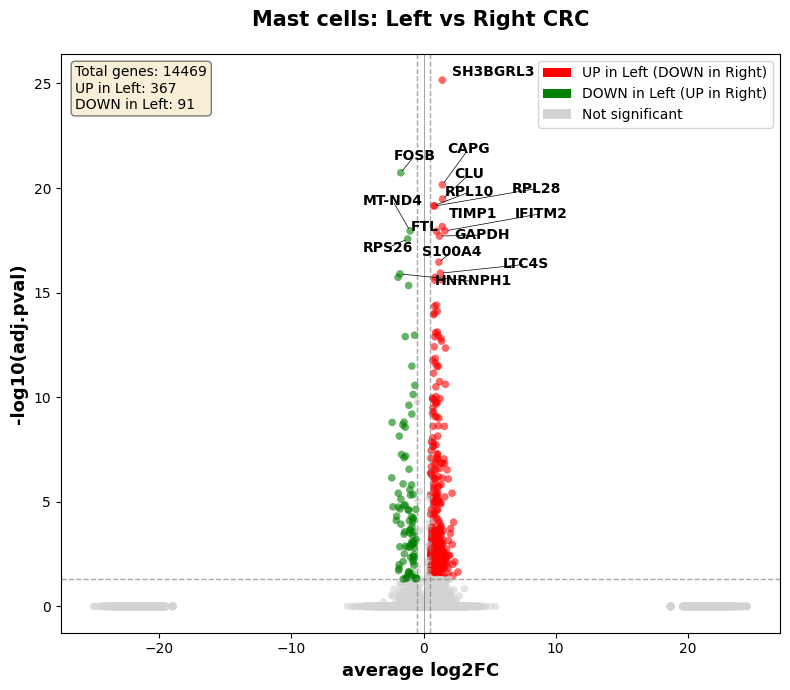


Mast cells:
  UP in Left (DOWN in Right): 367
  DOWN in Left (UP in Right): 91


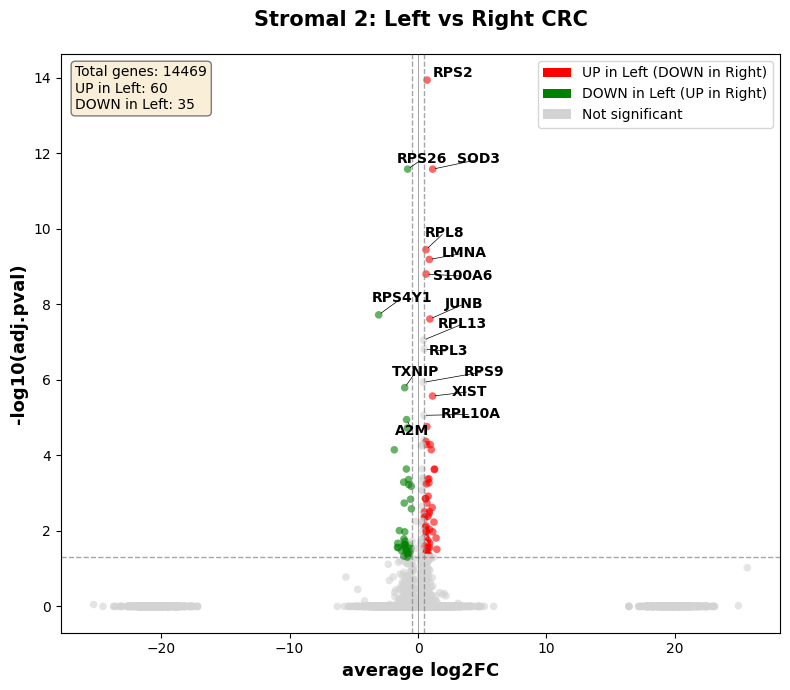


Stromal 2:
  UP in Left (DOWN in Right): 60
  DOWN in Left (UP in Right): 35


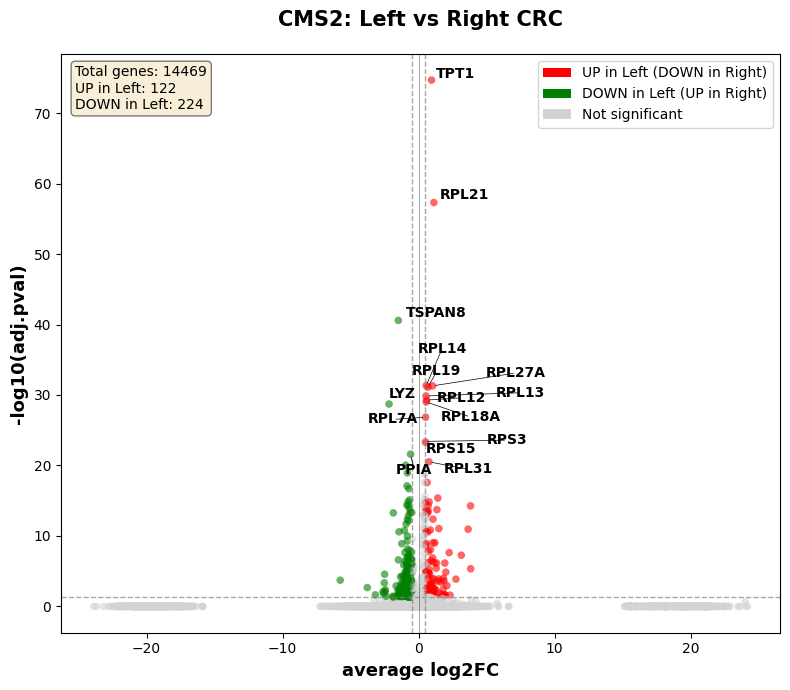


CMS2:
  UP in Left (DOWN in Right): 122
  DOWN in Left (UP in Right): 224


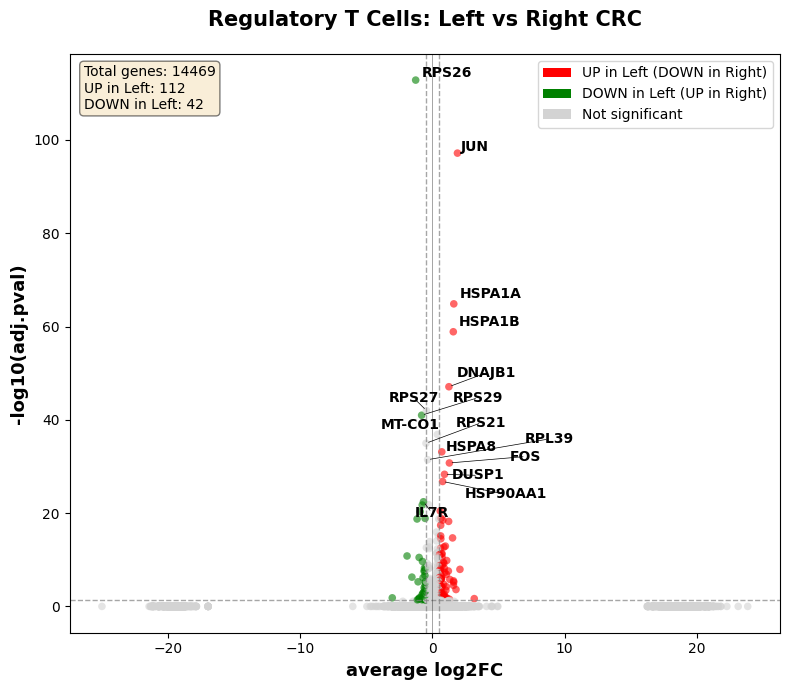


Regulatory T Cells:
  UP in Left (DOWN in Right): 112
  DOWN in Left (UP in Right): 42


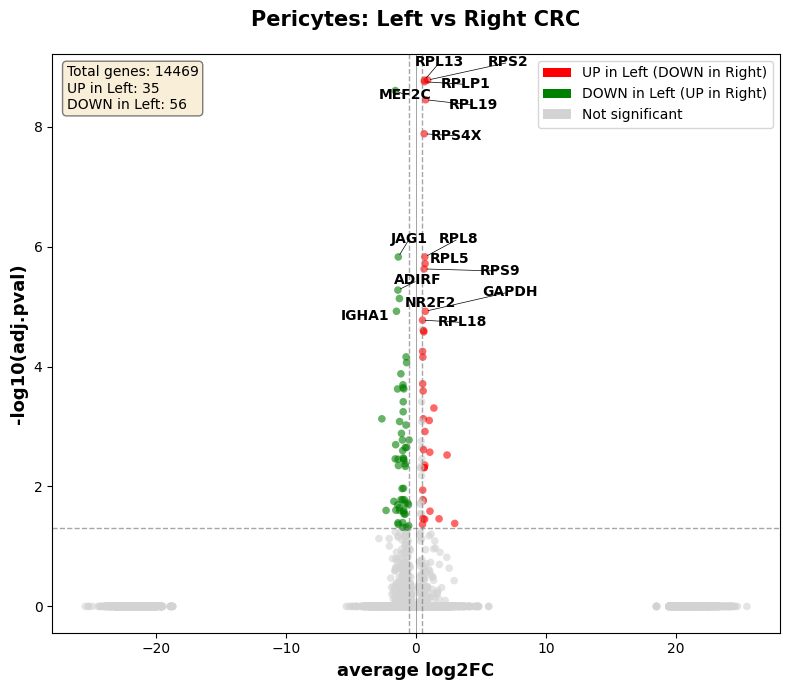


Pericytes:
  UP in Left (DOWN in Right): 35
  DOWN in Left (UP in Right): 56


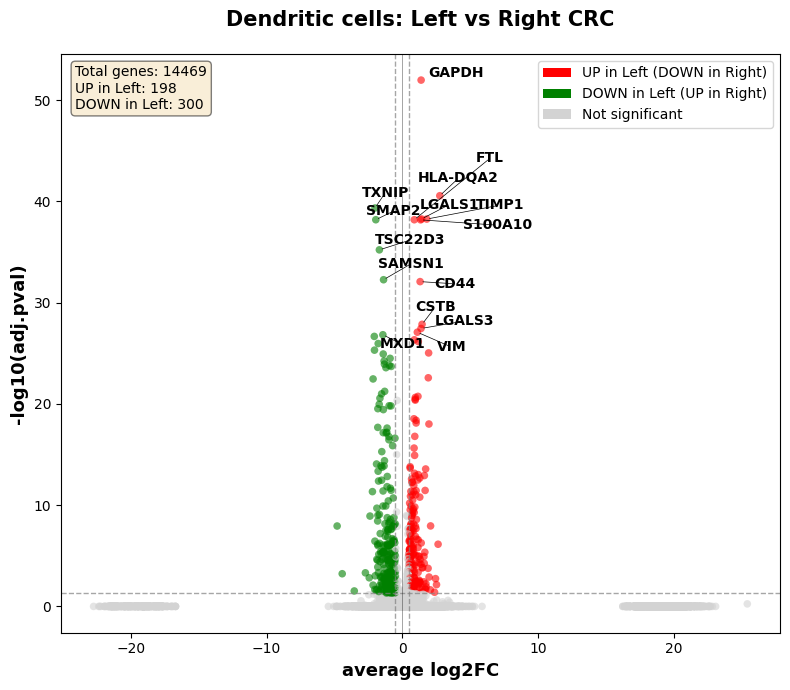


Dendritic cells:
  UP in Left (DOWN in Right): 198
  DOWN in Left (UP in Right): 300


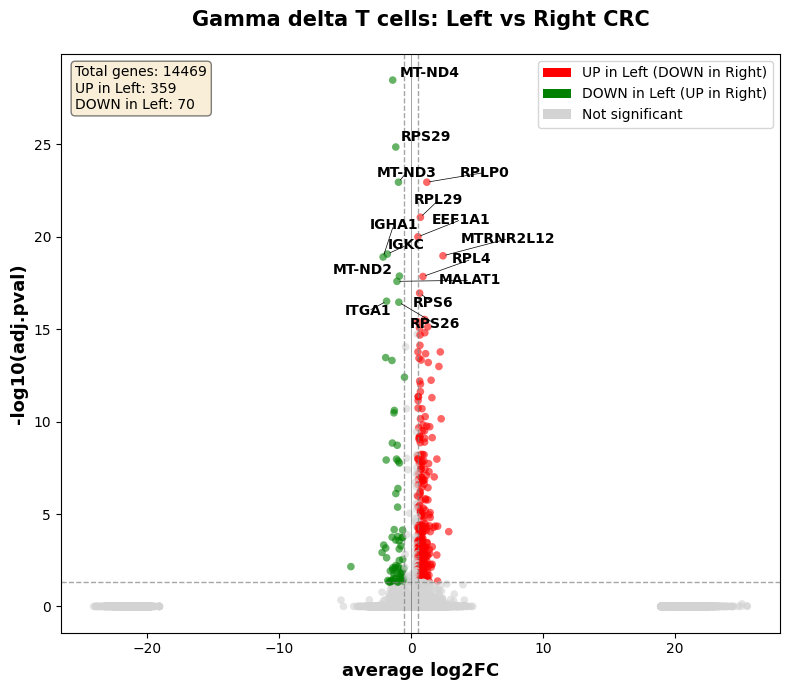


Gamma delta T cells:
  UP in Left (DOWN in Right): 359
  DOWN in Left (UP in Right): 70


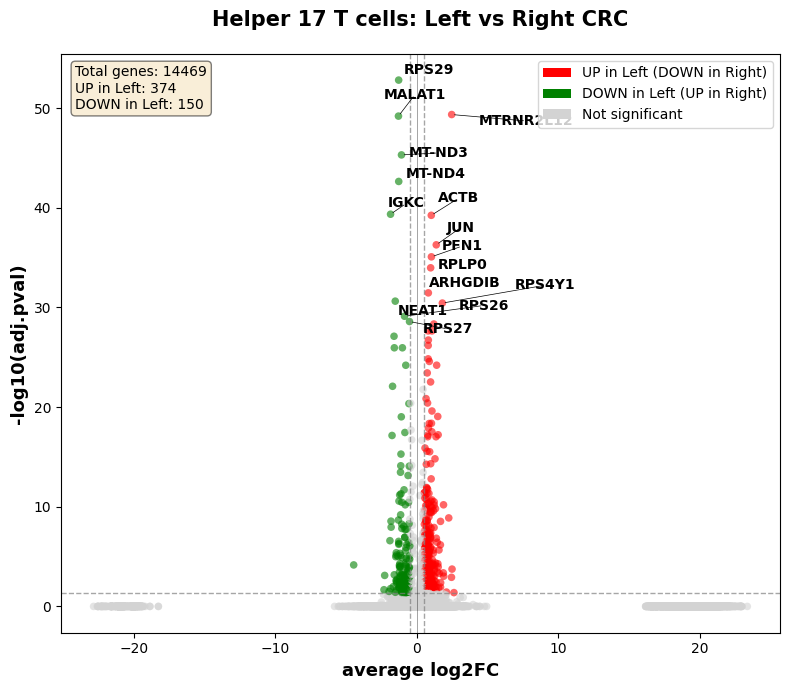


Helper 17 T cells:
  UP in Left (DOWN in Right): 374
  DOWN in Left (UP in Right): 150


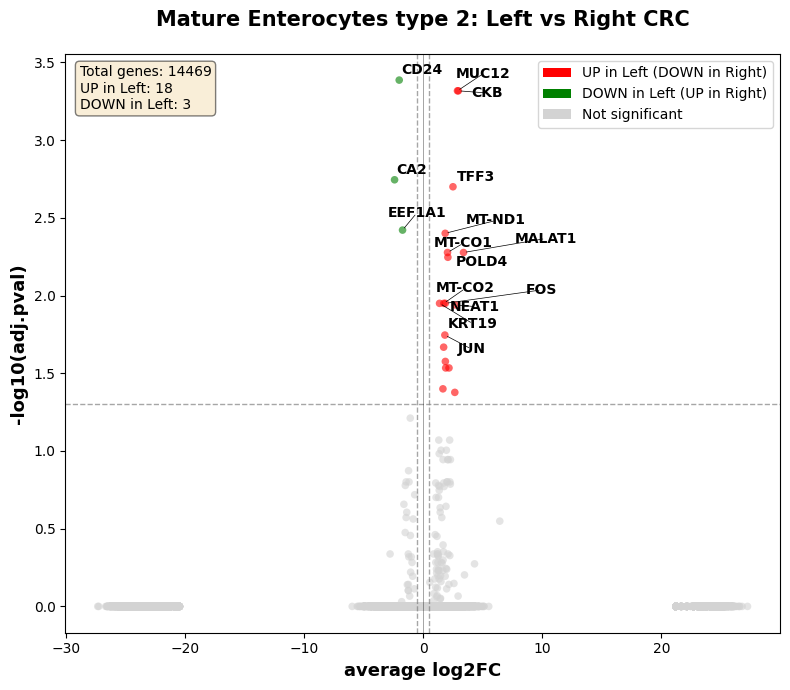


Mature Enterocytes type 2:
  UP in Left (DOWN in Right): 18
  DOWN in Left (UP in Right): 3


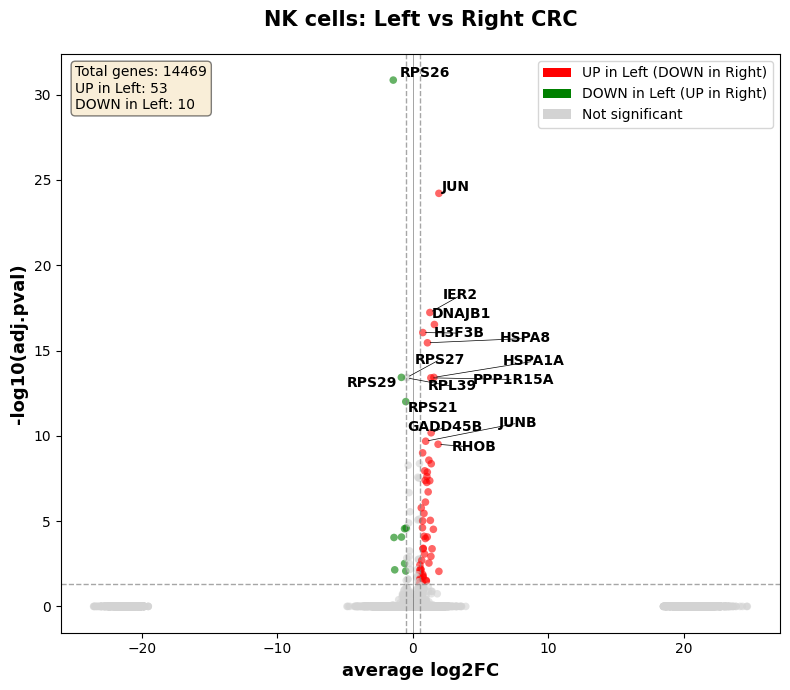


NK cells:
  UP in Left (DOWN in Right): 53
  DOWN in Left (UP in Right): 10


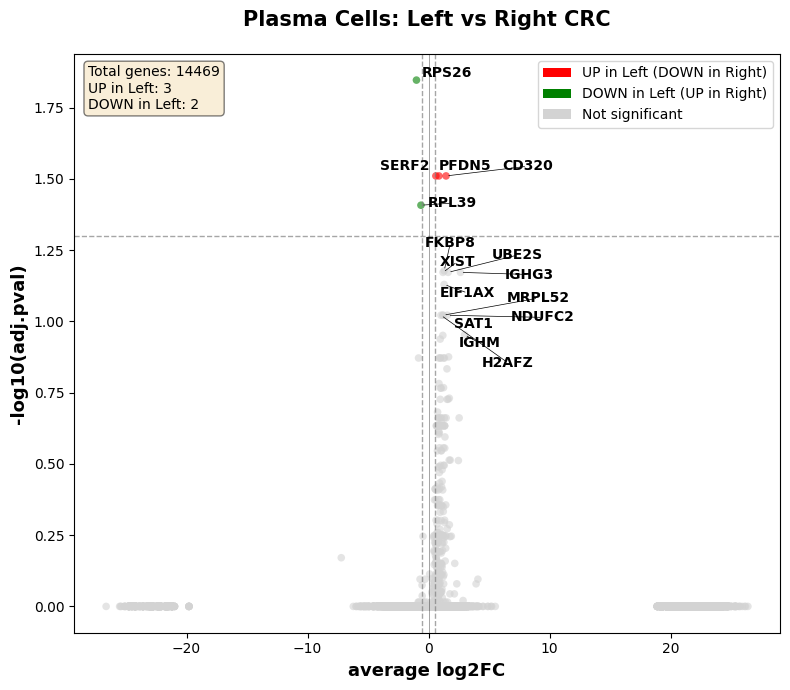


Plasma Cells:
  UP in Left (DOWN in Right): 3
  DOWN in Left (UP in Right): 2


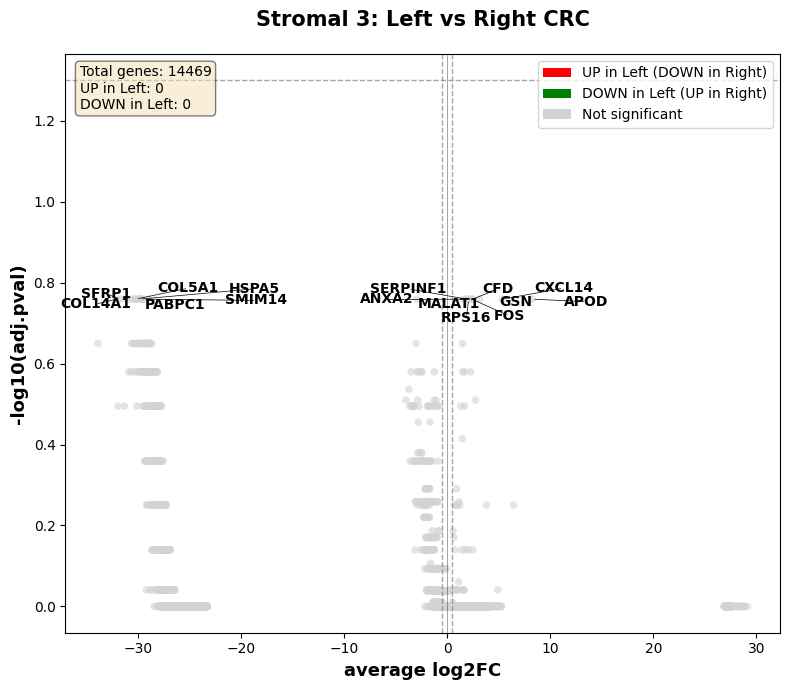


Stromal 3:
  UP in Left (DOWN in Right): 0
  DOWN in Left (UP in Right): 0


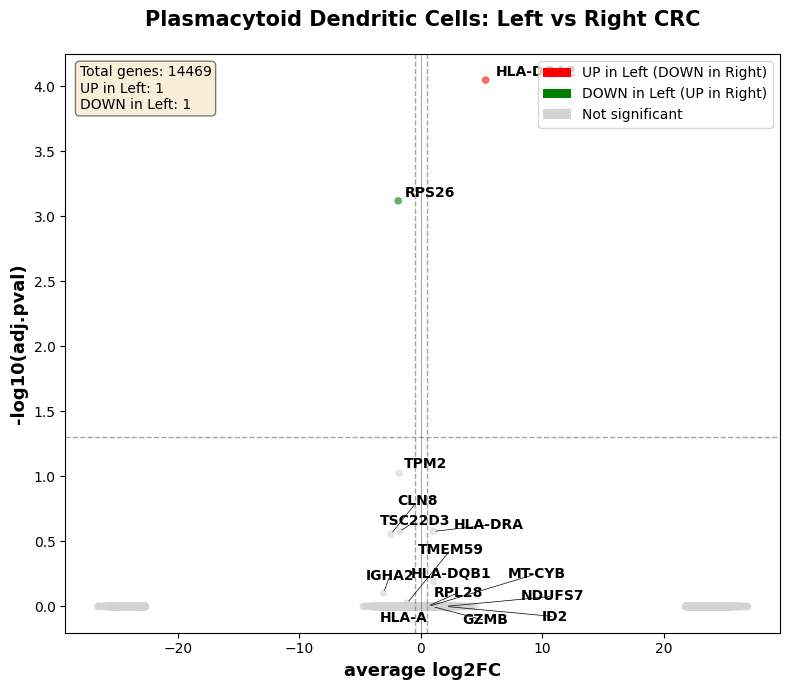


Plasmacytoid Dendritic Cells:
  UP in Left (DOWN in Right): 1
  DOWN in Left (UP in Right): 1


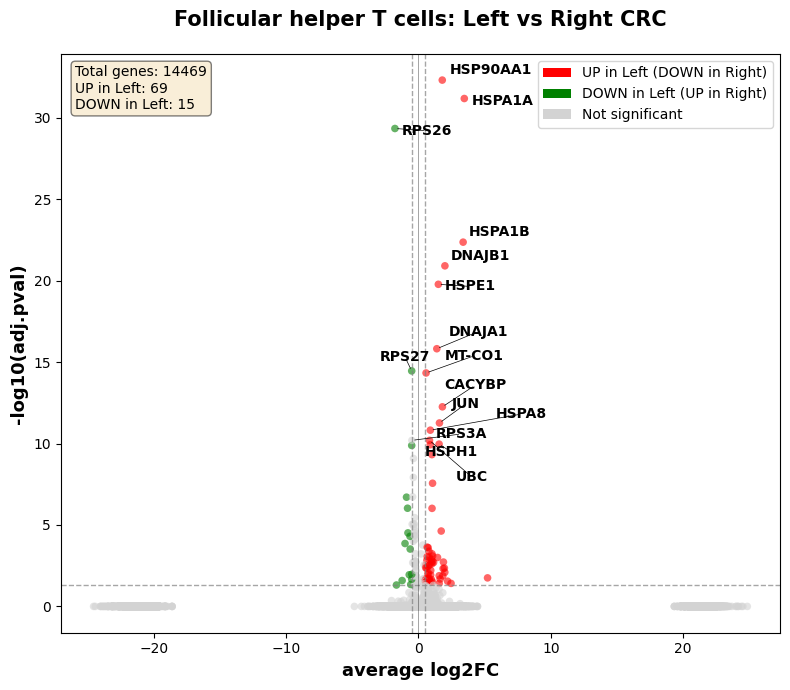


Follicular helper T cells:
  UP in Left (DOWN in Right): 69
  DOWN in Left (UP in Right): 15


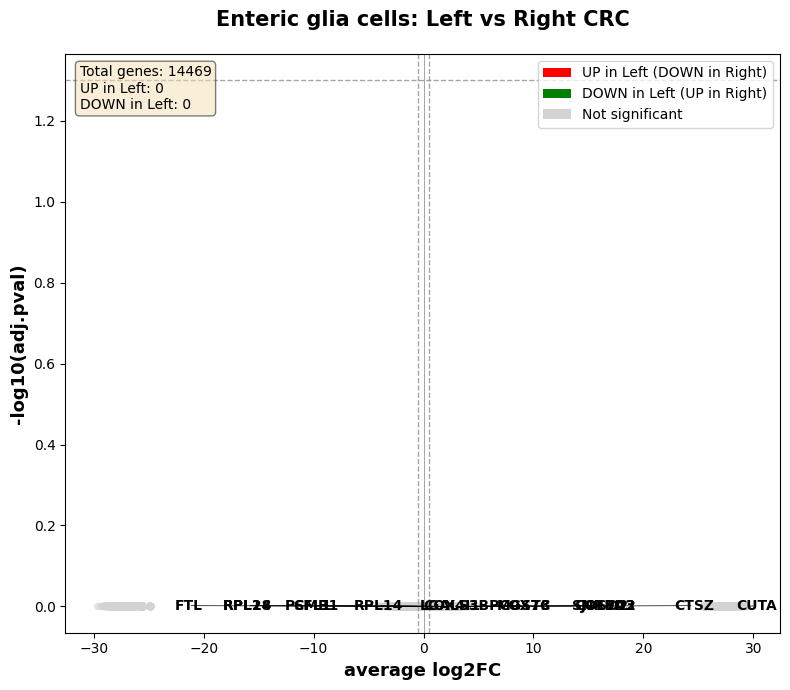


Enteric glia cells:
  UP in Left (DOWN in Right): 0
  DOWN in Left (UP in Right): 0


In [11]:


# Create individual volcano plot for each cell type
for cell_type in cell_types:
    fig, ax = plt.subplots(figsize=(8, 7))
    
    # Get DEGs for this cell type
    ct_degs = all_degs[all_degs['Cell_Type'] == cell_type].copy()
    
    if len(ct_degs) == 0:
        print(f"No DEGs found for {cell_type}")
        plt.close()
        continue
    
    # Calculate -log10(pval)
    ct_degs['-log10_pval'] = -np.log10(ct_degs['pvals_adj'] + 1e-300)
    
    # Color by significance
    colors = []
    for _, row in ct_degs.iterrows():
        if row['pvals_adj'] < 0.05 and abs(row['logfoldchanges']) > 0.5:
            if row['logfoldchanges'] > 0:
                colors.append('red')  # UP in left (DOWN in right)
            else:
                colors.append('green')  # DOWN in left (UP in right)
        else:
            colors.append('lightgray')
    
    # Volcano plot
    scatter = ax.scatter(
        ct_degs['logfoldchanges'],
        ct_degs['-log10_pval'],
        c=colors,
        alpha=0.6,
        s=30,
        edgecolors='none'
    )
    
    # Label top genes with adjustText for better readability
    texts = []
    top_genes = ct_degs.nlargest(15, '-log10_pval')  # Get top 15
    
    for _, gene in top_genes.iterrows():
        texts.append(
            ax.text(
                gene['logfoldchanges'],
                gene['-log10_pval'],
                gene['names'],
                fontsize=10,
                fontweight='bold'
            )
        )
    
    # Adjust text to avoid overlaps (requires adjustText package)
    # If you don't have it: pip install adjustText
    try:
        from adjustText import adjust_text
        adjust_text(
            texts,
            arrowprops=dict(arrowstyle='-', color='black', lw=0.5),
            expand_points=(1.5, 1.5),
            force_points=(0.5, 0.5)
        )
    except ImportError:
        print("Install adjustText for better label placement: pip install adjustText")
    
    # Formatting
    ax.axhline(y=-np.log10(0.05), color='gray', linestyle='--', linewidth=1, alpha=0.7)
    ax.axvline(x=0.5, color='gray', linestyle='--', linewidth=1, alpha=0.7)
    ax.axvline(x=-0.5, color='gray', linestyle='--', linewidth=1, alpha=0.7)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.5, alpha=0.5)
    
    ax.set_xlabel('average log2FC', fontsize=13, fontweight='bold')
    ax.set_ylabel('-log10(adj.pval)', fontsize=13, fontweight='bold')
    ax.set_title(f'{cell_type}: Left vs Right CRC', fontsize=15, fontweight='bold', pad=20)
    
    # Add legend with clearer labels
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='red', label='UP in Left (DOWN in Right)'),
        Patch(facecolor='green', label='DOWN in Left (UP in Right)'),
        Patch(facecolor='lightgray', label='Not significant')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10, frameon=True)
    
    # Add text box with summary statistics
    n_up = sum([1 for c in colors if c == 'red'])
    n_down = sum([1 for c in colors if c == 'green'])
    n_total = len(ct_degs)
    
    textstr = f'Total genes: {n_total}\nUP in Left: {n_up}\nDOWN in Left: {n_down}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=props)
    
    plt.tight_layout()
    plt.savefig(f'volcano_{cell_type.replace(" ", "_").replace("/", "_")}.pdf', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\n{cell_type}:")
    print(f"  UP in Left (DOWN in Right): {n_up}")
    print(f"  DOWN in Left (UP in Right): {n_down}")


Processing CD4+ T Cells...
  Plotting 30 genes (15 UP, 15 DOWN)


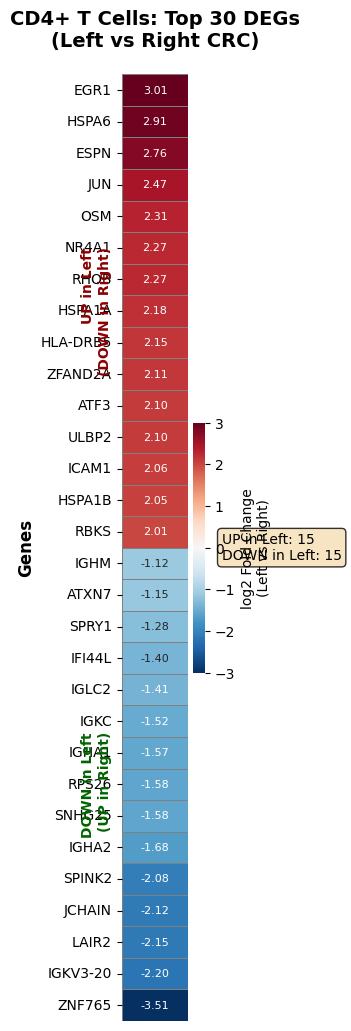

  ✅ Heatmap created!

Processing CMS3...
  Plotting 30 genes (15 UP, 15 DOWN)


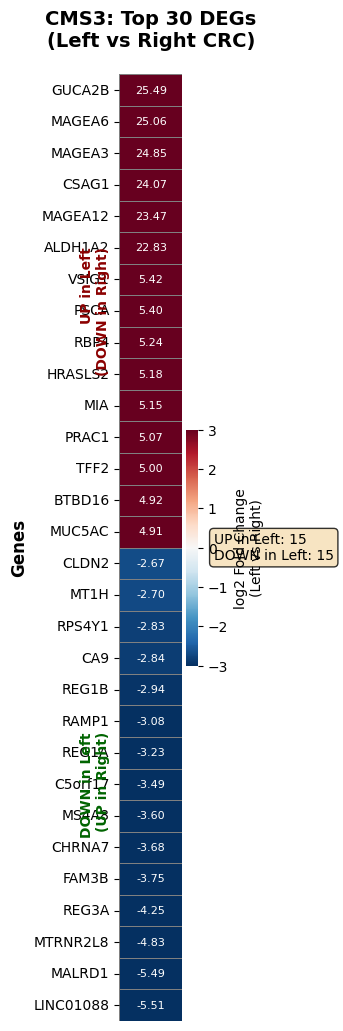

  ✅ Heatmap created!

Processing Tip-like ECs...
  Plotting 30 genes (15 UP, 15 DOWN)


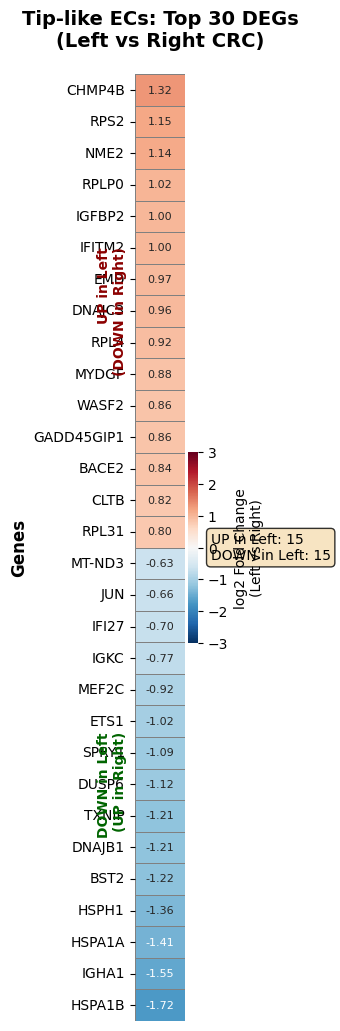

  ✅ Heatmap created!

Processing CD8+ T cells...
  Plotting 30 genes (15 UP, 15 DOWN)


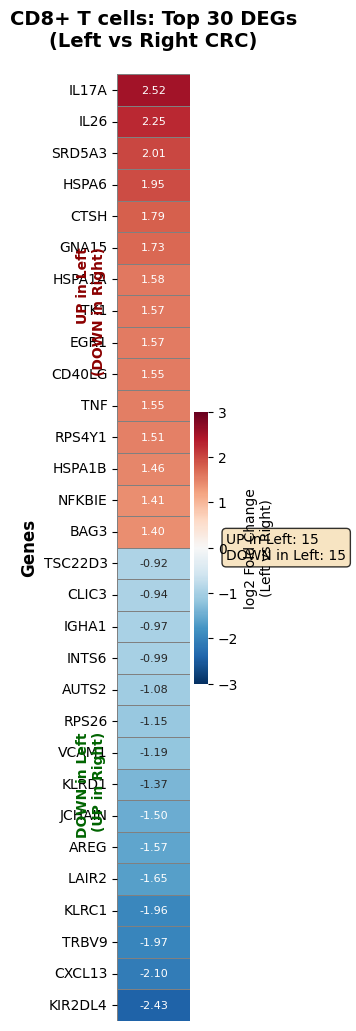

  ✅ Heatmap created!

Processing B Cells...
  Plotting 30 genes (15 UP, 15 DOWN)


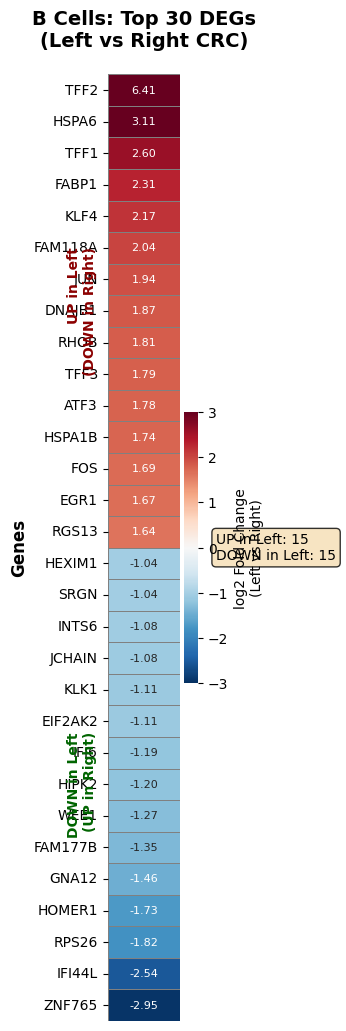

  ✅ Heatmap created!

Processing Spp1+...
  Plotting 30 genes (15 UP, 15 DOWN)


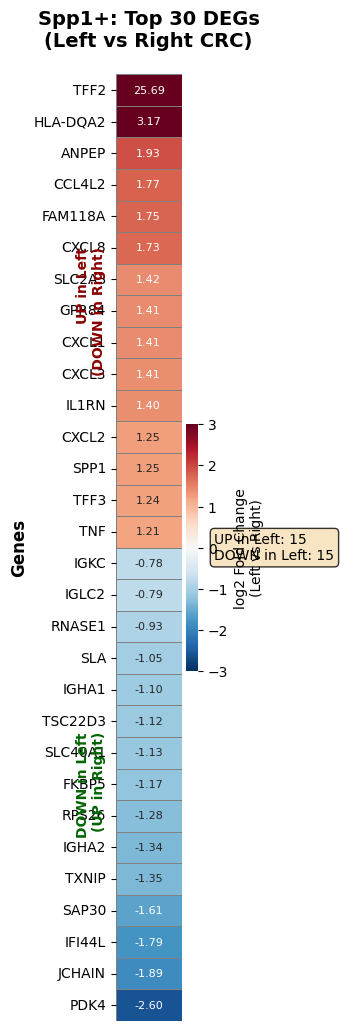

  ✅ Heatmap created!

Processing Mast cells...
  Plotting 30 genes (15 UP, 15 DOWN)


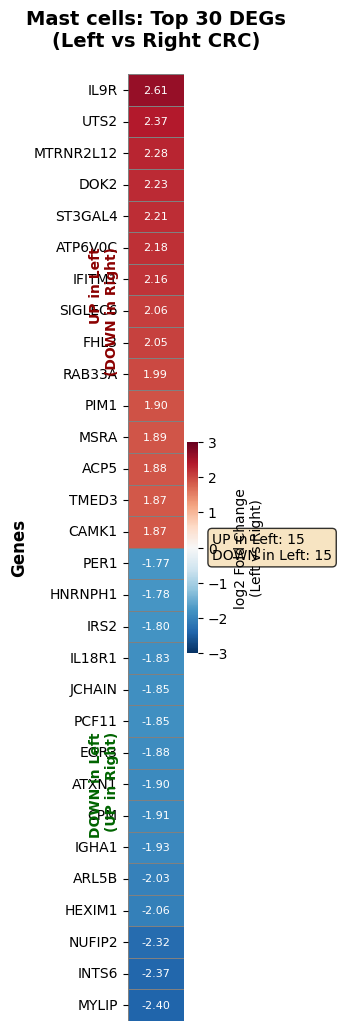

  ✅ Heatmap created!

Processing Stromal 2...
  Plotting 30 genes (15 UP, 15 DOWN)


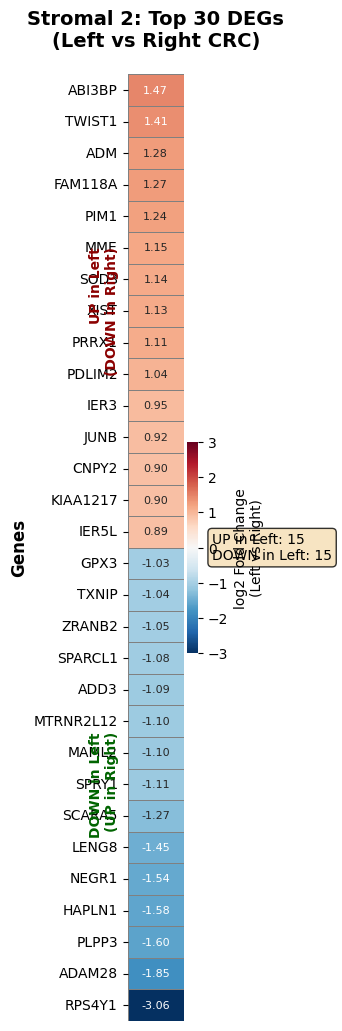

  ✅ Heatmap created!

Processing CMS2...
  Plotting 30 genes (15 UP, 15 DOWN)


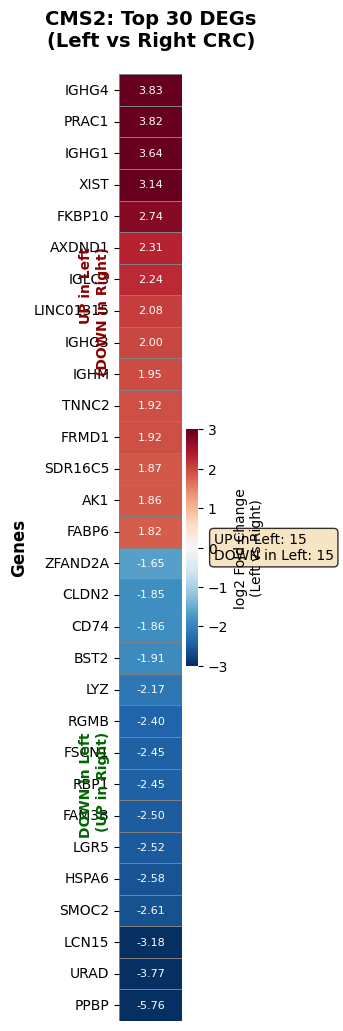

  ✅ Heatmap created!

Processing Regulatory T Cells...
  Plotting 30 genes (15 UP, 15 DOWN)


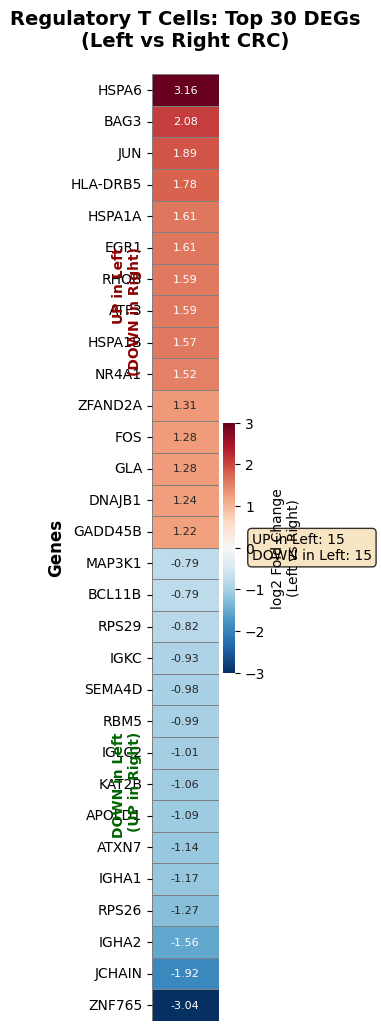

  ✅ Heatmap created!

Processing Pericytes...
  Plotting 30 genes (15 UP, 15 DOWN)


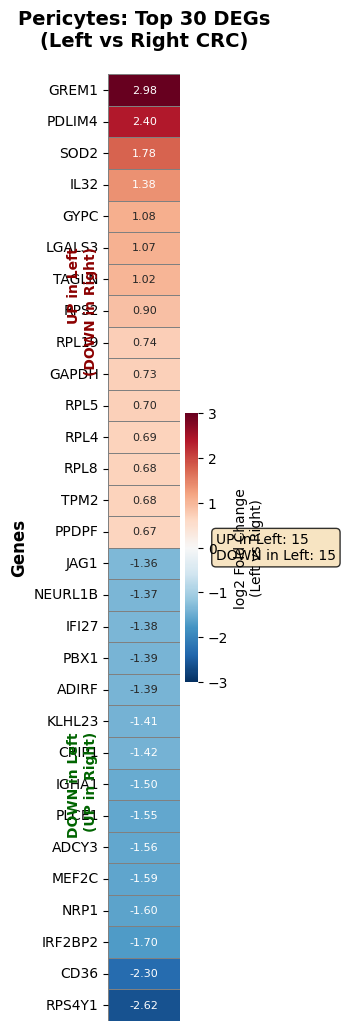

  ✅ Heatmap created!

Processing Dendritic cells...
  Plotting 30 genes (15 UP, 15 DOWN)


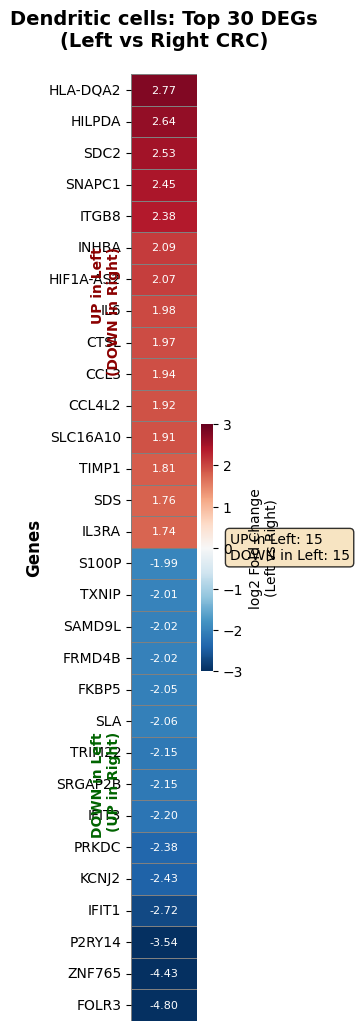

  ✅ Heatmap created!

Processing Gamma delta T cells...
  Plotting 30 genes (15 UP, 15 DOWN)


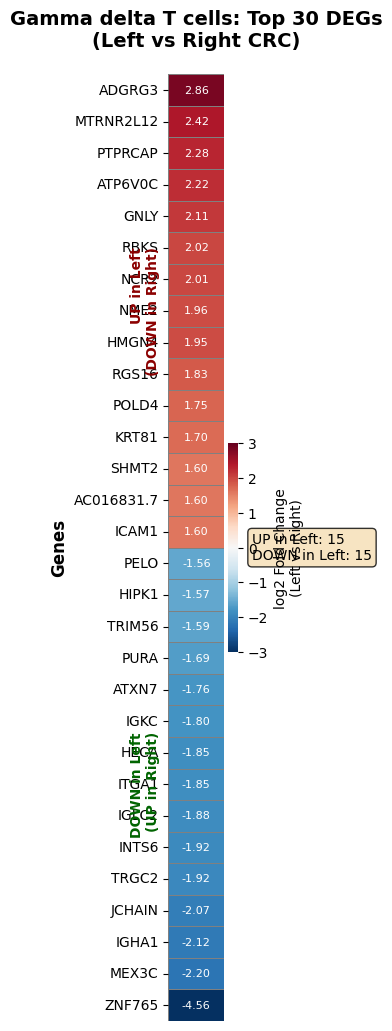

  ✅ Heatmap created!

Processing Helper 17 T cells...
  Plotting 30 genes (15 UP, 15 DOWN)


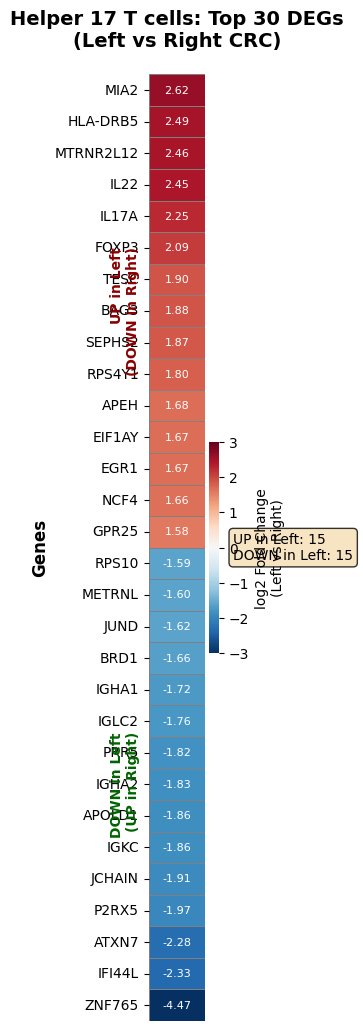

  ✅ Heatmap created!

Processing Mature Enterocytes type 2...
  Plotting 18 genes (15 UP, 3 DOWN)


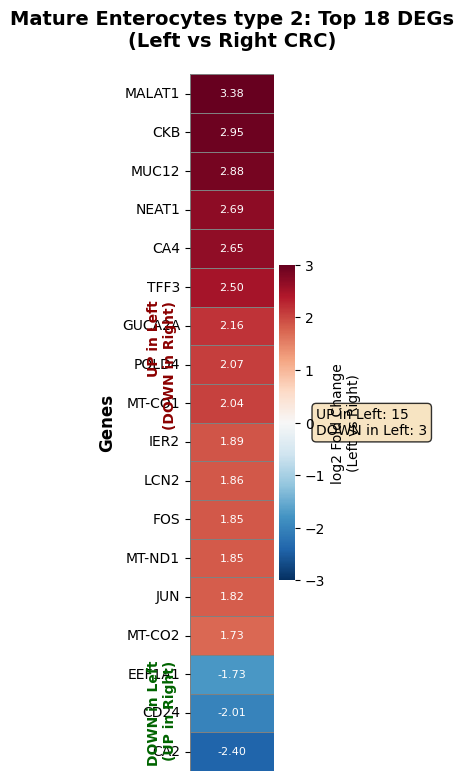

  ✅ Heatmap created!

Processing NK cells...
  Plotting 25 genes (15 UP, 10 DOWN)


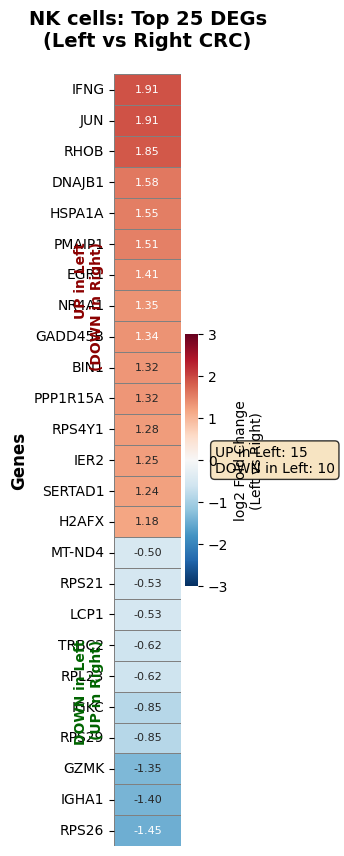

  ✅ Heatmap created!

Processing Plasma Cells...
  Plotting 5 genes (3 UP, 2 DOWN)


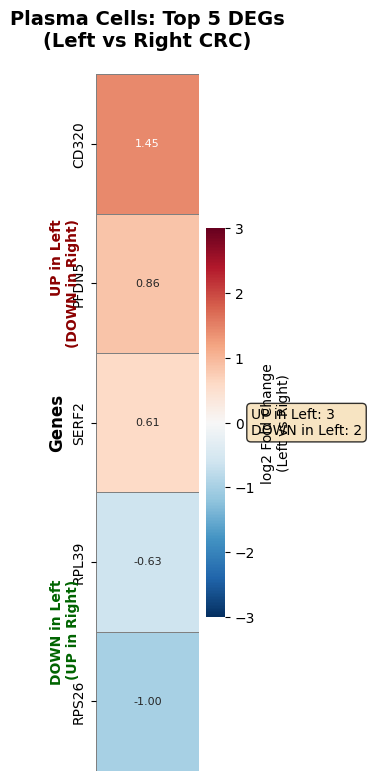

  ✅ Heatmap created!

Processing Stromal 3...
  ❌ No significant DEGs for Stromal 3

Processing Plasmacytoid Dendritic Cells...
  Plotting 2 genes (1 UP, 1 DOWN)


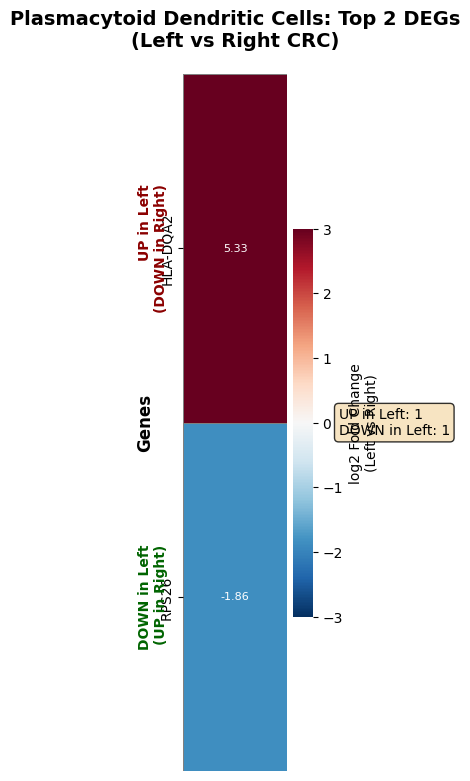

  ✅ Heatmap created!

Processing Follicular helper T cells...
  Plotting 30 genes (15 UP, 15 DOWN)


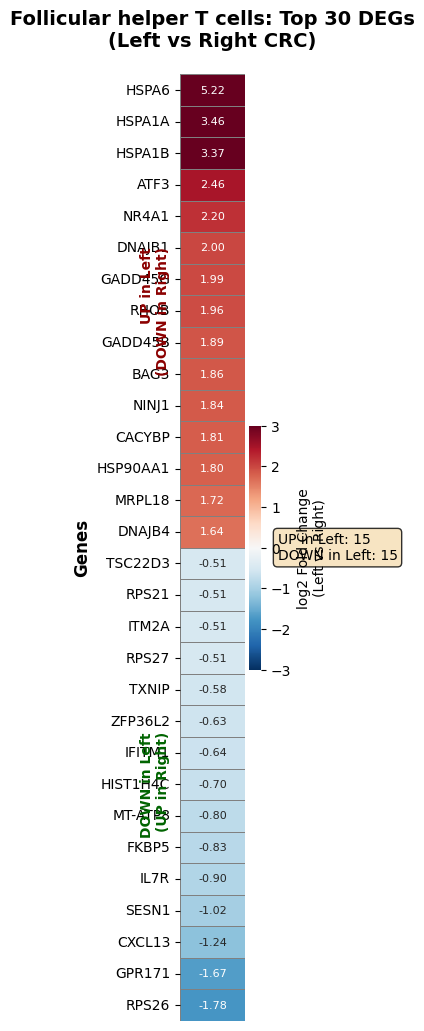

  ✅ Heatmap created!

Processing Enteric glia cells...
  ❌ No significant DEGs for Enteric glia cells


In [12]:

## bad figs
for cell_type in cell_types:
    print(f"\nProcessing {cell_type}...")
    
    # Get DEGs for this cell type
    ct_degs = all_degs[all_degs['Cell_Type'] == cell_type].copy()
    
    # Filter significant genes
    sig_degs = ct_degs[
        (ct_degs['pvals_adj'] < 0.05) & 
        (abs(ct_degs['logfoldchanges']) > 0.5)
    ].copy()
    
    if len(sig_degs) == 0:
        print(f"  ❌ No significant DEGs for {cell_type}")
        continue
    
    # Get top UP and DOWN genes
    up_genes = sig_degs[sig_degs['logfoldchanges'] > 0].nlargest(15, 'logfoldchanges')
    down_genes = sig_degs[sig_degs['logfoldchanges'] < 0].nsmallest(15, 'logfoldchanges')
    
    # Combine and sort by log2FC
    top_genes = pd.concat([up_genes, down_genes]).sort_values('logfoldchanges', ascending=False)
    
    if len(top_genes) == 0:
        print(f"  ❌ No genes to plot for {cell_type}")
        continue
    
    print(f"  Plotting {len(top_genes)} genes ({len(up_genes)} UP, {len(down_genes)} DOWN)")
    
    # Prepare data for heatmap - just use log2FC directly
    heatmap_data = pd.DataFrame({
        'log2FC': top_genes['logfoldchanges'].values
    }, index=top_genes['names'])
    
    # Create figure
    fig, ax = plt.subplots(figsize=(4, max(8, len(top_genes) * 0.35)))
    
    # Plot heatmap
    sns.heatmap(
        heatmap_data,
        cmap='RdBu_r',
        center=0,
        vmin=-3, vmax=3,
        cbar_kws={'label': 'log2 Fold Change\n(Left vs Right)'},
        yticklabels=True,
        xticklabels=False,
        linewidths=0.5,
        linecolor='gray',
        ax=ax,
        annot=True,
        fmt='.2f',
        annot_kws={'fontsize': 8}
    )
    
    # Add title
    ax.set_title(f'{cell_type}: Top {len(top_genes)} DEGs\n(Left vs Right CRC)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_ylabel('Genes', fontsize=12, fontweight='bold')
    
    # Add side labels for UP/DOWN
    ax.text(-0.15, len(up_genes)/2, 'UP in Left\n(DOWN in Right)', 
            rotation=90, va='center', ha='right',
            fontsize=10, fontweight='bold', color='darkred',
            transform=ax.transData)
    
    if len(down_genes) > 0:
        ax.text(-0.15, len(up_genes) + len(down_genes)/2, 'DOWN in Left\n(UP in Right)', 
                rotation=90, va='center', ha='right',
                fontsize=10, fontweight='bold', color='darkgreen',
                transform=ax.transData)
    
    # Add statistics box
    textstr = f'UP in Left: {len(up_genes)}\nDOWN in Left: {len(down_genes)}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    ax.text(1.5, 0.5, textstr, transform=ax.transAxes, fontsize=10,
            verticalalignment='center', bbox=props)
    
    plt.tight_layout()
    plt.savefig(f'heatmap_log2FC_{cell_type.replace(" ", "_").replace("/", "_")}.pdf', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"  ✅ Heatmap created!")

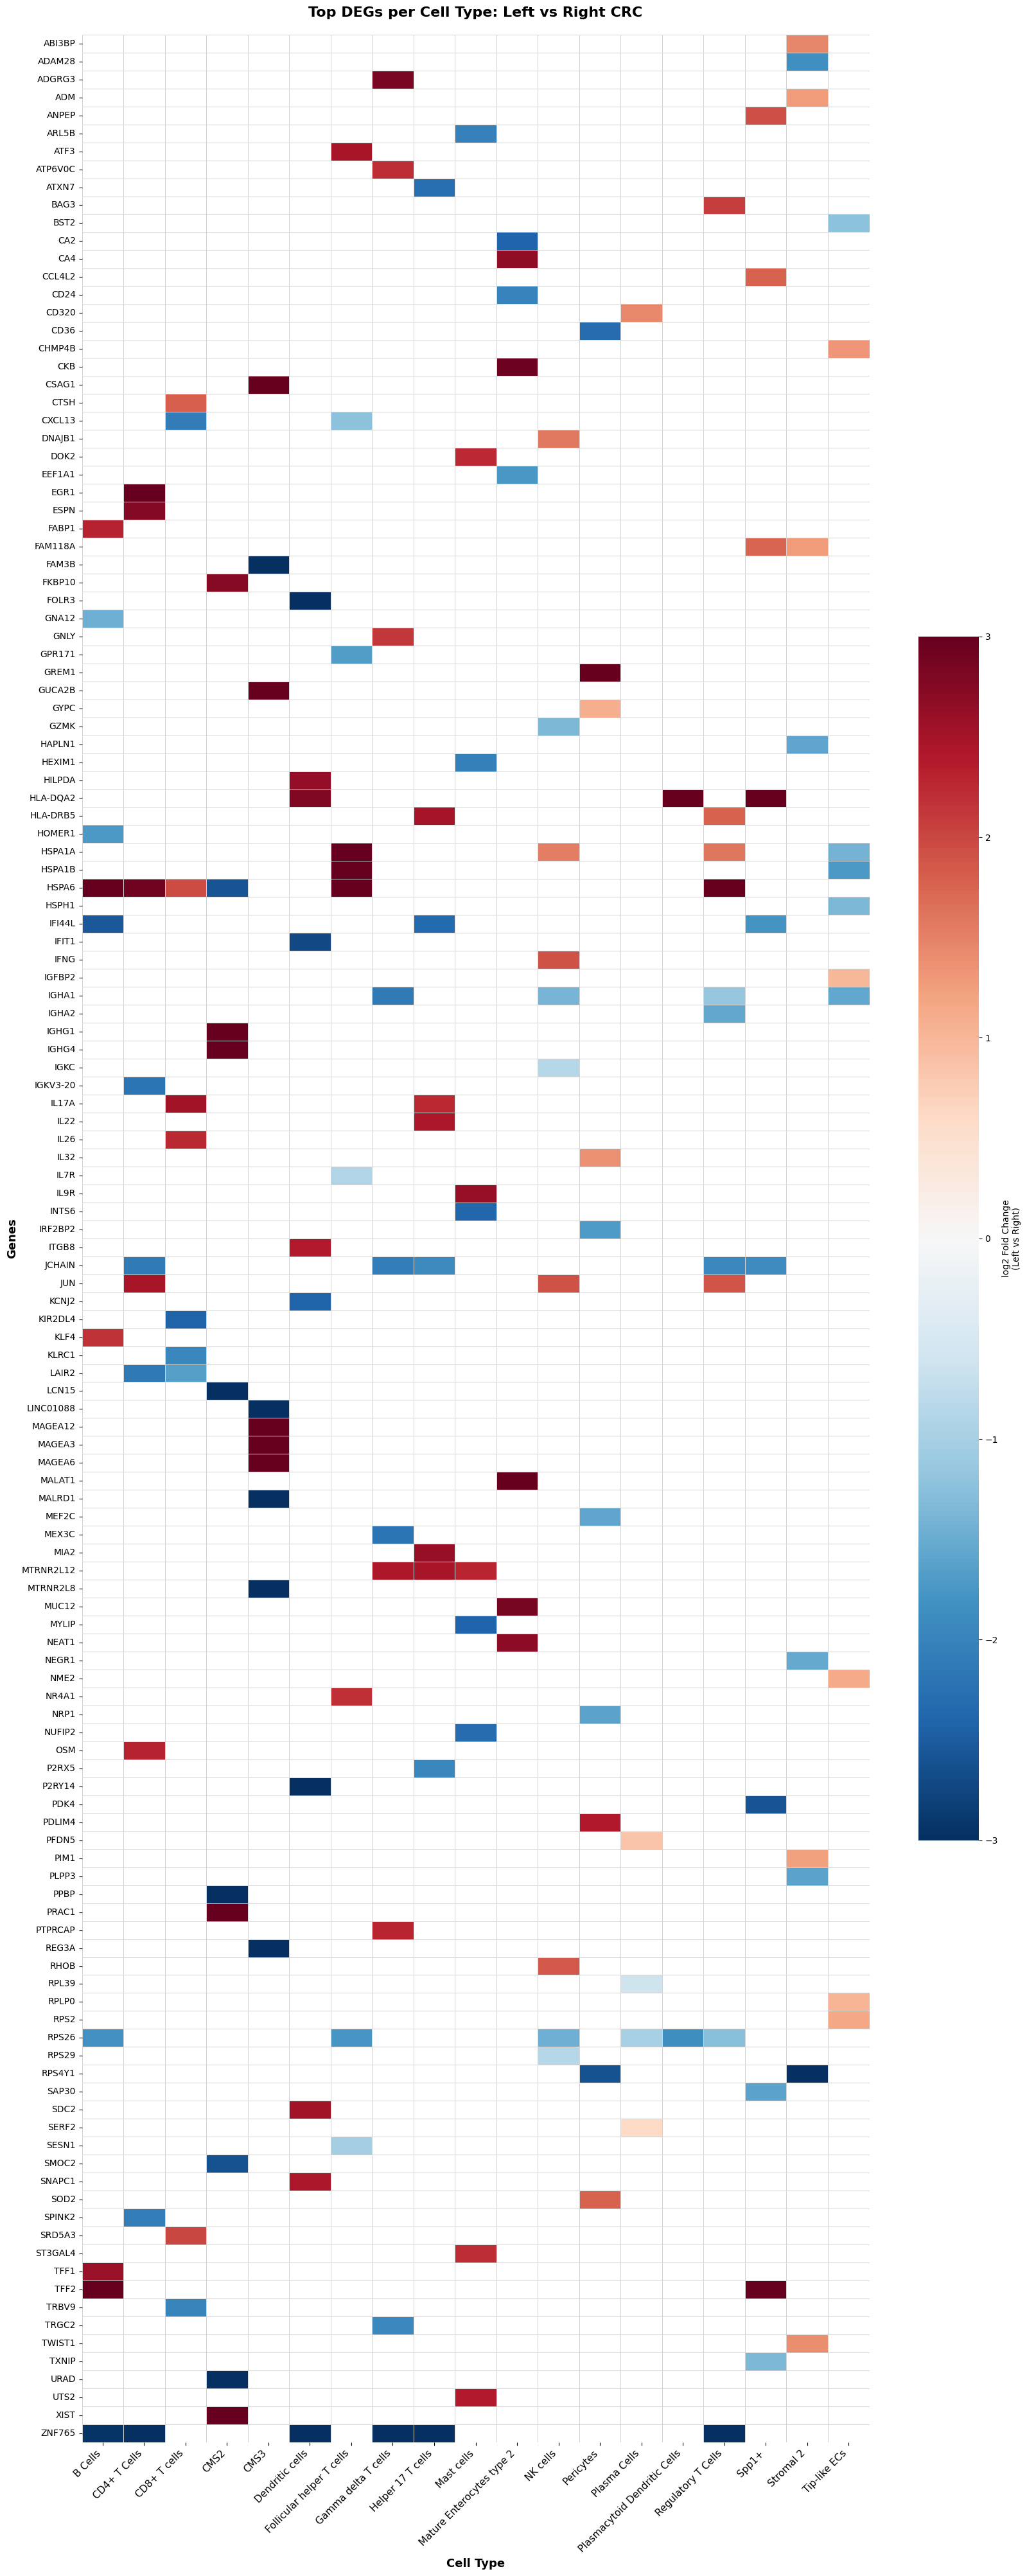


Total unique genes: 134
Cell types: 19

Genes per cell type:
  B Cells: 10 genes
  CD4+ T Cells: 10 genes
  CD8+ T cells: 10 genes
  CMS2: 10 genes
  CMS3: 10 genes
  Dendritic cells: 10 genes
  Follicular helper T cells: 10 genes
  Gamma delta T cells: 10 genes
  Helper 17 T cells: 10 genes
  Mast cells: 10 genes
  Mature Enterocytes type 2: 8 genes
  NK cells: 10 genes
  Pericytes: 10 genes
  Plasma Cells: 5 genes
  Plasmacytoid Dendritic Cells: 2 genes
  Regulatory T Cells: 10 genes
  Spp1+: 10 genes
  Stromal 2: 10 genes
  Tip-like ECs: 10 genes


In [13]:


# Collect top genes for each cell type
top_genes_per_celltype = []

for cell_type in cell_types:
    ct_degs = all_degs[all_degs['Cell_Type'] == cell_type].copy()
    
    # Filter significant genes
    sig_degs = ct_degs[
        (ct_degs['pvals_adj'] < 0.05) & 
        (abs(ct_degs['logfoldchanges']) > 0.5)
    ].copy()
    
    if len(sig_degs) == 0:
        continue
    
    # Get top 5 UP and top 5 DOWN genes
    up_genes = sig_degs[sig_degs['logfoldchanges'] > 0].nlargest(5, 'logfoldchanges')
    down_genes = sig_degs[sig_degs['logfoldchanges'] < 0].nsmallest(5, 'logfoldchanges')
    
    # Combine
    for _, gene in up_genes.iterrows():
        top_genes_per_celltype.append({
            'Gene': gene['names'],
            'Cell_Type': cell_type,
            'log2FC': gene['logfoldchanges']
        })
    
    for _, gene in down_genes.iterrows():
        top_genes_per_celltype.append({
            'Gene': gene['names'],
            'Cell_Type': cell_type,
            'log2FC': gene['logfoldchanges']
        })

# Create dataframe
df_heatmap = pd.DataFrame(top_genes_per_celltype)

# Pivot: Genes as rows, Cell types as columns
heatmap_pivot = df_heatmap.pivot_table(
    index='Gene',
    columns='Cell_Type',
    values='log2FC',
    aggfunc='first'  # In case same gene appears multiple times
)

# Remove genes that appear in too few cell types (optional)
# Keep genes that appear in at least 1 cell type (they all will)
heatmap_pivot = heatmap_pivot.dropna(how='all')

# Create the plot
fig, ax = plt.subplots(figsize=(len(cell_types) * 0.8, len(heatmap_pivot) * 0.3))

# Plot heatmap
sns.heatmap(
    heatmap_pivot,
    cmap='RdBu_r',
    center=0,
    vmin=-3,
    vmax=3,
    cbar_kws={'label': 'log2 Fold Change\n(Left vs Right)', 'shrink': 0.5},
    linewidths=0.5,
    linecolor='lightgray',
    yticklabels=True,
    xticklabels=True,
    ax=ax,
    square=False,
    cbar_ax=None
)

# Formatting
ax.set_title('Top DEGs per Cell Type: Left vs Right CRC', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Cell Type', fontsize=13, fontweight='bold')
ax.set_ylabel('Genes', fontsize=13, fontweight='bold')

# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

plt.tight_layout()
plt.savefig('heatmap_top_genes_all_celltypes.pdf', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTotal unique genes: {len(heatmap_pivot)}")
print(f"Cell types: {len(heatmap_pivot.columns)}")
print(f"\nGenes per cell type:")
for ct in heatmap_pivot.columns:
    n_genes = heatmap_pivot[ct].notna().sum()
    print(f"  {ct}: {n_genes} genes")

Creating heatmap for CD4+ T Cells...
Significant DEGs found: 569
UP genes: 25, DOWN genes: 25
Total genes to plot: 50
Genes found in data: 50/50
Total cells for CD4+ T Cells: 17357
Left: 9704 cells, Right: 7653 cells


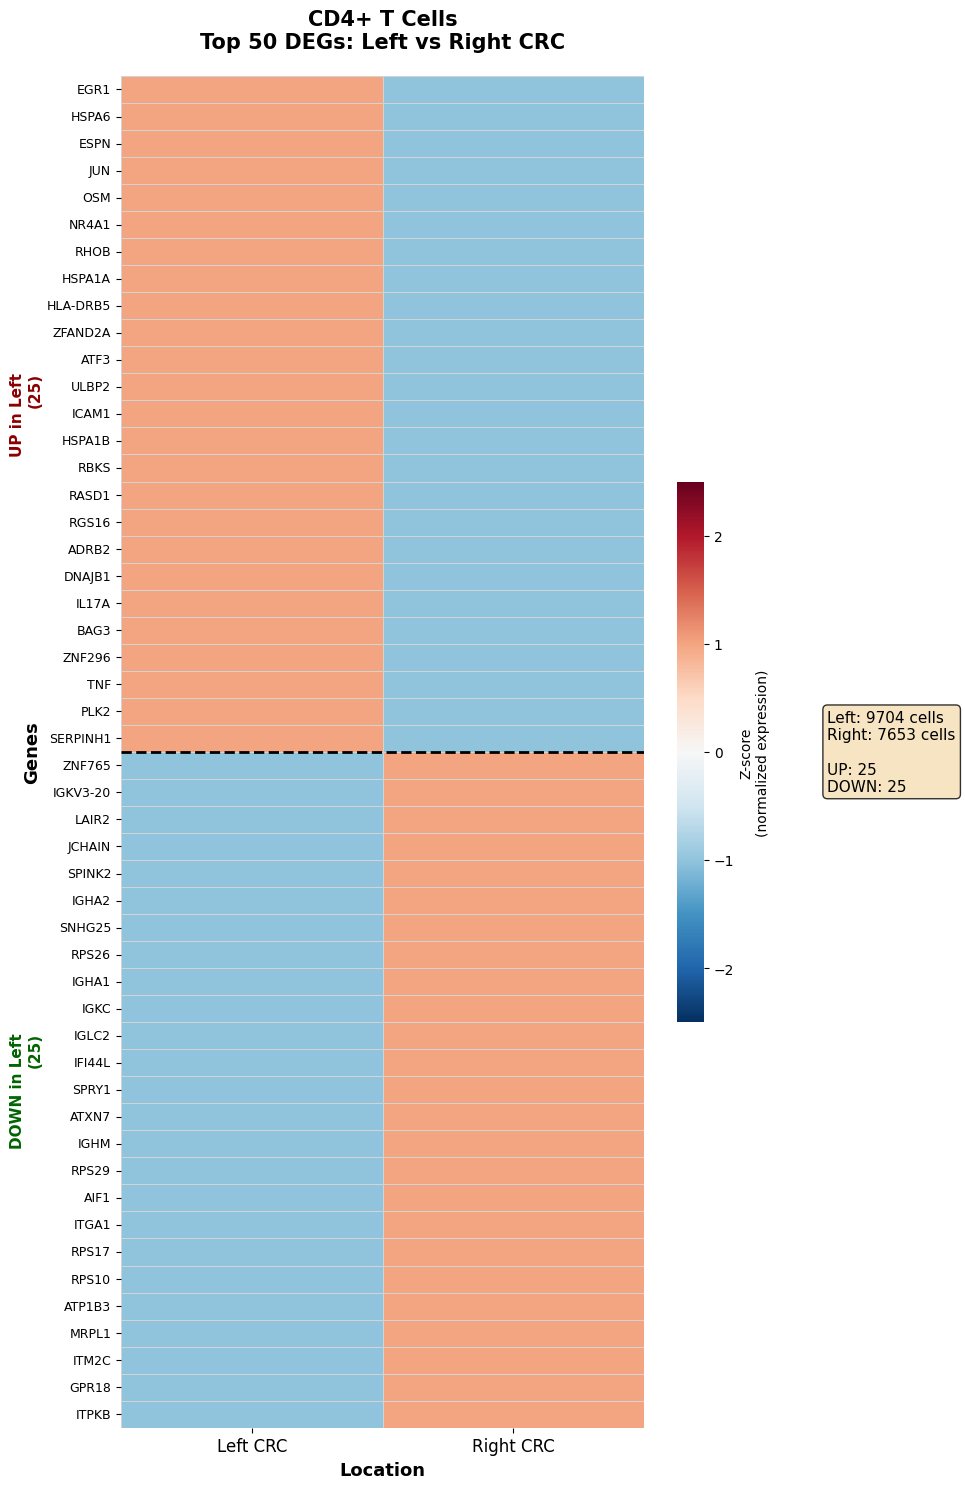

✅ Heatmap created successfully!
Plotted 50 genes


In [14]:


# Specify the cell type
cell_type = 'CD4+ T Cells'

print(f"Creating heatmap for {cell_type}...")

# Get DEGs for this cell type
ct_degs = all_degs[all_degs['Cell_Type'] == cell_type].copy()

# Filter significant genes
sig_degs = ct_degs[
    (ct_degs['pvals_adj'] < 0.05) & 
    (abs(ct_degs['logfoldchanges']) > 0.5)
].copy()

print(f"Significant DEGs found: {len(sig_degs)}")

# Get top 25 UP and top 25 DOWN genes
up_genes = sig_degs[sig_degs['logfoldchanges'] > 0].nlargest(25, 'logfoldchanges')
down_genes = sig_degs[sig_degs['logfoldchanges'] < 0].nsmallest(25, 'logfoldchanges')

print(f"UP genes: {len(up_genes)}, DOWN genes: {len(down_genes)}")

# Combine and get gene list
top_genes = pd.concat([up_genes, down_genes])
gene_list = top_genes['names'].tolist()

print(f"Total genes to plot: {len(gene_list)}")

# Check which genes are in adata
available_genes = [g for g in gene_list if g in adata.var_names]
print(f"Genes found in data: {len(available_genes)}/{len(gene_list)}")

if len(available_genes) == 0:
    print("ERROR: No genes found in adata!")
else:
    # Subset AnnData: first cells, then genes
    cell_mask = adata.obs['Cell_Type'] == cell_type
    adata_celltype = adata[cell_mask, :].copy()
    
    print(f"Total cells for {cell_type}: {adata_celltype.n_obs}")
    
    # Check locations
    n_left = (adata_celltype.obs['location'] == 'Left').sum()
    n_right = (adata_celltype.obs['location'] == 'Right').sum()
    print(f"Left: {n_left} cells, Right: {n_right} cells")
    
    # Subset to available genes
    adata_subset = adata_celltype[:, available_genes].copy()
    
    # Get expression matrix
    if hasattr(adata_subset.X, 'toarray'):
        expr_matrix = adata_subset.X.toarray()
    else:
        expr_matrix = adata_subset.X
    
    expr_df = pd.DataFrame(
        expr_matrix,
        index=adata_subset.obs_names,
        columns=adata_subset.var_names
    )
    
    # Add location
    expr_df['location'] = adata_subset.obs['location'].values
    
    # Separate by location
    left_expr = expr_df[expr_df['location'] == 'Left'].drop('location', axis=1)
    right_expr = expr_df[expr_df['location'] == 'Right'].drop('location', axis=1)
    
    # Calculate mean expression per location
    mean_expr = pd.DataFrame({
        'Left': left_expr.mean(axis=0),
        'Right': right_expr.mean(axis=0)
    })
    
    # Z-score normalize across locations (per gene)
    mean_expr_z = mean_expr.T.apply(stats.zscore, axis=0).T
    
    # Handle NaN (if all values same)
    mean_expr_z = mean_expr_z.fillna(0)
    
    # Order genes by log2FC (UP genes first, then DOWN genes)
    gene_order = []
    for gene in up_genes['names']:
        if gene in mean_expr_z.index:
            gene_order.append(gene)
    for gene in down_genes['names']:
        if gene in mean_expr_z.index:
            gene_order.append(gene)
    
    mean_expr_z_ordered = mean_expr_z.loc[gene_order]
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, max(12, len(gene_order) * 0.3)))
    
    # Plot heatmap
    sns.heatmap(
        mean_expr_z_ordered,
        cmap='RdBu_r',
        center=0,
        vmin=-2.5,
        vmax=2.5,
        cbar_kws={'label': 'Z-score\n(normalized expression)', 'shrink': 0.4},
        linewidths=0.5,
        linecolor='lightgray',
        yticklabels=True,
        xticklabels=True,
        ax=ax
    )
    
    # Formatting
    ax.set_title(f'{cell_type}\nTop {len(gene_order)} DEGs: Left vs Right CRC', 
                 fontsize=15, fontweight='bold', pad=20)
    ax.set_xlabel('Location', fontsize=13, fontweight='bold')
    ax.set_ylabel('Genes', fontsize=13, fontweight='bold')
    
    # X-axis labels
    ax.set_xticklabels(['Left CRC', 'Right CRC'], rotation=0, ha='center', fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
    
    # Add dividing line between UP and DOWN genes
    n_up_in_plot = sum([1 for g in gene_order if g in up_genes['names'].values])
    if n_up_in_plot > 0 and n_up_in_plot < len(gene_order):
        ax.axhline(y=n_up_in_plot, color='black', linewidth=2, linestyle='--')
        
        # Add labels for UP/DOWN sections
        ax.text(-0.3, n_up_in_plot/2, f'UP in Left\n({n_up_in_plot})', 
                rotation=90, va='center', ha='right',
                fontsize=11, fontweight='bold', color='darkred')
        ax.text(-0.3, n_up_in_plot + (len(gene_order)-n_up_in_plot)/2, 
                f'DOWN in Left\n({len(gene_order)-n_up_in_plot})', 
                rotation=90, va='center', ha='right',
                fontsize=11, fontweight='bold', color='darkgreen')
    
    # Add statistics box
    textstr = f'Left: {n_left} cells\nRight: {n_right} cells\n\nUP: {len(up_genes)}\nDOWN: {len(down_genes)}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    ax.text(1.35, 0.5, textstr, transform=ax.transAxes, fontsize=11,
            verticalalignment='center', bbox=props)
    
    plt.tight_layout()
    plt.savefig(f'heatmap_{cell_type.replace(" ", "_").replace("+", "plus")}_top50.pdf', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✅ Heatmap created successfully!")
    print(f"Plotted {len(gene_order)} genes")

Creating heatmap for CD4+ T Cells...
Significant DEGs found: 569
UP genes: 25, DOWN genes: 25
Total genes to plot: 50


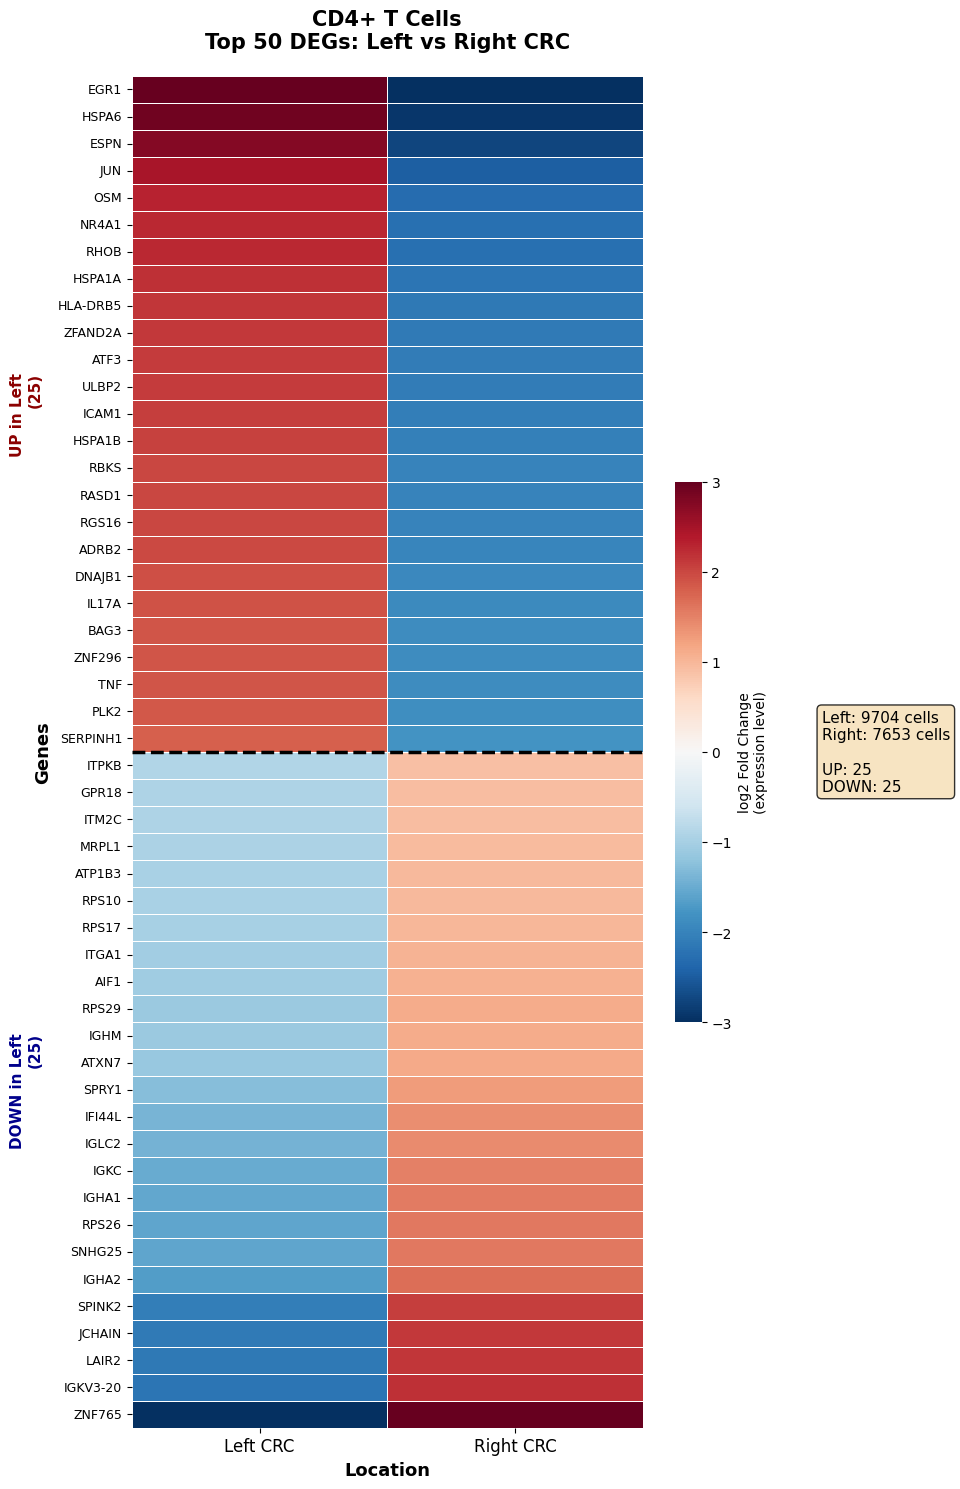

✅ Heatmap created successfully!
Plotted 50 genes

Color legend:
  Dark Red = Highly expressed in that location
  Dark Blue = Lowly expressed in that location
  White/Light = Similar expression between locations


In [15]:


# Specify the cell type
cell_type = 'CD4+ T Cells'

print(f"Creating heatmap for {cell_type}...")

# Get DEGs for this cell type
ct_degs = all_degs[all_degs['Cell_Type'] == cell_type].copy()

# Filter significant genes
sig_degs = ct_degs[
    (ct_degs['pvals_adj'] < 0.05) & 
    (abs(ct_degs['logfoldchanges']) > 0.5)
].copy()

print(f"Significant DEGs found: {len(sig_degs)}")

# Get top 25 UP and top 25 DOWN genes
up_genes = sig_degs[sig_degs['logfoldchanges'] > 0].nlargest(25, 'logfoldchanges')
down_genes = sig_degs[sig_degs['logfoldchanges'] < 0].nsmallest(25, 'logfoldchanges')

print(f"UP genes: {len(up_genes)}, DOWN genes: {len(down_genes)}")

# Combine genes ordered by log2FC (high to low)
top_genes = pd.concat([up_genes, down_genes]).sort_values('logfoldchanges', ascending=False)
gene_list = top_genes['names'].tolist()

print(f"Total genes to plot: {len(gene_list)}")

# Create a dataframe with log2FC values for left and right
# For Left: positive log2FC means UP in left, so we use the log2FC as is
# For Right: we flip the sign (negative of log2FC)
heatmap_data = pd.DataFrame({
    'Left CRC': top_genes.set_index('names')['logfoldchanges'],
    'Right CRC': -top_genes.set_index('names')['logfoldchanges']  # Flip the sign
})

# Reorder by original gene order (high UP to high DOWN)
heatmap_data = heatmap_data.loc[gene_list]

# Count UP and DOWN genes
n_up = len(up_genes)
n_down = len(down_genes)

# Get cell counts (if you want to display them)
cell_mask = adata.obs['Cell_Type'] == cell_type
adata_celltype = adata[cell_mask, :]
n_left = (adata_celltype.obs['location'] == 'Left').sum()
n_right = (adata_celltype.obs['location'] == 'Right').sum()

# Create figure
fig, ax = plt.subplots(figsize=(10, max(12, len(gene_list) * 0.3)))

# Plot heatmap with log2FC values
sns.heatmap(
    heatmap_data,
    cmap='RdBu_r',
    center=0,
    vmin=-3,
    vmax=3,
    cbar_kws={'label': 'log2 Fold Change\n(expression level)', 'shrink': 0.4},
    linewidths=0.5,
    linecolor='white',
    yticklabels=True,
    xticklabels=True,
    ax=ax
)

# Formatting
ax.set_title(f'{cell_type}\nTop {len(gene_list)} DEGs: Left vs Right CRC', 
             fontsize=15, fontweight='bold', pad=20)
ax.set_xlabel('Location', fontsize=13, fontweight='bold')
ax.set_ylabel('Genes', fontsize=13, fontweight='bold')

# X-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)

# Add dividing line between UP and DOWN genes
if n_up > 0 and n_down > 0:
    ax.axhline(y=n_up, color='black', linewidth=2.5, linestyle='--')
    
    # Add labels for UP/DOWN sections
    ax.text(-0.35, n_up/2, f'UP in Left\n({n_up})', 
            rotation=90, va='center', ha='right',
            fontsize=11, fontweight='bold', color='darkred')
    ax.text(-0.35, n_up + n_down/2, 
            f'DOWN in Left\n({n_down})', 
            rotation=90, va='center', ha='right',
            fontsize=11, fontweight='bold', color='darkblue')

# Add statistics box
textstr = f'Left: {n_left} cells\nRight: {n_right} cells\n\nUP: {n_up}\nDOWN: {n_down}'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(1.35, 0.5, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='center', bbox=props)

plt.tight_layout()
plt.savefig(f'heatmap_{cell_type.replace(" ", "_").replace("+", "plus")}_log2FC.pdf', 
            dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Heatmap created successfully!")
print(f"Plotted {len(gene_list)} genes")
print(f"\nColor legend:")
print(f"  Dark Red = Highly expressed in that location")
print(f"  Dark Blue = Lowly expressed in that location")
print(f"  White/Light = Similar expression between locations")

Found 21 cell types
Cell types: ['CD4+ T Cells', 'CMS3', 'Tip-like ECs', 'CD8+ T cells', 'B Cells', 'Spp1+', 'Mast cells', 'Stromal 2', 'CMS2', 'Regulatory T Cells', 'Pericytes', 'Dendritic cells', 'Gamma delta T cells', 'Helper 17 T cells', 'Mature Enterocytes type 2', 'NK cells', 'Plasma Cells', 'Stromal 3', 'Plasmacytoid Dendritic Cells', 'Follicular helper T cells', 'Enteric glia cells']


Processing: CD4+ T Cells
Significant DEGs found: 569
UP genes: 25, DOWN genes: 25
Total genes to plot: 50
Cells: Left=9704, Right=7653


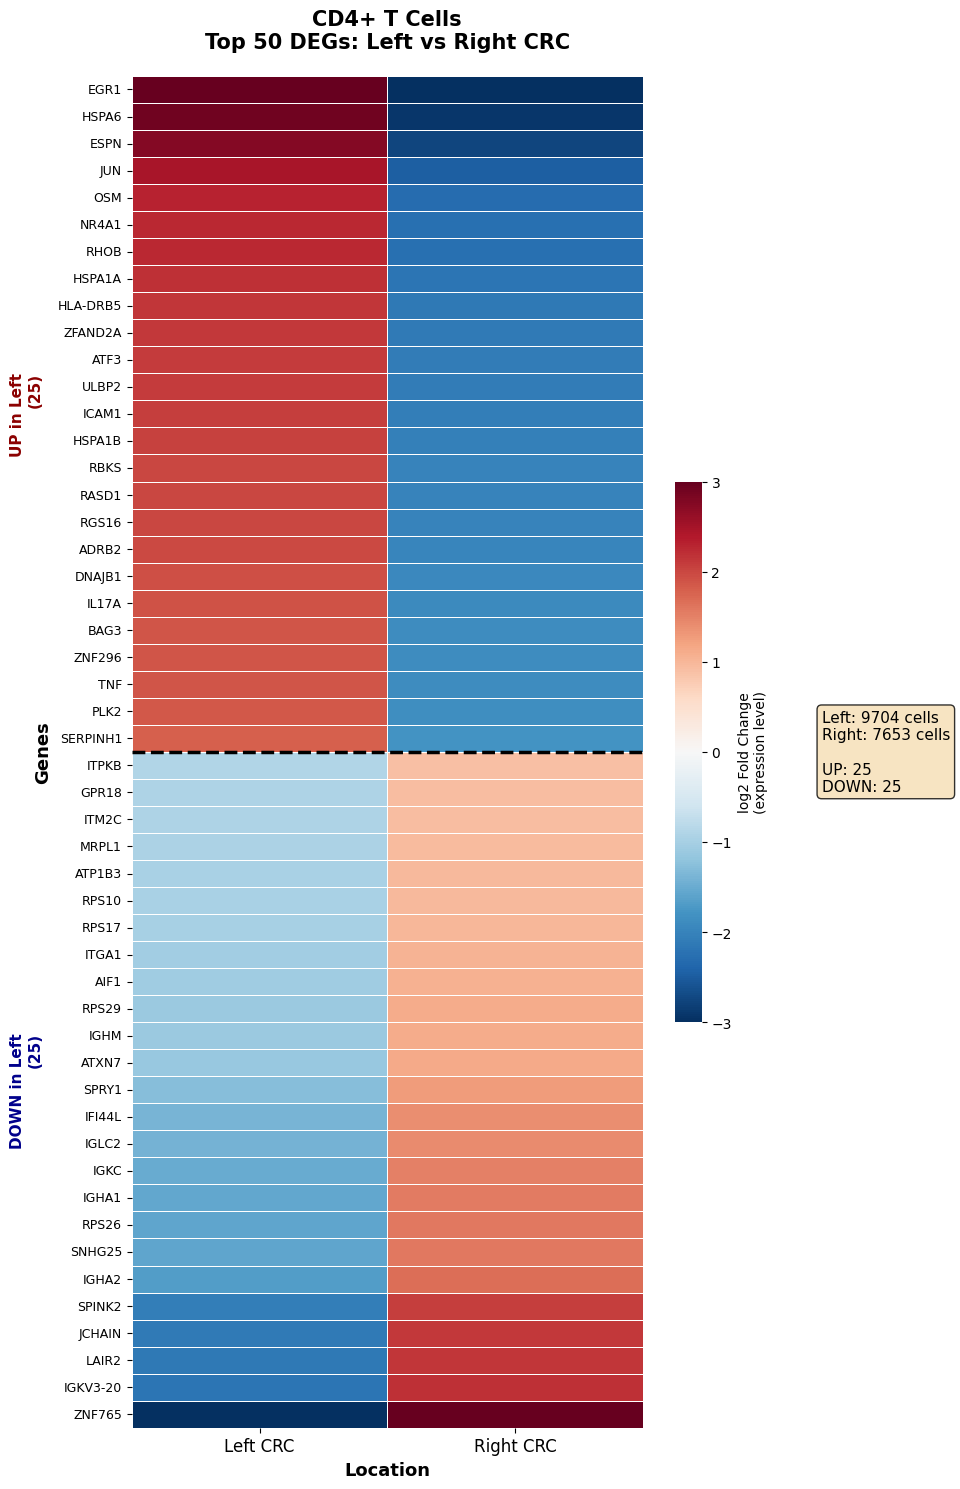

✅ Heatmap saved: heatmap_CD4plus_T_Cells_log2FC.pdf
Plotted 50 genes

Processing: CMS3
Significant DEGs found: 1196
UP genes: 25, DOWN genes: 25
Total genes to plot: 50
Cells: Left=1941, Right=1935


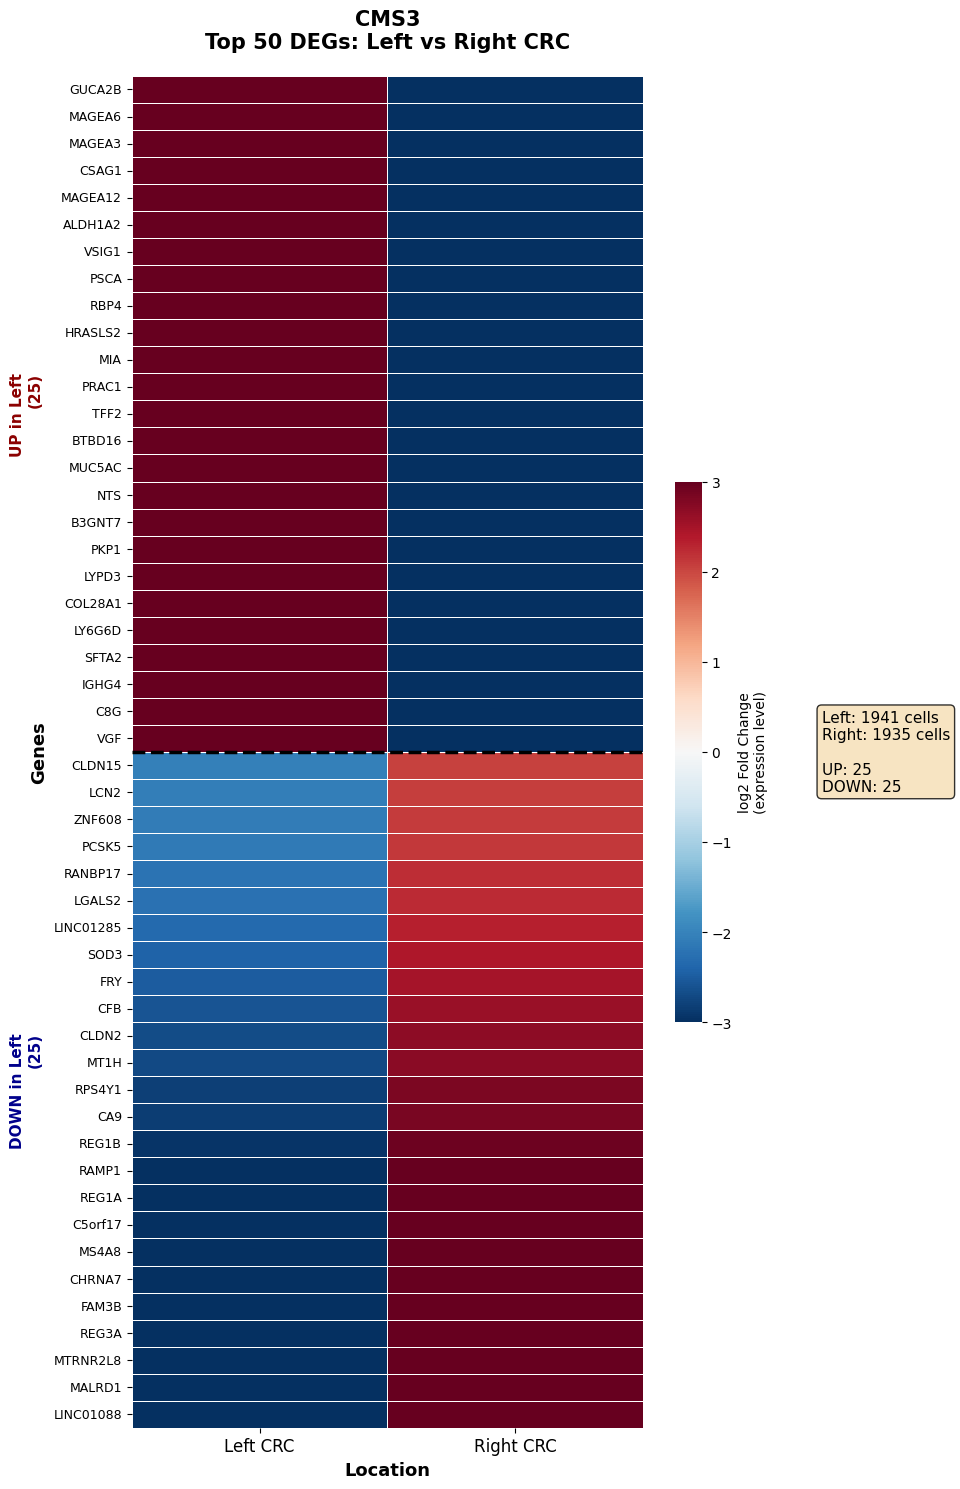

✅ Heatmap saved: heatmap_CMS3_log2FC.pdf
Plotted 50 genes

Processing: Tip-like ECs
Significant DEGs found: 78
UP genes: 25, DOWN genes: 17
Total genes to plot: 42
Cells: Left=235, Right=375


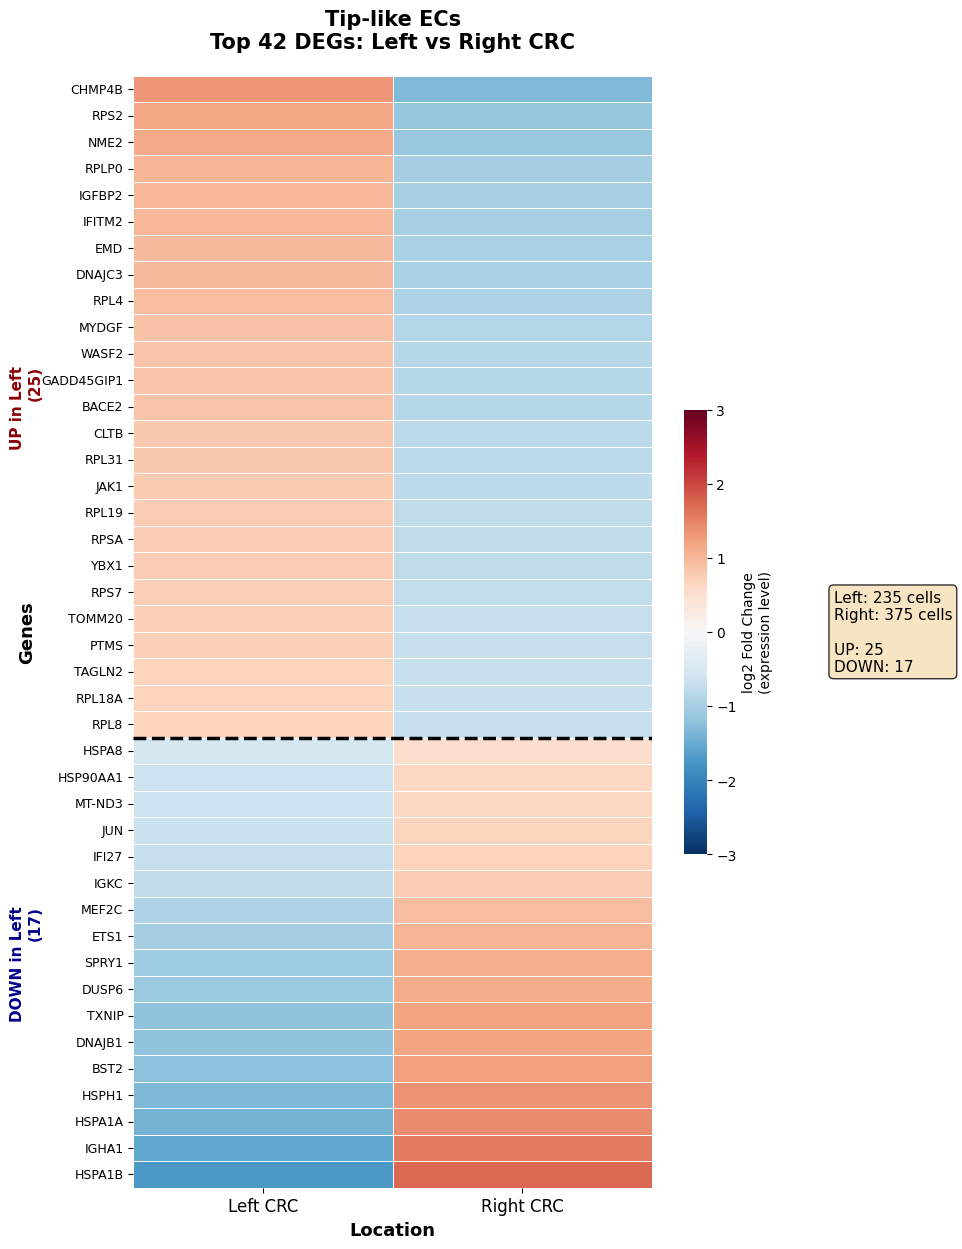

✅ Heatmap saved: heatmap_Tip-like_ECs_log2FC.pdf
Plotted 42 genes

Processing: CD8+ T cells
Significant DEGs found: 356
UP genes: 25, DOWN genes: 25
Total genes to plot: 50
Cells: Left=3783, Right=2893


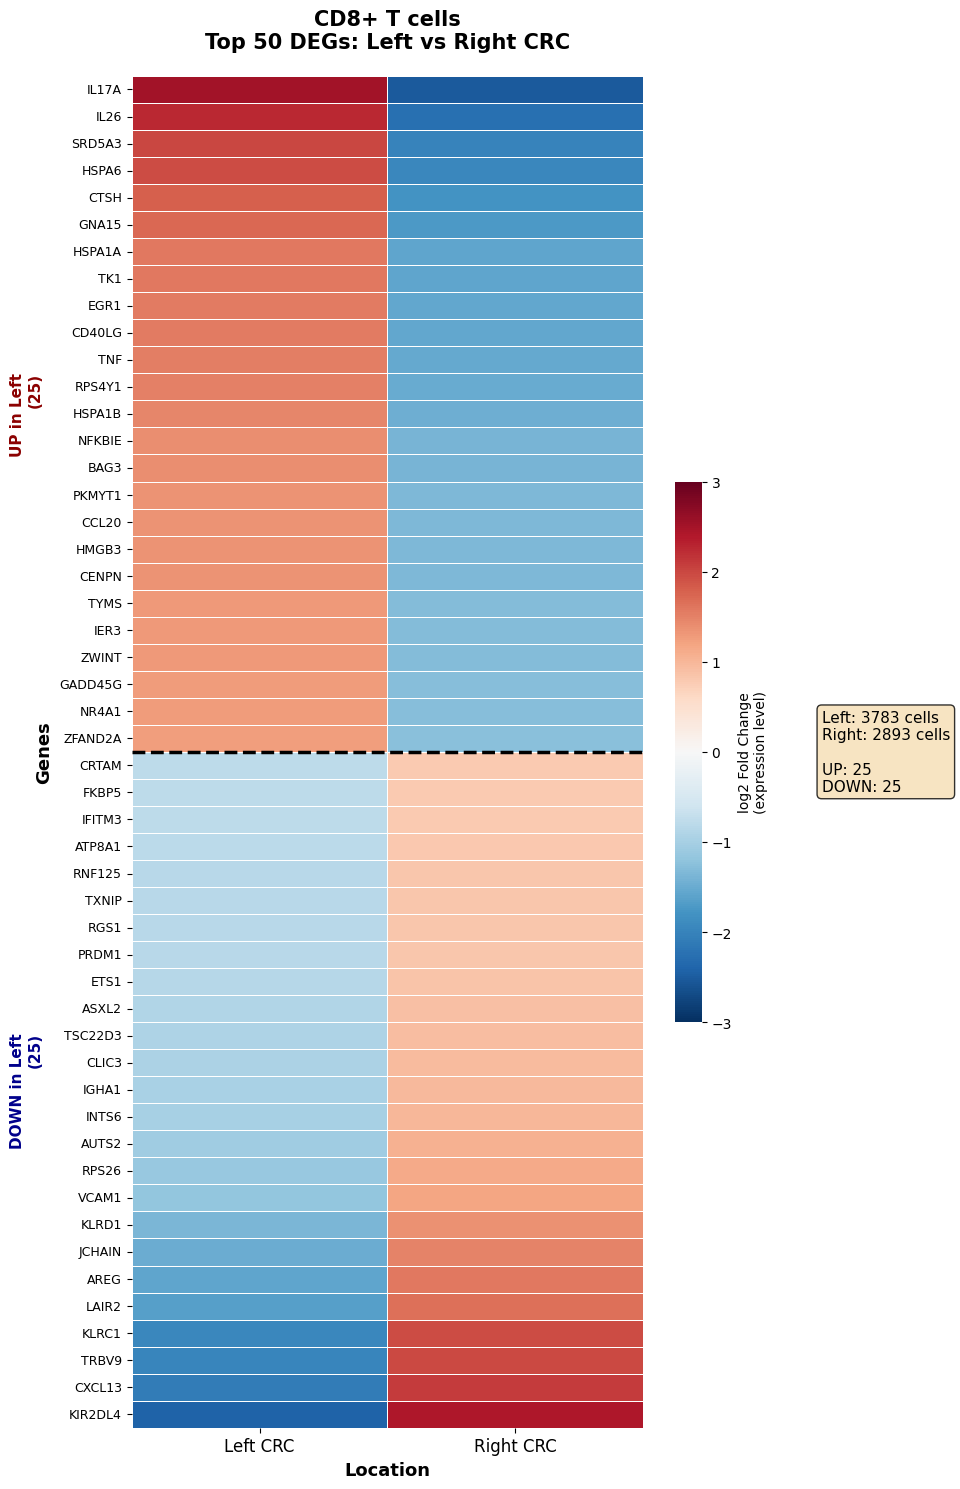

✅ Heatmap saved: heatmap_CD8plus_T_cells_log2FC.pdf
Plotted 50 genes

Processing: B Cells
Significant DEGs found: 397
UP genes: 25, DOWN genes: 25
Total genes to plot: 50
Cells: Left=5631, Right=5143


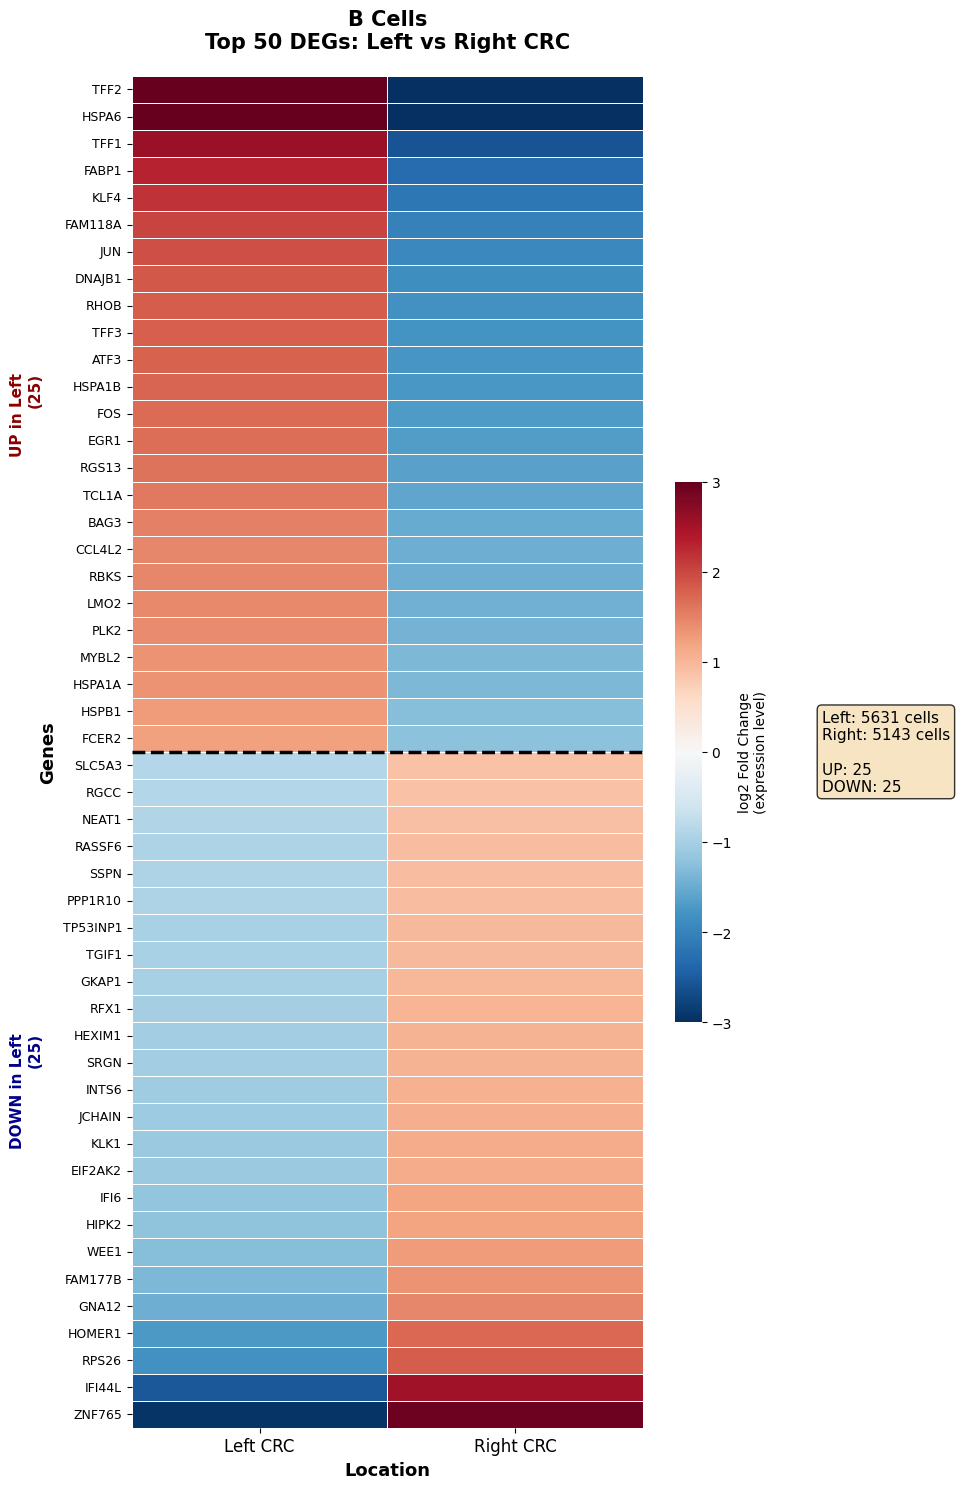

✅ Heatmap saved: heatmap_B_Cells_log2FC.pdf
Plotted 50 genes

Processing: Spp1+
Significant DEGs found: 152
UP genes: 25, DOWN genes: 24
Total genes to plot: 49
Cells: Left=806, Right=828


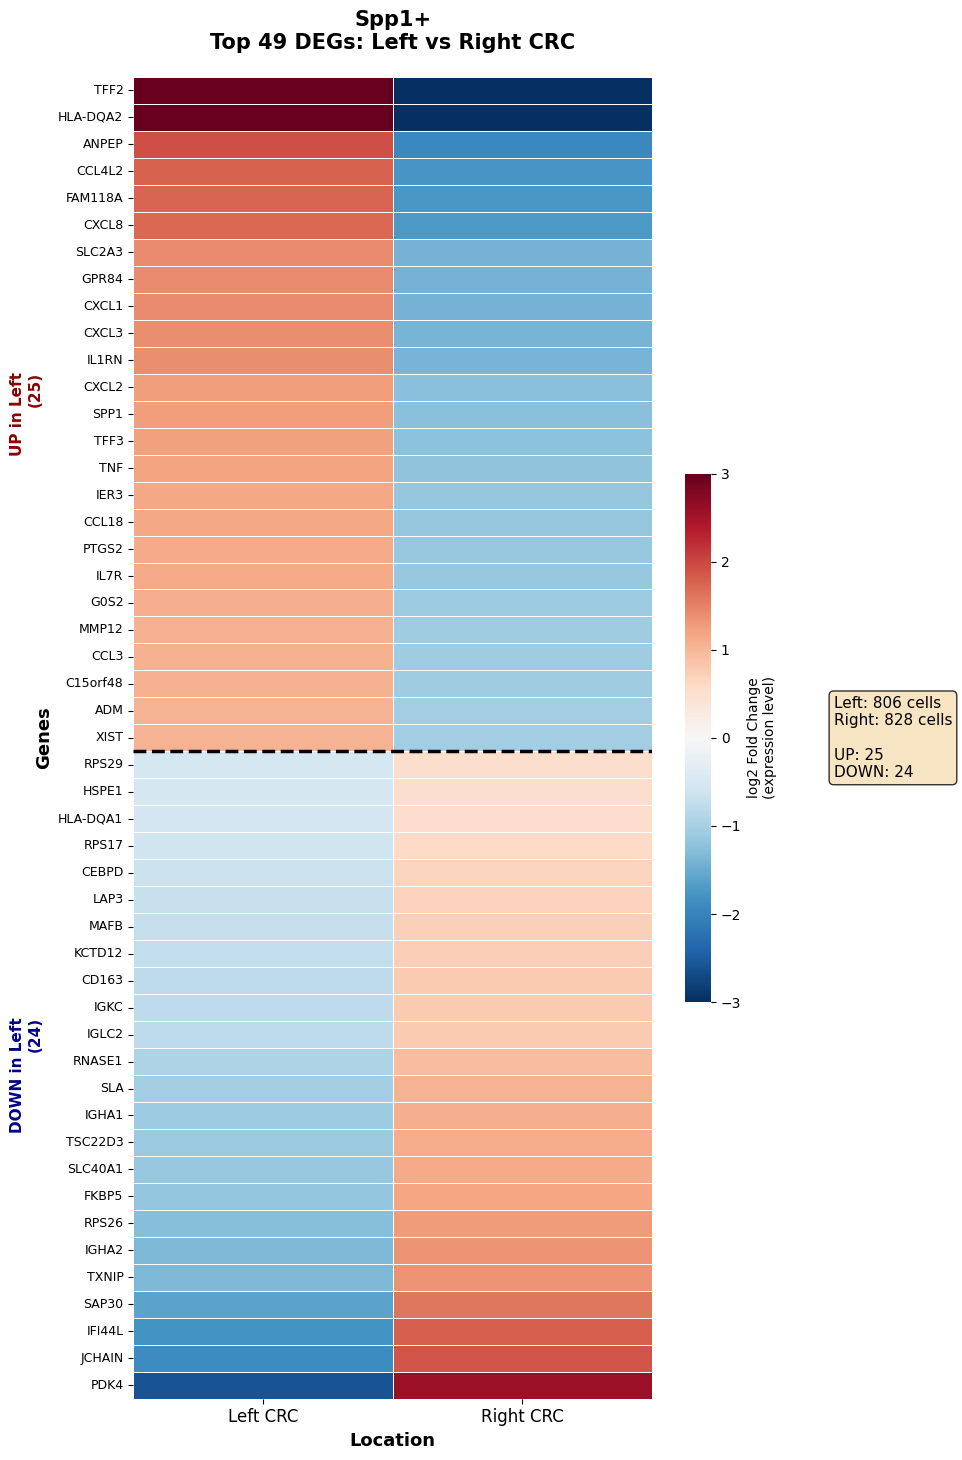

✅ Heatmap saved: heatmap_Spp1plus_log2FC.pdf
Plotted 49 genes

Processing: Mast cells
Significant DEGs found: 458
UP genes: 25, DOWN genes: 25
Total genes to plot: 50
Cells: Left=252, Right=390


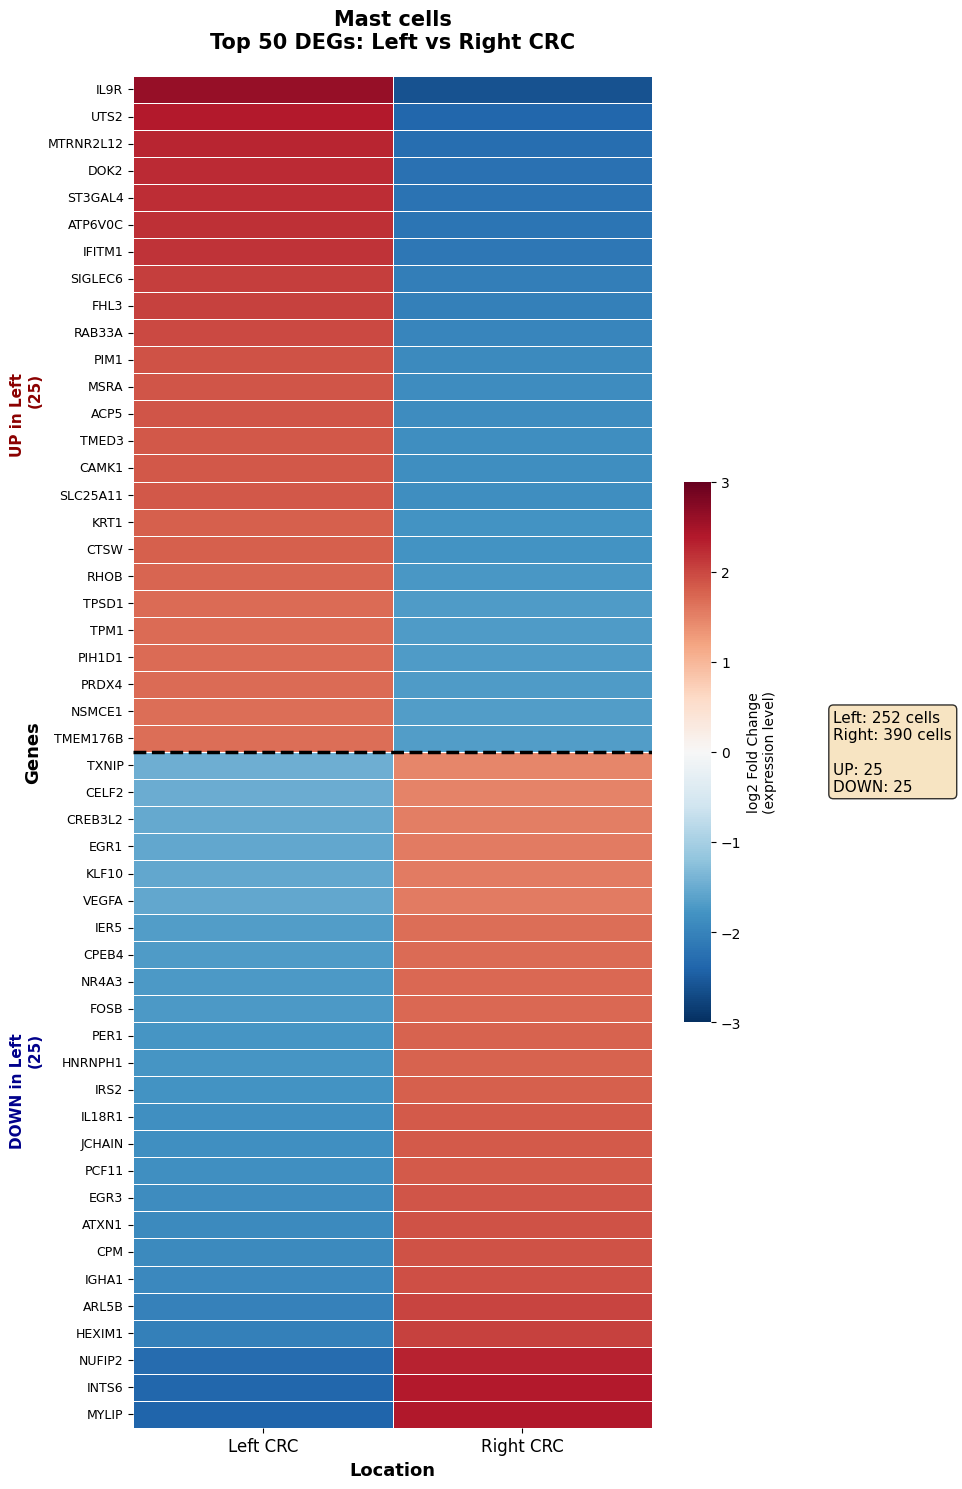

✅ Heatmap saved: heatmap_Mast_cells_log2FC.pdf
Plotted 50 genes

Processing: Stromal 2
Significant DEGs found: 95
UP genes: 25, DOWN genes: 25
Total genes to plot: 50
Cells: Left=438, Right=459


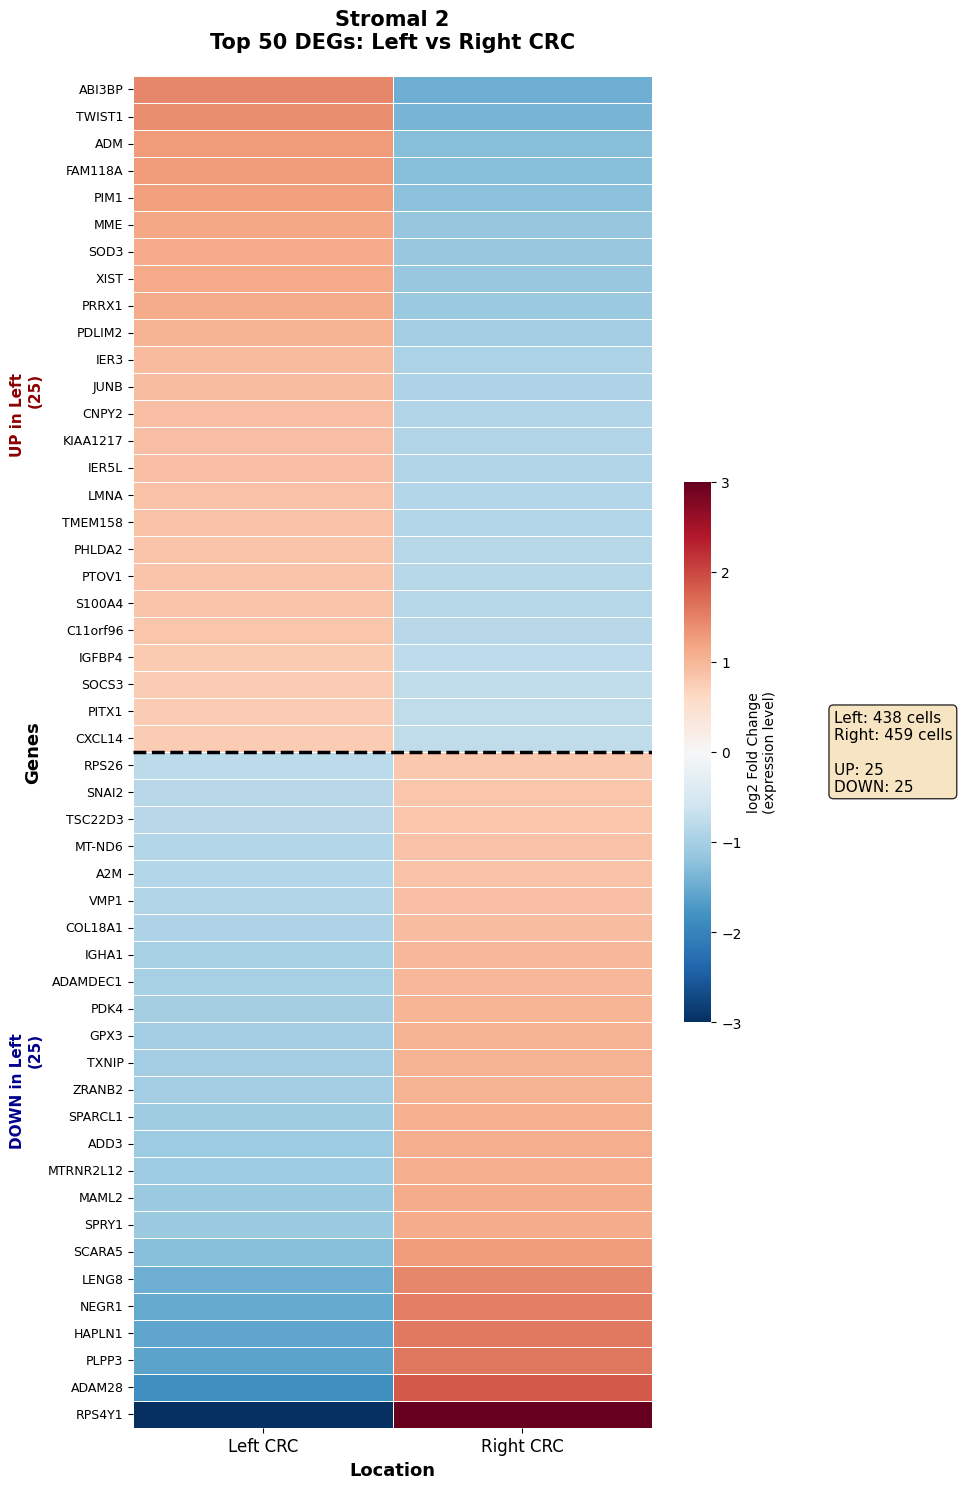

✅ Heatmap saved: heatmap_Stromal_2_log2FC.pdf
Plotted 50 genes

Processing: CMS2
Significant DEGs found: 346
UP genes: 25, DOWN genes: 25
Total genes to plot: 50
Cells: Left=801, Right=991


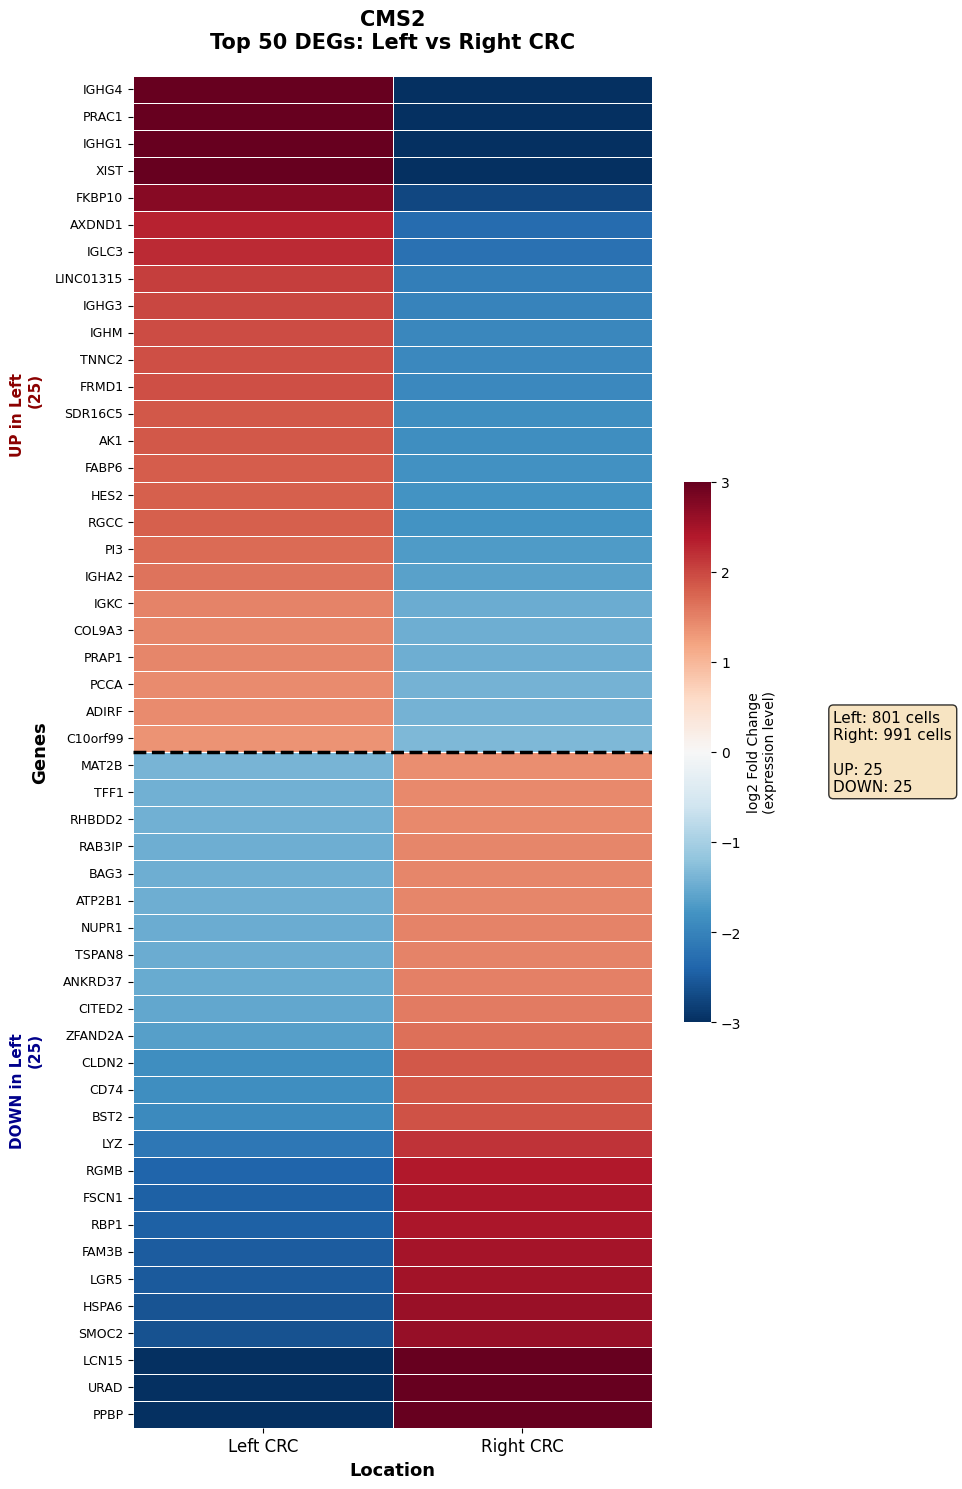

✅ Heatmap saved: heatmap_CMS2_log2FC.pdf
Plotted 50 genes

Processing: Regulatory T Cells
Significant DEGs found: 154
UP genes: 25, DOWN genes: 25
Total genes to plot: 50
Cells: Left=2564, Right=1343


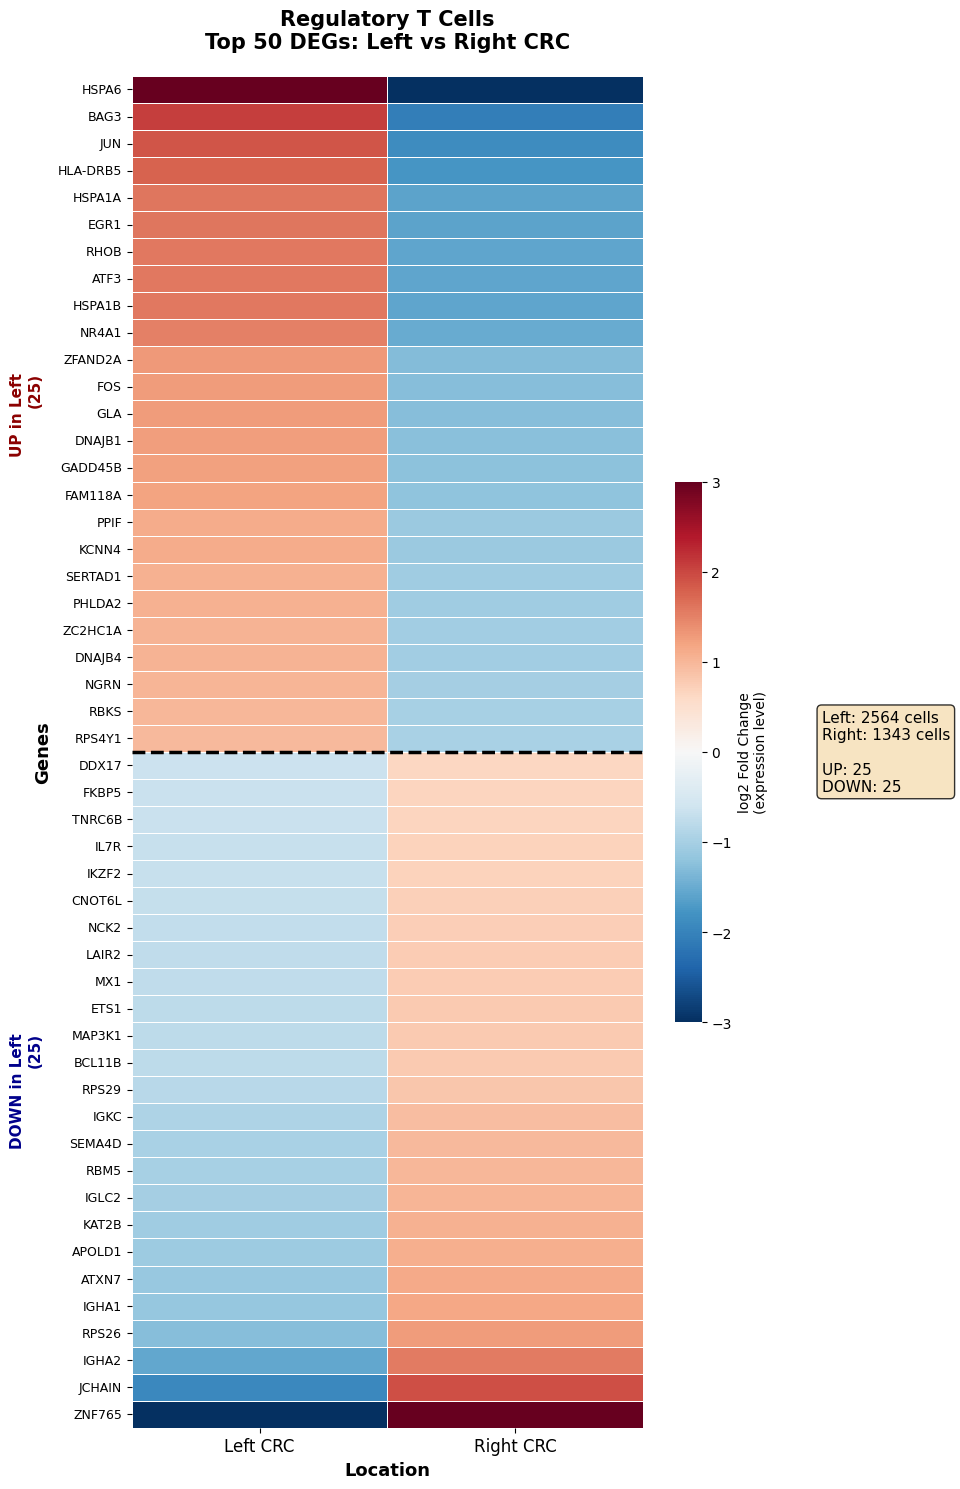

✅ Heatmap saved: heatmap_Regulatory_T_Cells_log2FC.pdf
Plotted 50 genes

Processing: Pericytes
Significant DEGs found: 91
UP genes: 25, DOWN genes: 25
Total genes to plot: 50
Cells: Left=206, Right=251


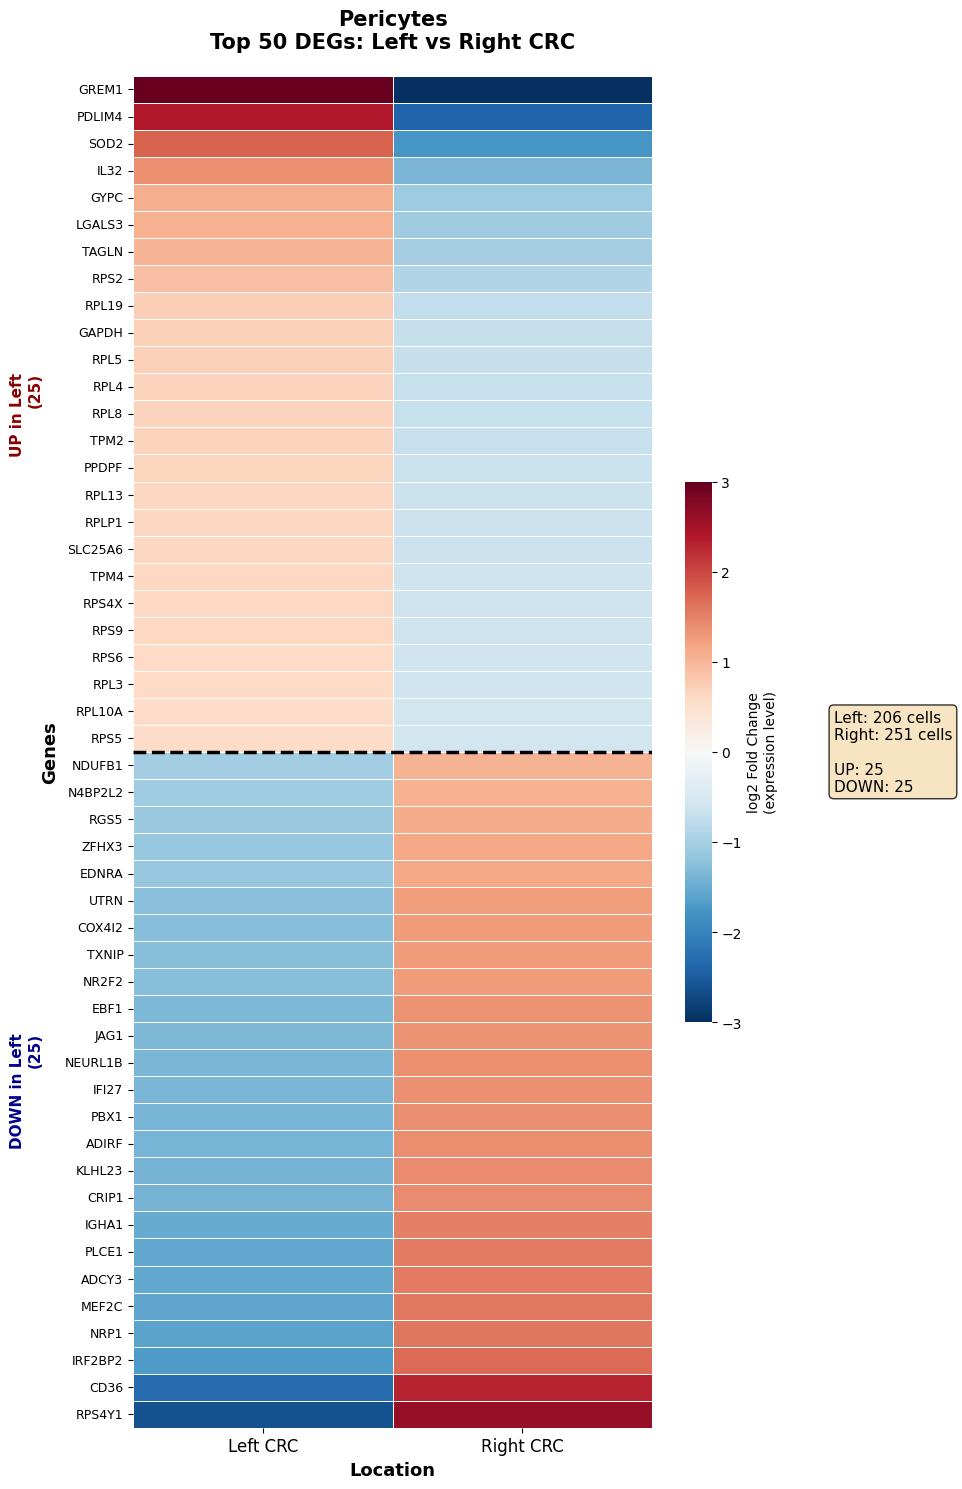

✅ Heatmap saved: heatmap_Pericytes_log2FC.pdf
Plotted 50 genes

Processing: Dendritic cells
Significant DEGs found: 498
UP genes: 25, DOWN genes: 25
Total genes to plot: 50
Cells: Left=1395, Right=710


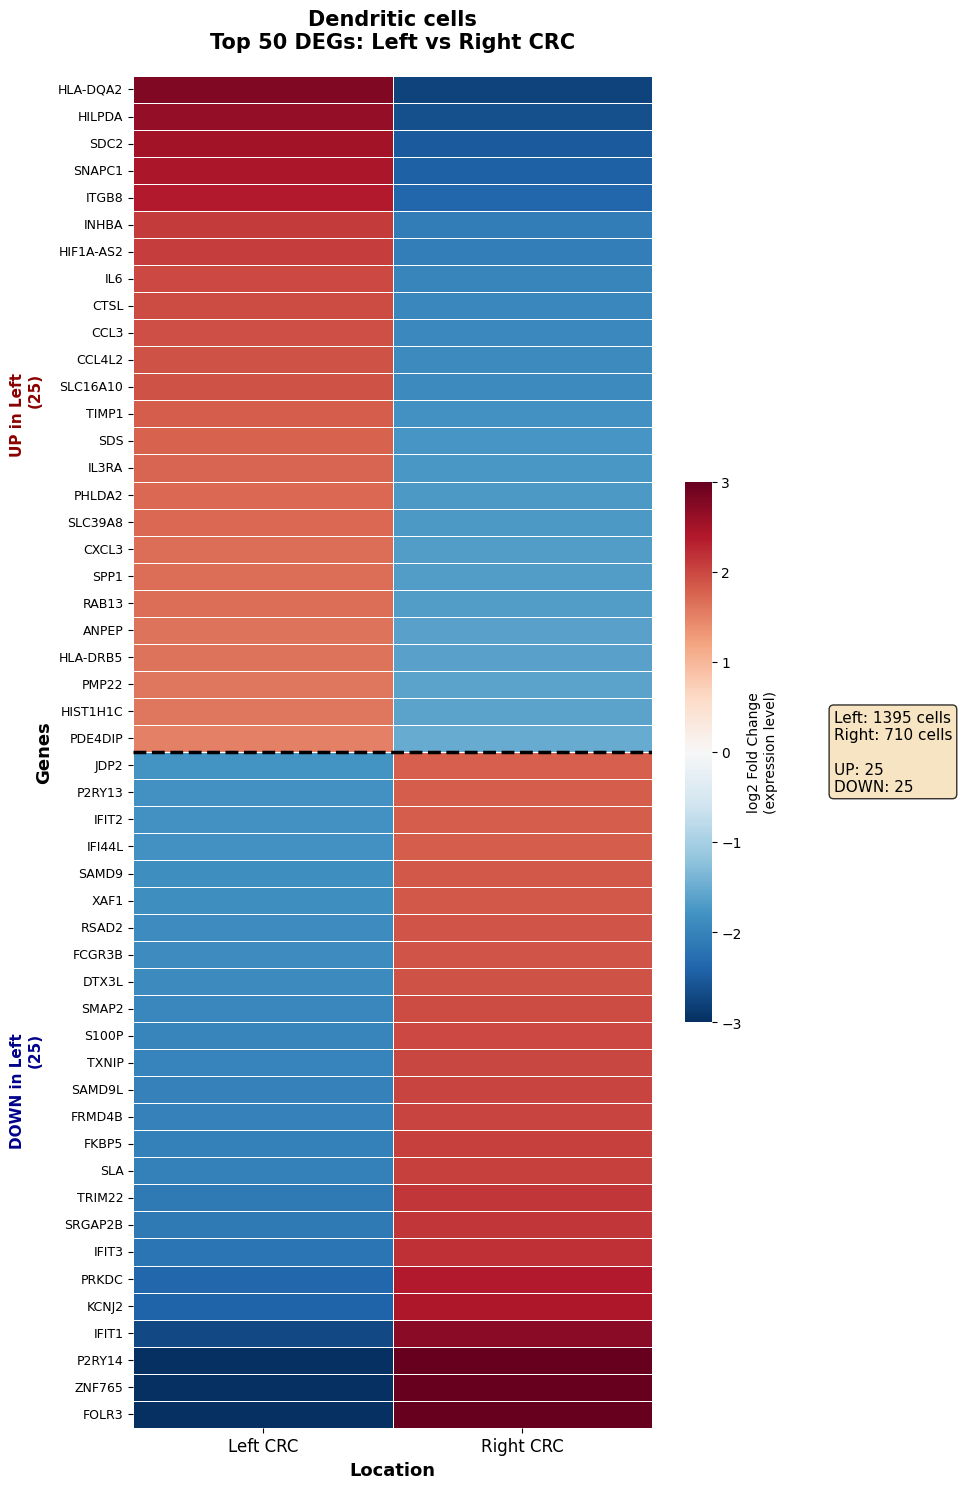

✅ Heatmap saved: heatmap_Dendritic_cells_log2FC.pdf
Plotted 50 genes

Processing: Gamma delta T cells
Significant DEGs found: 429
UP genes: 25, DOWN genes: 25
Total genes to plot: 50
Cells: Left=861, Right=475


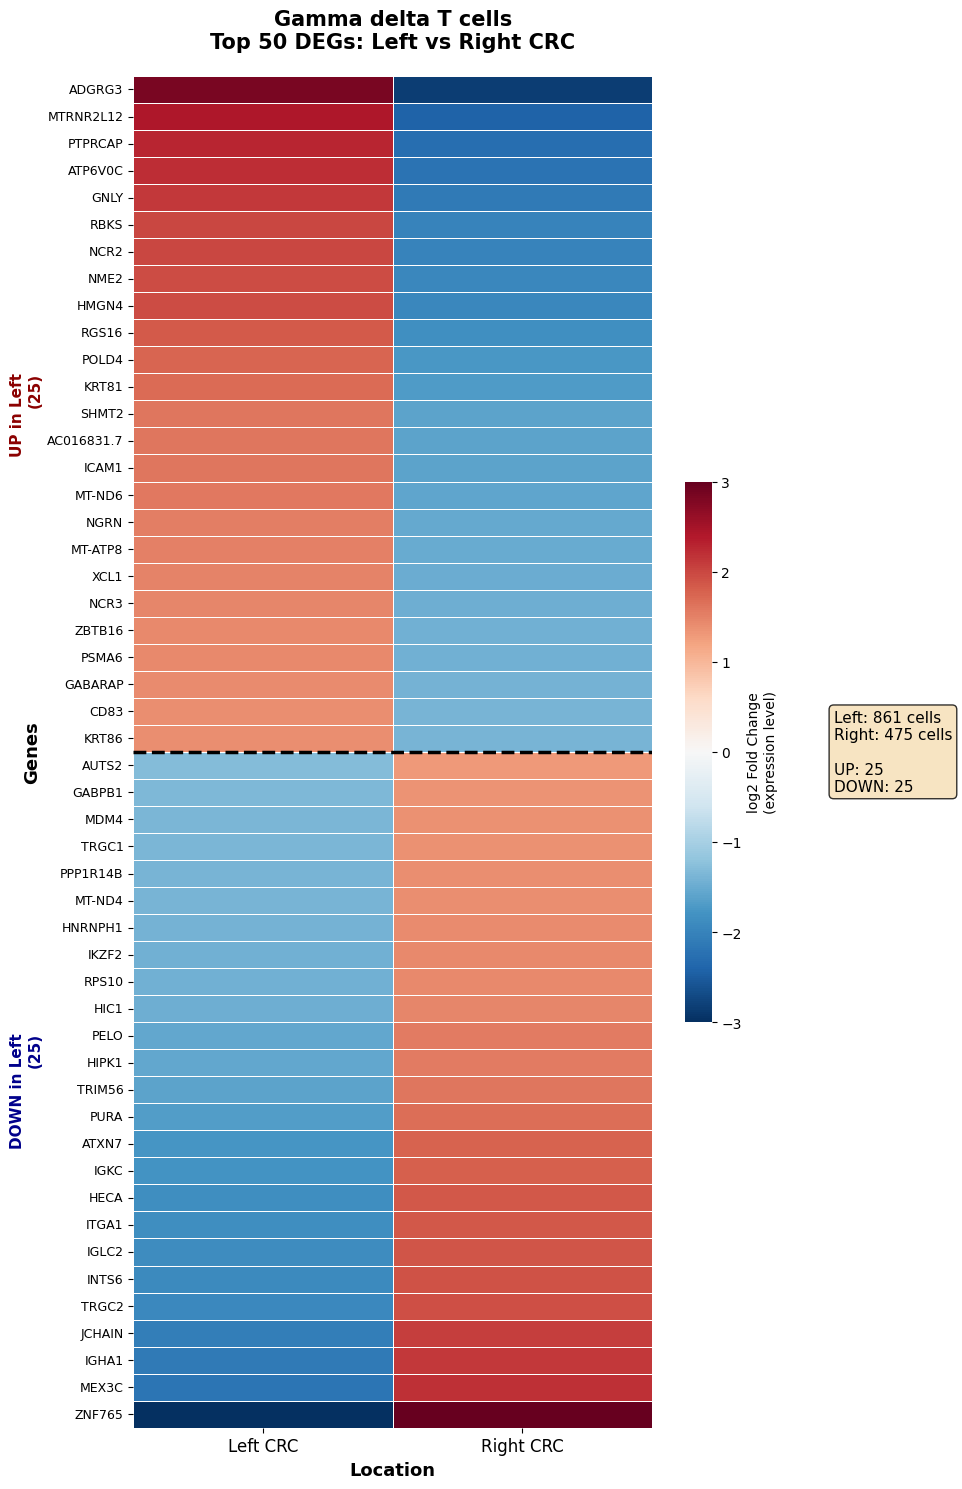

✅ Heatmap saved: heatmap_Gamma_delta_T_cells_log2FC.pdf
Plotted 50 genes

Processing: Helper 17 T cells
Significant DEGs found: 524
UP genes: 25, DOWN genes: 25
Total genes to plot: 50
Cells: Left=1911, Right=466


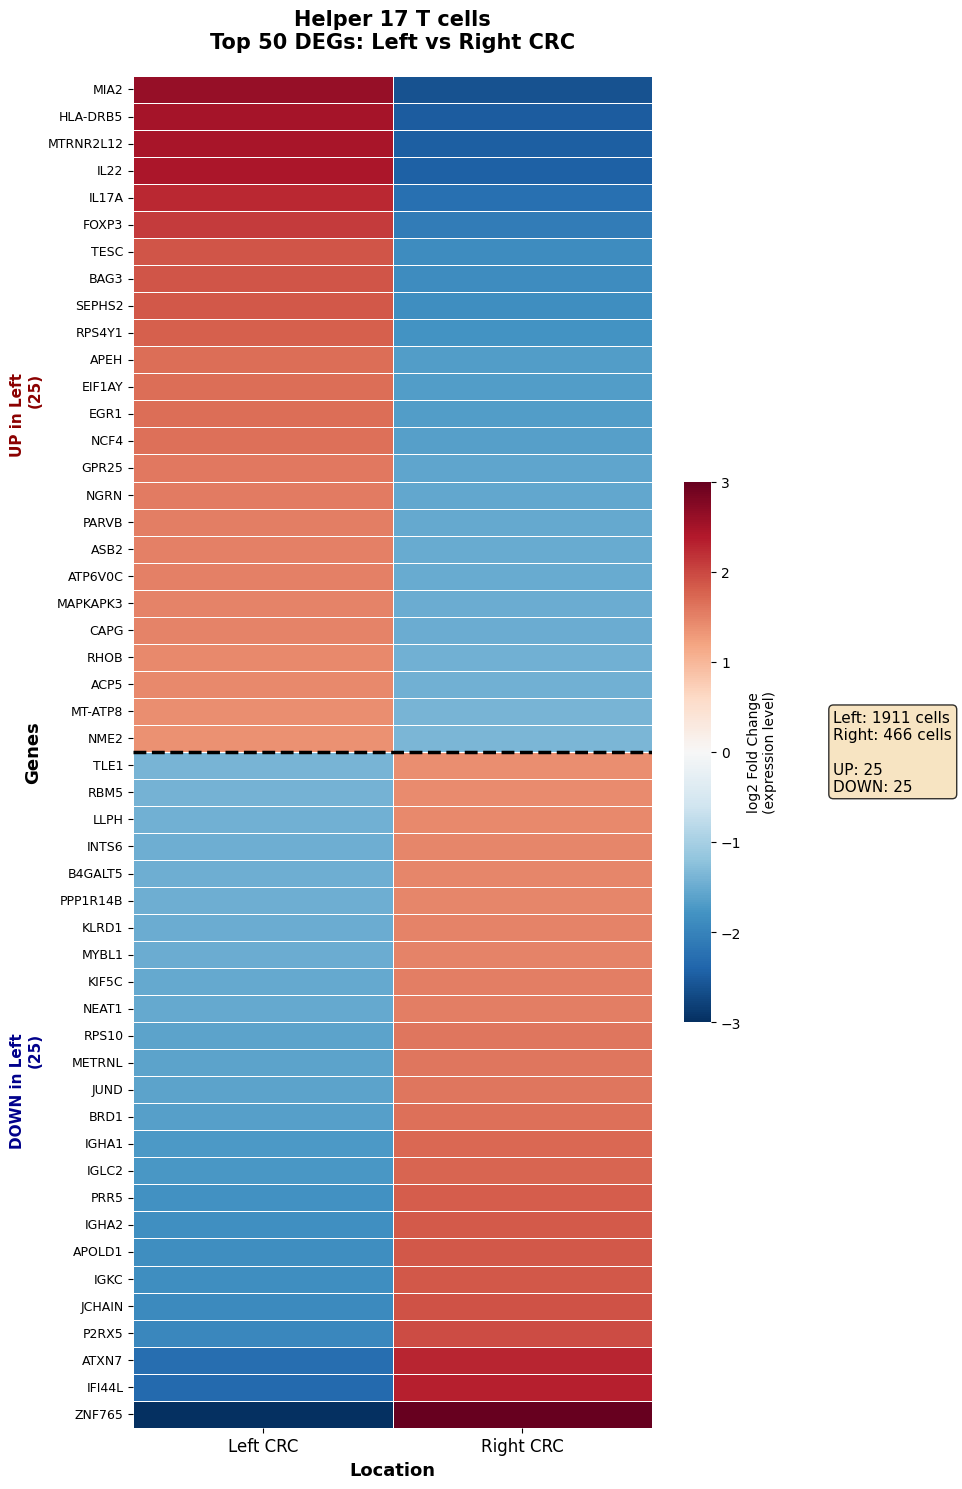

✅ Heatmap saved: heatmap_Helper_17_T_cells_log2FC.pdf
Plotted 50 genes

Processing: Mature Enterocytes type 2
Significant DEGs found: 21
UP genes: 18, DOWN genes: 3
Total genes to plot: 21
Cells: Left=157, Right=169


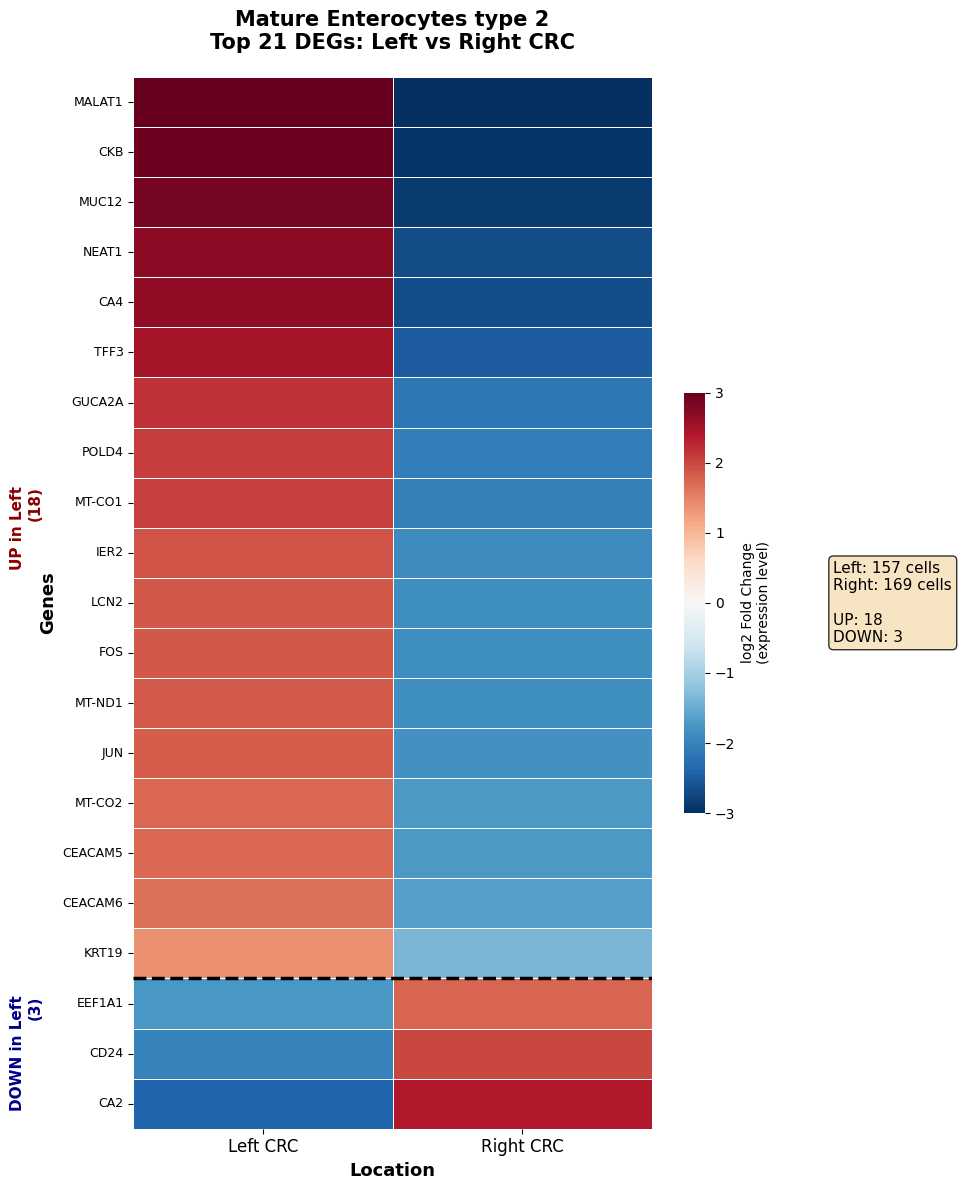

✅ Heatmap saved: heatmap_Mature_Enterocytes_type_2_log2FC.pdf
Plotted 21 genes

Processing: NK cells
Significant DEGs found: 63
UP genes: 25, DOWN genes: 10
Total genes to plot: 35
Cells: Left=841, Right=479


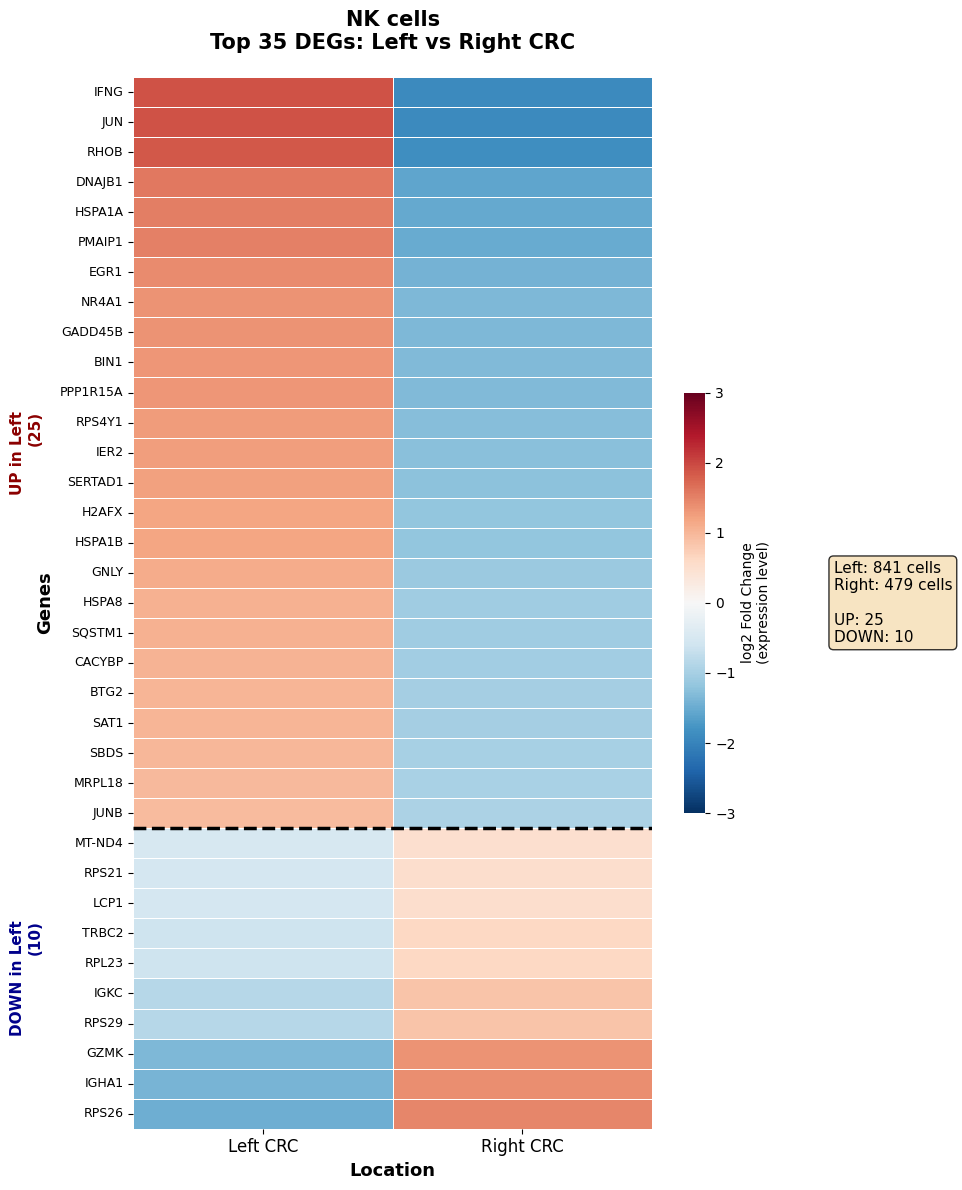

✅ Heatmap saved: heatmap_NK_cells_log2FC.pdf
Plotted 35 genes

Processing: Plasma Cells
Significant DEGs found: 5
UP genes: 3, DOWN genes: 2
Total genes to plot: 5
Cells: Left=170, Right=70


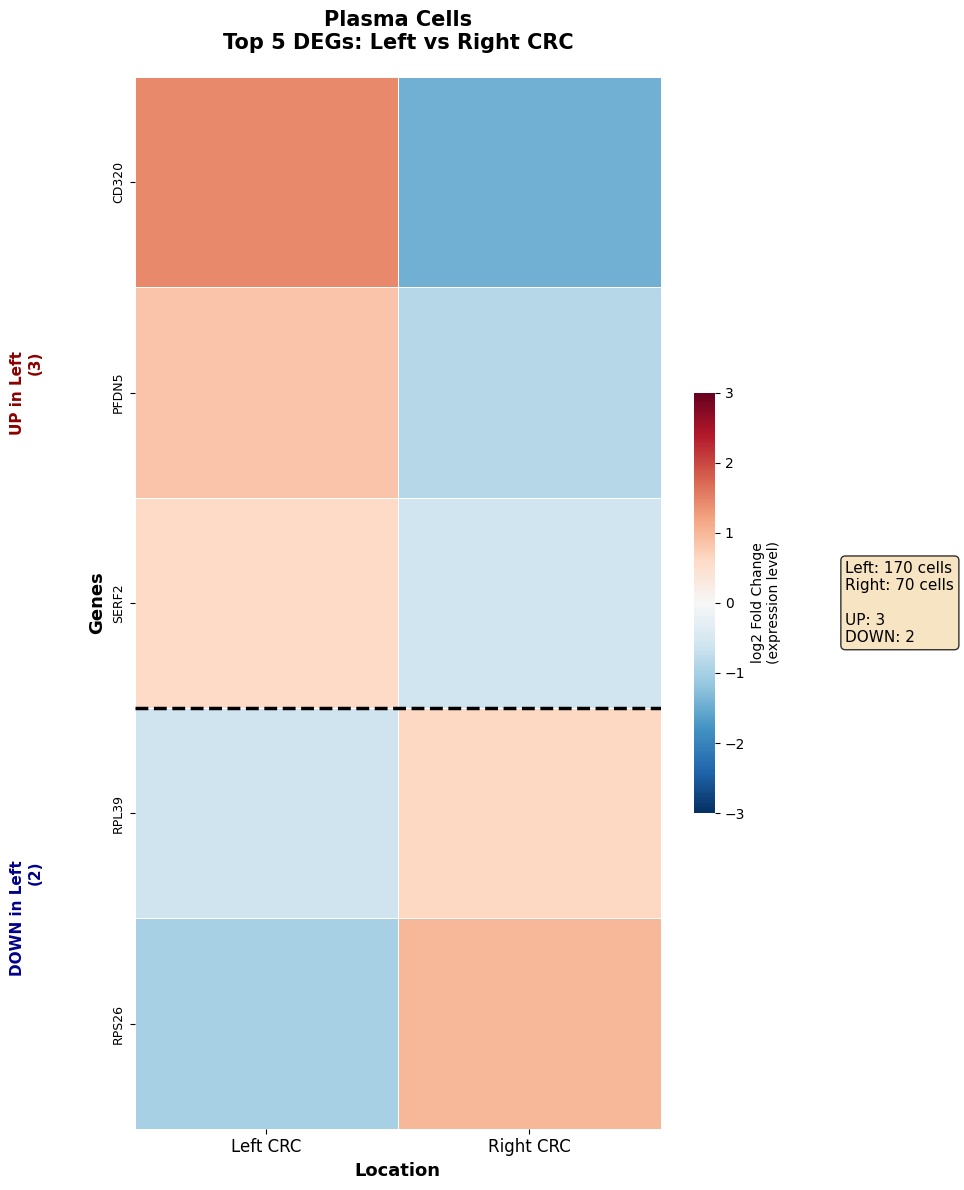

✅ Heatmap saved: heatmap_Plasma_Cells_log2FC.pdf
Plotted 5 genes

Processing: Stromal 3
Significant DEGs found: 0
❌ No significant DEGs for Stromal 3, skipping...

Processing: Plasmacytoid Dendritic Cells
Significant DEGs found: 2
UP genes: 1, DOWN genes: 1
Total genes to plot: 2
Cells: Left=62, Right=27


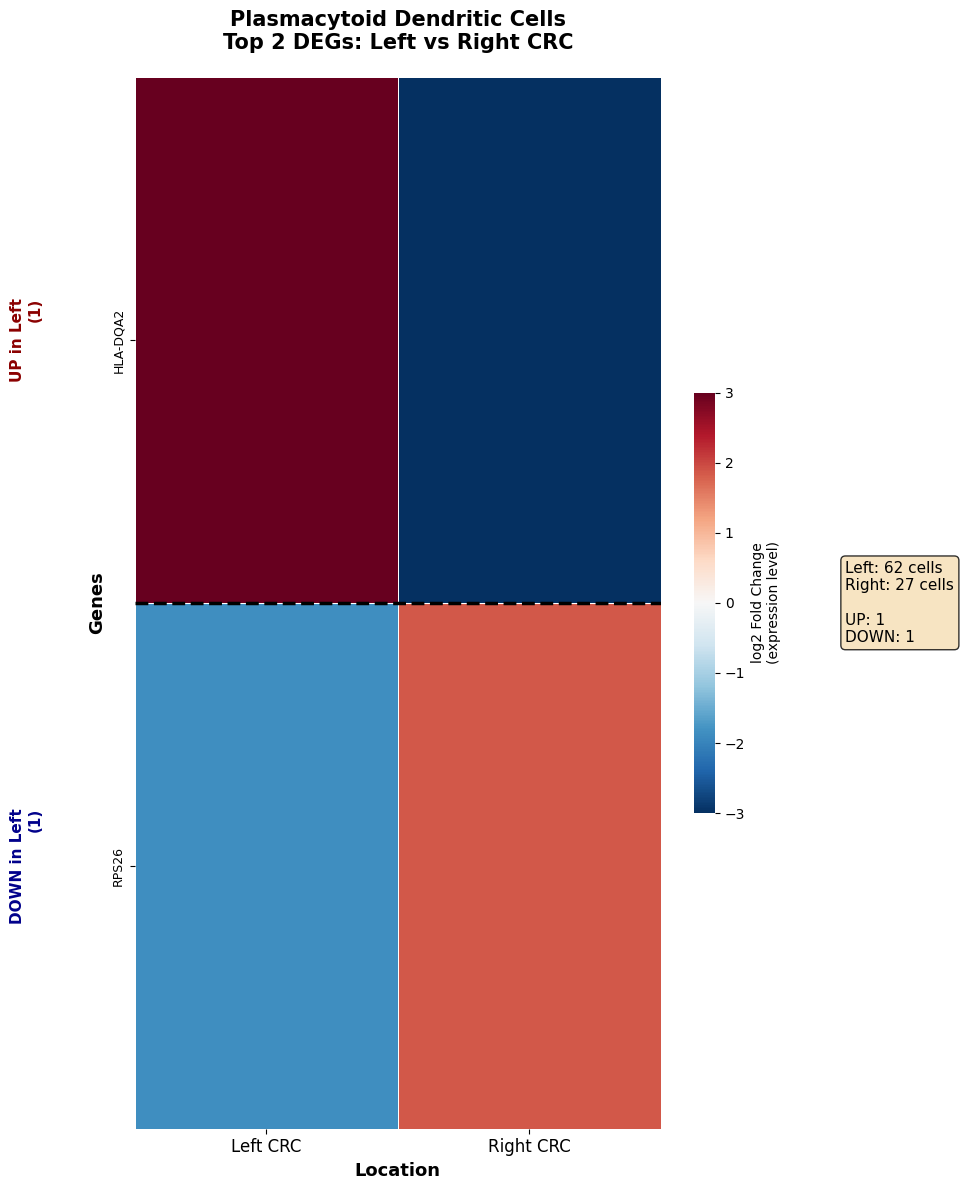

✅ Heatmap saved: heatmap_Plasmacytoid_Dendritic_Cells_log2FC.pdf
Plotted 2 genes

Processing: Follicular helper T cells
Significant DEGs found: 84
UP genes: 25, DOWN genes: 15
Total genes to plot: 40
Cells: Left=523, Right=963


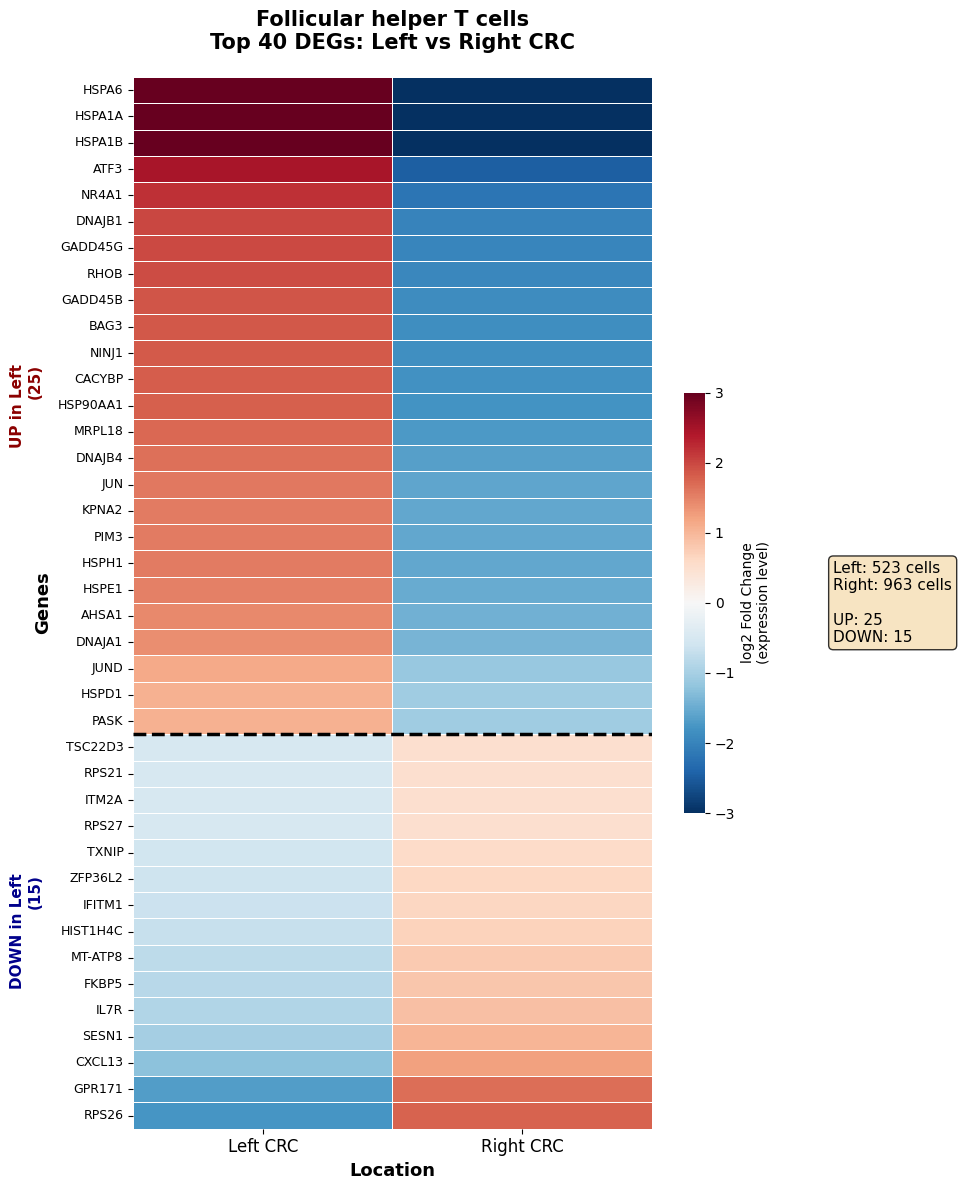

✅ Heatmap saved: heatmap_Follicular_helper_T_cells_log2FC.pdf
Plotted 40 genes

Processing: Enteric glia cells
Significant DEGs found: 0
❌ No significant DEGs for Enteric glia cells, skipping...

✅ ALL HEATMAPS COMPLETED!


In [17]:
# Get all unique cell types
cell_types = all_degs['Cell_Type'].unique()

print(f"Found {len(cell_types)} cell types")
print(f"Cell types: {list(cell_types)}\n")

# Loop through each cell type
for cell_type in cell_types:
    print(f"\n{'='*60}")
    print(f"Processing: {cell_type}")
    print(f"{'='*60}")
    
    # Get DEGs for this cell type
    ct_degs = all_degs[all_degs['Cell_Type'] == cell_type].copy()
    
    # Filter significant genes
    sig_degs = ct_degs[
        (ct_degs['pvals_adj'] < 0.05) & 
        (abs(ct_degs['logfoldchanges']) > 0.5)
    ].copy()
    
    print(f"Significant DEGs found: {len(sig_degs)}")
    
    if len(sig_degs) == 0:
        print(f"❌ No significant DEGs for {cell_type}, skipping...")
        continue
    
    # Get top 25 UP and top 25 DOWN genes
    up_genes = sig_degs[sig_degs['logfoldchanges'] > 0].nlargest(25, 'logfoldchanges')
    down_genes = sig_degs[sig_degs['logfoldchanges'] < 0].nsmallest(25, 'logfoldchanges')
    
    print(f"UP genes: {len(up_genes)}, DOWN genes: {len(down_genes)}")
    
    if len(up_genes) == 0 and len(down_genes) == 0:
        print(f"❌ No UP or DOWN genes for {cell_type}, skipping...")
        continue
    
    # Combine genes ordered by log2FC (high to low)
    top_genes = pd.concat([up_genes, down_genes]).sort_values('logfoldchanges', ascending=False)
    gene_list = top_genes['names'].tolist()
    
    print(f"Total genes to plot: {len(gene_list)}")
    
    # Create a dataframe with log2FC values for left and right
    heatmap_data = pd.DataFrame({
        'Left CRC': top_genes.set_index('names')['logfoldchanges'],
        'Right CRC': -top_genes.set_index('names')['logfoldchanges']
    })
    
    # Reorder by original gene order
    heatmap_data = heatmap_data.loc[gene_list]
    
    # Count UP and DOWN genes
    n_up = len(up_genes)
    n_down = len(down_genes)
    
    # Get cell counts
    cell_mask = adata.obs['Cell_Type'] == cell_type
    adata_celltype = adata[cell_mask, :]
    n_left = (adata_celltype.obs['location'] == 'Left').sum()
    n_right = (adata_celltype.obs['location'] == 'Right').sum()
    
    print(f"Cells: Left={n_left}, Right={n_right}")
    
    # Create figure
    fig, ax = plt.subplots(figsize=(10, max(12, len(gene_list) * 0.3)))
    
    # Plot heatmap with log2FC values
    sns.heatmap(
        heatmap_data,
        cmap='RdBu_r',
        center=0,
        vmin=-3,
        vmax=3,
        cbar_kws={'label': 'log2 Fold Change\n(expression level)', 'shrink': 0.4},
        linewidths=0.5,
        linecolor='white',
        yticklabels=True,
        xticklabels=True,
        ax=ax
    )
    
    # Formatting
    ax.set_title(f'{cell_type}\nTop {len(gene_list)} DEGs: Left vs Right CRC', 
                 fontsize=15, fontweight='bold', pad=20)
    ax.set_xlabel('Location', fontsize=13, fontweight='bold')
    ax.set_ylabel('Genes', fontsize=13, fontweight='bold')
    
    # X-axis labels
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=12)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
    
    # Add dividing line between UP and DOWN genes
    if n_up > 0 and n_down > 0:
        ax.axhline(y=n_up, color='black', linewidth=2.5, linestyle='--')
        
        # Add labels for UP/DOWN sections
        ax.text(-0.35, n_up/2, f'UP in Left\n({n_up})', 
                rotation=90, va='center', ha='right',
                fontsize=11, fontweight='bold', color='darkred')
        ax.text(-0.35, n_up + n_down/2, 
                f'DOWN in Left\n({n_down})', 
                rotation=90, va='center', ha='right',
                fontsize=11, fontweight='bold', color='darkblue')
    
    # Add statistics box
    textstr = f'Left: {n_left} cells\nRight: {n_right} cells\n\nUP: {n_up}\nDOWN: {n_down}'
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
    ax.text(1.35, 0.5, textstr, transform=ax.transAxes, fontsize=11,
            verticalalignment='center', bbox=props)
    
    plt.tight_layout()
    
    # Save with safe filename
    safe_filename = cell_type.replace(" ", "_").replace("+", "plus").replace("/", "_")
    plt.savefig(f'heatmap_{safe_filename}_log2FC.pdf', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"✅ Heatmap saved: heatmap_{safe_filename}_log2FC.pdf")
    print(f"Plotted {len(gene_list)} genes")

print("\n" + "="*60)
print("✅ ALL HEATMAPS COMPLETED!")
print("="*60)